# REPORT: Image Compression with Run Length EnCode Algorithm

**_Nguyen Thanh Danh - 17520324_** <br>
**_KHTN2017_** <br>
**_Multi-media Computing_** <br>

# 1. Import Library:

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict 

# 2. Read and Pre-process Image:

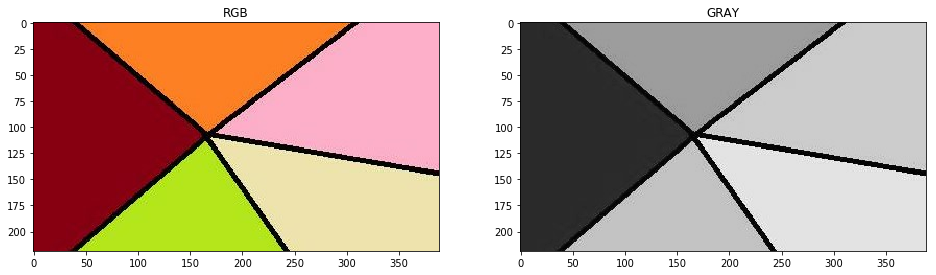

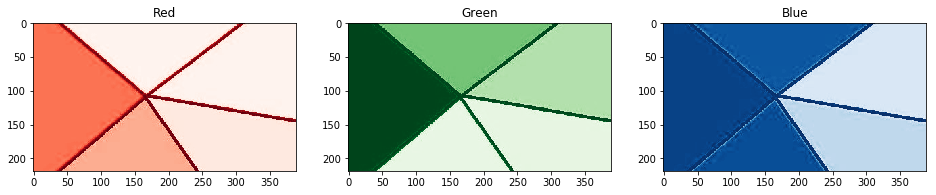

In [33]:
img_BGR = cv2.imread("test.bmp")
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (16,10))

img_RED = img_RGB[:,:,0]
img_GREEN = img_RGB[:,:,1]
img_BLUE = img_RGB[:,:,2]

plt.subplot(121)
plt.title("RGB")
plt.imshow(img_RGB)

plt.subplot(122)
plt.title("GRAY")
plt.imshow(img_GRAY, cmap = "gray")
plt.show()

plt.figure(figsize = (16,10))
plt.subplot(234)
plt.title("Red")
plt.imshow(img_RED, cmap = "Reds_r")

plt.subplot(235)
plt.title("Green")
plt.imshow(img_GREEN, cmap = "Greens_r")

plt.subplot(236)
plt.title("Blue")
plt.imshow(img_BLUE, cmap = "Blues_r")
plt.show()

In [21]:
np.set_printoptions(edgeitems = 500) #Set size of how many items can be displayed when printing
# print(np.array(img_GRAY))

### Draft: Simple Test on a list:

In [10]:
# quantity = []
# value = [-1]

# t = img_GRAY[0][:]
# A = t.tolist()
# print(A)

# # A=[26,25,25,25,26,27,27,27,27,28,28,28]

# count = 0
# k = 0
# inext = 0

# for i in A:
#     if inext < len(A)-1:
#         inext = inext + 1
#     if value[k] is not i:
#         value[k] = i
#         count = 1
#     elif value[k] is i:
#         count = count + 1
#     if value[k] is not A[inext]:
#         quantity.append(count)
#         value.append(-1)
#         k = k + 1
#         count = 0
# quantity.append(count)


# print("value  ",value)
# print("quatity",quantity)
# print("value  ",len(value))
# print("quatity",len(quantity))


# # compressed_value = open("compressed_value.txt", "a")
# # for i in range(len(value)):
# #     if i < len(value)-1:
# #         compressed_value.write(str(i)+"\n")
# #     elif i is (len(value)-1):
# #         compressed_value.write(str(i)+"~")
# # for i in range(len(quantity)):
# #     if i < len(quantity)-1:
# #         compressed_value.write(str(i)+"\n")
# #     elif i is (len(quantity)-1):
# #         compressed_value.write(str(i)+"^")
# # compressed_value.close()

# 3. Image EnCode State:

## 3.1 Save Image Size:

In [44]:
img_size = open("img_size.txt", "a")
img_size.write(str(img_RGB.shape[0])+"\n"+str(img_RGB.shape[1]))
img_size.close()

## 3.2 Encode Gray Image:

In [11]:
compressed_value = open("compressed_value.txt", "a")
c = 0
for row in range(img_GRAY.shape[0]):
    print("ROW num",c)
        
    quantity = []
    value = [-1]

    t = img_GRAY[row][:]
    A = t.tolist()

    count = 0
    k = 0
    inext = 0

    for i in A:
        if inext < len(A)-1:
            inext = inext + 1
        if value[k] is not i:
            value[k] = i
            count = 1
        elif value[k] is i:
            count = count + 1
        if value[k] is not A[inext]:
            quantity.append(count)
            value.append(-1)
            k = k + 1
            count = 0
    quantity.append(count)

    print("value  ",value)
    print("quatity",quantity)
    print("value  ",len(value))
    print("quatity",len(quantity))

    c = c + 1
    
    for i in range(len(value)):
        if i < len(value)-1:
            compressed_value.write(str(value[i])+"\n")
        elif i is (len(value)-1):
            compressed_value.write(str(value[i])+"~")
    for i in range(len(quantity)):
        if i < len(quantity)-1:
            compressed_value.write(str(quantity[i])+"\n")
        elif i is (len(quantity)-1):
            compressed_value.write(str(quantity[i])+"^")
compressed_value.close()

ROW num 0
value   [42, 43, 42, 43, 44, 43, 41, 49, 43, 40, 31, 27, 19, 7, 6, 1, 19, 6, 14, 183, 159, 149, 143, 152, 163, 148, 127, 158, 134, 158, 152, 155, 156, 155, 153, 154, 155, 154, 153, 154, 155, 154, 153, 154, 155, 154, 155, 151, 158, 154, 155, 149, 155, 146, 140, 162, 155, 151, 150, 164, 135, 160, 152, 158, 15, 11, 4, 11, 5, 4, 8, 230, 186, 189, 194, 216, 194, 200, 201]
quatity [16, 6, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 4, 4, 202, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 9, 61]
value   79
quatity 79
ROW num 1
value   [42, 43, 42, 43, 44, 43, 41, 44, 49, 47, 39, 41, 30, 13, 14, 8, 1, 12, 18, 15, 149, 152, 166, 142, 153, 157, 152, 162, 158, 156, 154, 155, 152, 151, 152, 155, 156, 155, 154, 153, 154, 155, 154, 153, 154, 155, 158, 152, 150, 157, 158, 156, 159, 134, 154, 140, 169, 157, 138, 161, 16, 8, 11, 4, 2, 20, 8, 12, 215, 196, 213, 204, 207

quatity 86
ROW num 90
value   [42, 43, 42, 43, 44, 43, 42, 41, 42, 41, 42, 43, 46, 42, 47, 43, 44, 30, 14, 15, 10, 3, 2, 23, 12, 11, 156, 136, 163, 144, 138, 165, 150, 154, 151, 155, 153, 155, 156, 153, 154, 156, 153, 155, 154, 153, 154, 157, 155, 154, 159, 141, 137, 160, 152, 151, 161, 157, 149, 153, 134, 135, 17, 20, 3, 4, 1, 3, 10, 6, 208, 197, 181, 178, 202, 204, 202, 195, 201, 198, 187, 204, 199, 200, 201, 200, 201]
quatity [112, 2, 3, 2, 2, 2, 2, 1, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 174]
value   87
quatity 87
ROW num 91
value   [42, 43, 42, 43, 42, 43, 42, 41, 45, 48, 42, 45, 41, 42, 48, 20, 16, 11, 2, 3, 5, 18, 160, 165, 166, 156, 159, 137, 158, 154, 151, 154, 151, 157, 151, 157, 151, 156, 153, 154, 156, 152, 156, 155, 157, 156, 159, 154, 157, 147, 142, 145, 158, 136, 153, 24, 21, 6

quatity 125
ROW num 140
value   [42, 43, 42, 43, 44, 37, 46, 43, 38, 37, 20, 13, 7, 4, 2, 12, 10, 29, 196, 184, 179, 183, 196, 203, 199, 207, 185, 193, 192, 193, 192, 191, 189, 186, 198, 191, 192, 186, 193, 202, 177, 204, 179, 13, 5, 4, 8, 1, 16, 230, 228, 186, 231, 240, 206, 223, 228, 224, 223, 224, 225, 224, 221, 220, 225, 231, 225, 221, 220, 225, 226, 223, 247, 223, 206, 232, 221, 210, 214, 217, 240, 208, 227, 238, 225, 229, 217, 236, 228, 232, 224, 223, 13, 2, 8, 2, 1, 5, 1, 17, 2, 18, 8, 2, 12, 3, 4, 10, 5, 6, 7, 5, 10, 7, 18, 6, 8, 14, 194, 207, 208, 199, 217, 189, 223, 219, 162, 206, 221]
quatity [105, 8, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 112, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

value   [42, 43, 42, 41, 42, 43, 42, 43, 44, 46, 39, 42, 51, 48, 26, 14, 9, 13, 16, 1, 5, 31, 202, 201, 216, 162, 186, 216, 186, 195, 204, 182, 198, 185, 192, 191, 193, 191, 190, 188, 179, 178, 188, 179, 21, 13, 5, 2, 19, 2, 247, 196, 225, 232, 229, 207, 220, 227, 223, 225, 224, 222, 226, 225, 219, 226, 224]
quatity [16, 8, 5, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 160, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 133]
value   67
quatity 67
ROW num 211
value   [42, 43, 42, 41, 42, 43, 45, 43, 42, 46, 49, 41, 32, 38, 13, 6, 9, 1, 23, 10, 178, 175, 178, 192, 186, 220, 186, 177, 209, 179, 198, 186, 199, 192, 193, 188, 192, 190, 200, 202, 190, 192, 186, 16, 8, 13, 1, 8, 239, 211, 228, 225, 224, 226, 227, 224, 222, 226, 223, 224, 226, 221, 225, 224]
quatity [16, 4, 7, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 160, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,

## 3.3 Encode Red Filter:

In [89]:
compressed_value_red = open("compressed_value_red.txt", "a")
c = 0
for row in range(img_RED.shape[0]):
    print("ROW num",c)
        
    quantity = []
    value = [-1]

    t = img_RED[row][:]
    A = t.tolist()

    count = 0
    k = 0
    inext = 0

    for i in A:
        if inext < len(A)-1:
            inext = inext + 1
        if value[k] is not i:
            value[k] = i
            count = 1
        elif value[k] is i:
            count = count + 1
        if value[k] is not A[inext]:
            quantity.append(count)
            value.append(-1)
            k = k + 1
            count = 0
    quantity.append(count)

    print("value  ",value)
    print("quatity",quantity)
    print("value  ",len(value))
    print("quatity",len(quantity))

    c = c + 1
    
    for i in range(len(value)):
        if i < len(value)-1:
            compressed_value_red.write(str(value[i])+"\n")
        elif i is (len(value)-1):
            compressed_value_red.write(str(value[i])+"~")
    for i in range(len(quantity)):
        if i < len(quantity)-1:
            compressed_value_red.write(str(quantity[i])+"\n")
        elif i is (len(quantity)-1):
            compressed_value_red.write(str(quantity[i])+"^")
compressed_value_red.close()

ROW num 0
value   [135, 137, 136, 135, 133, 134, 135, 136, 135, 128, 123, 113, 116, 100, 85, 60, 23, 13, 0, 19, 18, 41, 232, 222, 223, 226, 246, 255, 249, 228, 255, 235, 255, 250, 249, 247, 246, 244, 248, 250, 251, 252, 251, 253, 255, 253, 252, 255, 254, 253, 251, 252, 255, 246, 251, 247, 249, 244, 253, 247, 242, 255, 249, 243, 251, 215, 234, 214, 201, 43, 31, 12, 11, 2, 3, 14, 26, 255, 227, 237, 243, 255, 242, 248, 250, 252, 253]
quatity [16, 2, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 10, 192, 2, 5, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 61]
value   87
quatity 87
ROW num 1
value   [135, 137, 136, 135, 133, 134, 135, 136, 135, 129, 123, 124, 112, 105, 80, 40, 29, 14, 4, 23, 39, 49, 202, 216, 242, 230, 248, 254, 250, 255, 252, 250, 246, 244, 243, 246, 249, 251, 252, 251, 253, 254, 255, 253, 252, 253, 255, 254, 251, 250, 251, 252

quatity 97
ROW num 79
value   [135, 136, 137, 136, 133, 130, 129, 130, 129, 128, 131, 133, 134, 133, 127, 123, 112, 84, 49, 31, 16, 3, 9, 18, 35, 54, 215, 222, 234, 251, 237, 255, 252, 248, 255, 246, 241, 254, 250, 243, 255, 251, 253, 251, 253, 252, 253, 252, 250, 248, 251, 254, 252, 245, 255, 242, 253, 255, 242, 248, 216, 222, 58, 56, 30, 17, 8, 7, 24, 214, 239, 240, 244, 246, 247, 246, 251, 245, 253, 247, 248, 253, 255, 253, 252, 250, 252, 253, 255, 254, 251, 249, 251, 253]
quatity [101, 1, 5, 1, 1, 1, 4, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 16, 3, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 148]
value   94
quatity 94
ROW num 80
value   [135, 133, 136, 134, 132, 130, 129, 130, 133, 135, 137, 139, 138, 136, 126, 111, 95, 73, 45, 19, 7, 5, 12, 35, 38, 211, 218, 234, 240, 255, 232, 255, 235, 253, 236, 255, 240, 255, 25

quatity 198
ROW num 129
value   [135, 136, 138, 137, 136, 134, 133, 131, 132, 131, 129, 131, 141, 142, 139, 131, 139, 133, 132, 123, 117, 123, 81, 52, 38, 15, 5, 22, 0, 3, 203, 160, 191, 177, 180, 181, 179, 181, 179, 178, 177, 176, 177, 179, 178, 180, 184, 187, 186, 184, 8, 0, 3, 7, 0, 221, 226, 201, 249, 192, 244, 239, 233, 242, 239, 240, 239, 236, 234, 236, 237, 235, 237, 238, 241, 238, 236, 239, 236, 234, 230, 233, 244, 241, 238, 250, 230, 255, 187, 226, 239, 212, 38, 8, 3, 9, 11, 25, 4, 8, 6, 4, 12, 5, 9, 14, 6, 4, 15, 4, 8, 10, 13, 20, 30, 20, 24, 25, 22, 35, 28, 46, 224, 245, 242, 222, 242, 243, 229, 238, 224, 236, 255, 214, 255, 223, 252, 254, 236, 252, 245, 255, 243, 250, 255, 233, 245, 246, 255, 250, 255, 242, 245, 247, 255, 252, 248, 246, 255, 251, 249, 253, 248, 252, 249, 252, 251, 249, 251, 250, 251, 250, 251, 249, 250, 251, 254, 252, 253, 252, 253, 251, 254, 248, 251, 250, 252, 253, 252, 253]
quatity [111, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

quatity 65
ROW num 179
value   [135, 134, 133, 132, 133, 134, 136, 130, 137, 125, 129, 126, 125, 115, 123, 71, 57, 37, 22, 12, 1, 13, 0, 186, 212, 178, 192, 165, 183, 173, 178, 179, 181, 179, 178, 177, 175, 180, 178, 177, 184, 181, 177, 179, 194, 172, 153, 6, 0, 8, 4, 14, 15, 228, 227, 230, 229, 230, 239, 238, 236, 235, 236, 237, 235, 237, 238]
quatity [48, 3, 14, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 8, 84, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 153]
value   67
quatity 67
ROW num 180
value   [135, 134, 133, 135, 136, 134, 133, 132, 133, 134, 137, 138, 142, 129, 130, 134, 118, 114, 108, 84, 59, 33, 27, 26, 4, 1, 0, 182, 183, 192, 187, 166, 184, 181, 184, 178, 179, 181, 179, 178, 177, 176, 180, 178, 176, 183, 180, 175, 177, 181, 184, 209, 180, 179, 18, 0, 6, 1, 4, 249, 218, 248, 234, 239, 236, 237, 236, 237, 238]
quatity [48, 3, 9, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## 3.4 Encode Green Filter:

In [90]:
compressed_value_green = open("compressed_value_green.txt", "a")
c = 0
for row in range(img_GREEN.shape[0]):
    print("ROW num",c)
        
    quantity = []
    value = [-1]

    t = img_GREEN[row][:]
    A = t.tolist()

    count = 0
    k = 0
    inext = 0

    for i in A:
        if inext < len(A)-1:
            inext = inext + 1
        if value[k] is not i:
            value[k] = i
            count = 1
        elif value[k] is i:
            count = count + 1
        if value[k] is not A[inext]:
            quantity.append(count)
            value.append(-1)
            k = k + 1
            count = 0
    quantity.append(count)

    print("value  ",value)
    print("quatity",quantity)
    print("value  ",len(value))
    print("quatity",len(quantity))

    c = c + 1
    
    for i in range(len(value)):
        if i < len(value)-1:
            compressed_value_green.write(str(value[i])+"\n")
        elif i is (len(value)-1):
            compressed_value_green.write(str(value[i])+"~")
    for i in range(len(quantity)):
        if i < len(quantity)-1:
            compressed_value_green.write(str(quantity[i])+"\n")
        elif i is (len(quantity)-1):
            compressed_value_green.write(str(quantity[i])+"^")
compressed_value_green.close()

ROW num 0
value   [0, 1, 2, 0, 2, 17, 13, 6, 0, 1, 0, 19, 1, 3, 167, 140, 127, 120, 127, 140, 119, 98, 130, 105, 131, 126, 131, 134, 133, 131, 129, 128, 127, 126, 127, 128, 127, 128, 126, 127, 128, 126, 127, 126, 127, 125, 126, 125, 126, 125, 134, 130, 131, 124, 128, 117, 111, 136, 127, 124, 126, 141, 114, 139, 133, 141, 2, 0, 12, 7, 5, 6, 0, 217, 165, 169, 195, 169, 175, 174, 175]
quatity [24, 2, 2, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 8, 6, 194, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 8, 61]
value   81
quatity 81
ROW num 1
value   [0, 1, 2, 0, 1, 9, 17, 13, 6, 11, 6, 0, 6, 4, 0, 8, 10, 0, 133, 144, 118, 127, 130, 124, 136, 131, 129, 128, 131, 129, 128, 129, 131, 130, 128, 127, 126, 125, 126, 127, 128, 127, 128, 127, 128, 127, 126, 131, 126, 125, 133, 132, 131, 129, 132, 106, 126, 129, 117, 148, 137, 119, 144, 2, 0, 4, 0, 18, 5, 6, 203, 180, 192

ROW num 109
value   [0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 2, 5, 7, 0, 35, 24, 0, 2, 0, 6, 15, 10, 0, 28, 10, 2, 4, 6, 18, 0, 7, 2, 8, 9, 4, 0, 3, 1, 0, 2, 0, 19, 145, 204, 190, 191, 197, 153, 205, 181, 174, 186, 187, 181, 179, 177, 176, 175, 176, 173, 176, 178, 174, 173, 176, 175, 173, 174, 175, 176, 175, 174, 173, 175, 174, 175, 172, 176, 174, 176, 172, 178, 175, 174, 176, 171, 177, 173, 174, 178, 172, 175, 176, 175]
quatity [133, 3, 2, 4, 1, 1, 4, 4, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 16, 117]
value   94
quatity 94
ROW num 110
value   [0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 3, 4, 0, 1, 2, 6, 5, 2, 6, 4, 15, 4, 0, 2, 0, 1, 2, 7, 3, 17, 2, 226, 5, 8, 12, 9, 6, 16, 2, 16, 2, 1, 3, 14, 5, 7, 9, 0, 9, 0, 2, 0, 7, 0, 23, 0, 3, 0, 186, 182, 198, 179, 189, 181, 179, 175, 182, 176, 183, 176, 180

ROW num 159
value   [0, 1, 0, 1, 5, 8, 5, 2, 3, 9, 18, 0, 1, 3, 6, 12, 22, 32, 193, 247, 204, 236, 216, 227, 232, 228, 234, 230, 237, 234, 237, 232, 224, 228, 229, 230, 229, 228, 229, 230, 231, 230, 228, 230, 231, 230, 231, 227, 234, 226, 227, 228, 237, 228, 231, 223, 229, 219, 214, 24, 8, 2, 10, 11, 7, 216, 232, 219, 221, 246, 222, 226, 237, 227, 223, 231, 226, 228, 227, 228, 227, 228, 226, 225, 226, 225, 226, 227, 228, 229, 228, 229, 228, 229, 228, 229]
quatity [80, 3, 13, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2, 1, 3, 34, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 128, 6, 6, 1, 3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 6]
value   96
quatity 96
ROW num 160
value   [0, 2, 1, 0, 1, 2, 4, 0, 2, 0, 2, 0, 3, 14, 18, 34, 0, 3, 0, 32, 23, 21, 28, 214, 237, 192, 218, 229, 241, 224, 231, 232, 231, 229, 230, 229, 230, 229, 230, 229, 230, 231, 225, 231, 230, 222, 221,

## 3.5 Encode Blue Filter:

In [91]:
compressed_value_blue = open("compressed_value_blue.txt", "a")
c = 0
for row in range(img_BLUE.shape[0]):
    print("ROW num",c)
        
    quantity = []
    value = [-1]

    t = img_BLUE[row][:]
    A = t.tolist()

    count = 0
    k = 0
    inext = 0

    for i in A:
        if inext < len(A)-1:
            inext = inext + 1
        if value[k] is not i:
            value[k] = i
            count = 1
        elif value[k] is i:
            count = count + 1
        if value[k] is not A[inext]:
            quantity.append(count)
            value.append(-1)
            k = k + 1
            count = 0
    quantity.append(count)

    print("value  ",value)
    print("quatity",quantity)
    print("value  ",len(value))
    print("quatity",len(quantity))

    c = c + 1
    
    for i in range(len(value)):
        if i < len(value)-1:
            compressed_value_blue.write(str(value[i])+"\n")
        elif i is (len(value)-1):
            compressed_value_blue.write(str(value[i])+"~")
    for i in range(len(quantity)):
        if i < len(quantity)-1:
            compressed_value_blue.write(str(quantity[i])+"\n")
        elif i is (len(quantity)-1):
            compressed_value_blue.write(str(quantity[i])+"^")
compressed_value_blue.close()

ROW num 0
value   [17, 20, 19, 20, 21, 20, 19, 16, 21, 15, 9, 11, 10, 3, 11, 5, 19, 0, 135, 93, 67, 46, 35, 44, 31, 14, 48, 19, 39, 26, 27, 28, 34, 37, 38, 36, 37, 36, 34, 33, 34, 36, 35, 36, 42, 38, 35, 32, 30, 28, 31, 34, 35, 37, 38, 36, 41, 34, 33, 29, 36, 29, 23, 49, 36, 31, 56, 36, 75, 90, 133, 8, 4, 0, 6, 0, 4, 230, 186, 189, 196, 222, 196, 202, 200, 201]
quatity [16, 3, 5, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 24, 175, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 8, 61]
value   86
quatity 86
ROW num 1
value   [17, 20, 19, 20, 21, 20, 19, 16, 17, 21, 22, 18, 27, 21, 7, 16, 12, 0, 1, 0, 91, 81, 79, 36, 38, 44, 39, 49, 42, 34, 28, 27, 26, 27, 32, 38, 41, 38, 35, 34, 35, 36, 35, 36, 40, 42, 38, 36, 32, 30, 31, 33, 35, 37, 38, 41, 33, 31, 37, 39, 38, 42, 12, 32, 34, 28, 70, 72, 67, 111, 0, 4, 0, 15, 4, 8, 213, 194, 213, 204, 209, 18

quatity [112, 1, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 9, 165]
value   85
quatity 85
ROW num 90
value   [17, 20, 19, 17, 18, 19, 18, 17, 16, 18, 17, 19, 20, 22, 23, 19, 16, 12, 17, 16, 23, 14, 0, 10, 0, 11, 0, 101, 63, 73, 39, 23, 44, 24, 32, 30, 34, 31, 36, 39, 38, 41, 43, 38, 40, 37, 34, 35, 39, 36, 37, 43, 24, 17, 38, 25, 22, 41, 44, 50, 73, 72, 92, 0, 4, 0, 4, 12, 0, 197, 186, 174, 178, 207, 212, 209, 197, 199, 194, 183, 202, 199, 200, 201, 200, 201]
quatity [112, 1, 1, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 174]
value   86
quatity 86
ROW num 91
value   [17, 19, 17, 18, 17, 19,

quatity [106, 6, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 57, 1, 1, 1, 1, 1, 7, 5, 5, 2, 1, 2, 2, 2, 5, 1, 1, 7, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 12, 1, 1, 1, 1, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
value   153
quatity 153
ROW num 140
value   [17, 18, 17, 16, 15, 16, 17, 19, 14, 27, 25, 24, 25, 9, 0, 113, 72, 44, 32, 37, 40, 49, 27, 35, 36, 34, 31, 27, 24, 22, 24, 27, 29, 31, 29, 27, 25, 27, 29, 31, 34, 31, 27, 24, 21, 19, 18, 23, 44, 37, 31, 19, 23, 41, 35, 92, 108, 0, 4, 211, 193, 142, 185, 183, 190, 155, 172, 177, 173, 174, 173, 174, 173, 174, 176, 174, 173, 174, 173, 171, 169, 168, 169, 170, 169, 166, 165, 170, 176, 170, 166, 168, 167, 174, 175, 173, 202, 177, 160, 188, 178, 167, 173, 176, 201, 173, 192, 204, 191,

value   [17, 18, 17, 16, 17, 18, 19, 18, 19, 31, 29, 15, 7, 0, 6, 0, 5, 0, 86, 69, 57, 14, 32, 29, 17, 49, 7, 29, 33, 29, 33, 29, 25, 24, 27, 25, 27, 29, 27, 29, 31, 35, 32, 27, 25, 28, 36, 29, 59, 81, 0, 11, 4, 0, 216, 172, 198, 188, 164, 174, 165, 173, 172, 174, 171, 174, 173]
quatity [48, 2, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 97, 1, 4, 6, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 149]
value   67
quatity 67
ROW num 190
value   [17, 18, 17, 16, 15, 16, 17, 18, 17, 16, 25, 26, 20, 12, 2, 0, 4, 0, 109, 97, 50, 37, 32, 3, 34, 17, 25, 41, 32, 27, 29, 27, 25, 24, 25, 27, 29, 27, 29, 27, 25, 24, 22, 24, 30, 29, 22, 27, 33, 35, 36, 15, 26, 5, 67, 90, 0, 7, 16, 19, 0, 198, 177, 167, 158, 163, 167, 165, 178, 177, 170, 172, 171, 168, 174, 173]
quatity [48, 2, 4, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 7, 4, 2, 4, 82, 4, 4, 2, 1, 2, 1, 1, 1, 1, 

# 4. Image Decode State:

## 4.1 Decode Gray Image:

len temp line 1
ROW  0
tempvalue 42
repeat 16
tempvalue 43
repeat 6
tempvalue 42
repeat 2
tempvalue 43
repeat 2
tempvalue 44
repeat 2
tempvalue 43
repeat 3
tempvalue 41
repeat 1
tempvalue 49
repeat 1
tempvalue 43
repeat 1
tempvalue 40
repeat 1
tempvalue 31
repeat 1
tempvalue 27
repeat 1
tempvalue 19
repeat 1
tempvalue 7
repeat 1
tempvalue 6
repeat 1
tempvalue 1
repeat 1
tempvalue 19
repeat 1
tempvalue 6
repeat 1
tempvalue 14
repeat 1
tempvalue 183
repeat 1
tempvalue 159
repeat 1
tempvalue 149
repeat 1
tempvalue 143
repeat 1
tempvalue 152
repeat 1
tempvalue 163
repeat 1
tempvalue 148
repeat 1
tempvalue 127
repeat 1
tempvalue 158
repeat 1
tempvalue 134
repeat 1
tempvalue 158
repeat 1
tempvalue 152
repeat 1
tempvalue 155
repeat 1
tempvalue 156
repeat 3
tempvalue 155
repeat 1
tempvalue 153
repeat 1
tempvalue 154
repeat 1
tempvalue 155
repeat 1
tempvalue 154
repeat 2
tempvalue 153
repeat 4
tempvalue 154
repeat 4
tempvalue 155
repeat 202
tempvalue 154
repeat 4
tempvalue 153
repeat 3
tempvalu

tempvalue 43
repeat 1
tempvalue 35
repeat 1
tempvalue 42
repeat 2
tempvalue 40
repeat 1
tempvalue 38
repeat 1
tempvalue 45
repeat 1
tempvalue 39
repeat 1
tempvalue 35
repeat 1
tempvalue 16
repeat 1
tempvalue 11
repeat 1
tempvalue 2
repeat 1
tempvalue 8
repeat 1
tempvalue 14
repeat 1
tempvalue 5
repeat 1
tempvalue 29
repeat 1
tempvalue 136
repeat 1
tempvalue 161
repeat 1
tempvalue 148
repeat 1
tempvalue 176
repeat 1
tempvalue 130
repeat 1
tempvalue 145
repeat 1
tempvalue 157
repeat 2
tempvalue 151
repeat 1
tempvalue 150
repeat 1
tempvalue 153
repeat 1
tempvalue 155
repeat 1
tempvalue 153
repeat 2
tempvalue 154
repeat 4
tempvalue 153
repeat 2
tempvalue 155
repeat 200
tempvalue 154
repeat 4
tempvalue 155
repeat 4
tempvalue 154
repeat 3
tempvalue 153
repeat 4
tempvalue 152
repeat 1
tempvalue 158
repeat 1
tempvalue 146
repeat 1
tempvalue 154
repeat 1
tempvalue 144
repeat 1
tempvalue 164
repeat 1
tempvalue 151
repeat 1
tempvalue 161
repeat 1
tempvalue 155
repeat 1
tempvalue 16
repeat 1
tempv

tempvalue 42
repeat 8
tempvalue 37
repeat 1
tempvalue 41
repeat 1
tempvalue 44
repeat 1
tempvalue 42
repeat 1
tempvalue 40
repeat 1
tempvalue 43
repeat 1
tempvalue 47
repeat 1
tempvalue 50
repeat 1
tempvalue 55
repeat 1
tempvalue 37
repeat 1
tempvalue 43
repeat 1
tempvalue 60
repeat 1
tempvalue 23
repeat 1
tempvalue 14
repeat 1
tempvalue 7
repeat 1
tempvalue 5
repeat 1
tempvalue 7
repeat 1
tempvalue 4
repeat 1
tempvalue 14
repeat 1
tempvalue 17
repeat 1
tempvalue 18
repeat 1
tempvalue 139
repeat 1
tempvalue 158
repeat 1
tempvalue 153
repeat 1
tempvalue 151
repeat 1
tempvalue 152
repeat 1
tempvalue 154
repeat 1
tempvalue 155
repeat 2
tempvalue 154
repeat 3
tempvalue 155
repeat 200
tempvalue 153
repeat 4
tempvalue 154
repeat 4
tempvalue 159
repeat 1
tempvalue 147
repeat 1
tempvalue 155
repeat 1
tempvalue 156
repeat 1
tempvalue 157
repeat 1
tempvalue 148
repeat 1
tempvalue 157
repeat 1
tempvalue 21
repeat 1
tempvalue 13
repeat 1
tempvalue 8
repeat 1
tempvalue 3
repeat 1
tempvalue 6
repeat

repeat 1
tempvalue 157
repeat 1
tempvalue 152
repeat 1
tempvalue 159
repeat 1
tempvalue 155
repeat 2
tempvalue 154
repeat 1
tempvalue 153
repeat 3
tempvalue 154
repeat 1
tempvalue 156
repeat 1
tempvalue 154
repeat 1
tempvalue 156
repeat 2
tempvalue 153
repeat 1
tempvalue 152
repeat 1
tempvalue 155
repeat 1
tempvalue 156
repeat 1
tempvalue 154
repeat 1
tempvalue 155
repeat 171
tempvalue 154
repeat 2
tempvalue 156
repeat 1
tempvalue 155
repeat 1
tempvalue 154
repeat 1
tempvalue 153
repeat 1
tempvalue 157
repeat 1
tempvalue 154
repeat 2
tempvalue 159
repeat 1
tempvalue 154
repeat 1
tempvalue 149
repeat 1
tempvalue 156
repeat 1
tempvalue 158
repeat 1
tempvalue 136
repeat 1
tempvalue 158
repeat 1
tempvalue 167
repeat 1
tempvalue 114
repeat 1
tempvalue 46
repeat 1
tempvalue 13
repeat 1
tempvalue 14
repeat 1
tempvalue 8
repeat 1
tempvalue 4
repeat 1
tempvalue 8
repeat 1
tempvalue 4
repeat 1
tempvalue 11
repeat 1
tempvalue 8
repeat 1
tempvalue 192
repeat 1
tempvalue 210
repeat 1
tempvalue 193


repeat 2
tempvalue 42
repeat 2
tempvalue 43
repeat 1
tempvalue 44
repeat 1
tempvalue 45
repeat 2
tempvalue 47
repeat 1
tempvalue 36
repeat 1
tempvalue 46
repeat 1
tempvalue 53
repeat 1
tempvalue 31
repeat 1
tempvalue 20
repeat 1
tempvalue 17
repeat 1
tempvalue 7
repeat 1
tempvalue 20
repeat 1
tempvalue 4
repeat 1
tempvalue 3
repeat 1
tempvalue 9
repeat 1
tempvalue 16
repeat 1
tempvalue 154
repeat 1
tempvalue 178
repeat 1
tempvalue 160
repeat 1
tempvalue 140
repeat 1
tempvalue 150
repeat 1
tempvalue 159
repeat 1
tempvalue 158
repeat 1
tempvalue 148
repeat 1
tempvalue 156
repeat 1
tempvalue 151
repeat 1
tempvalue 159
repeat 1
tempvalue 155
repeat 3
tempvalue 154
repeat 13
tempvalue 155
repeat 153
tempvalue 160
repeat 1
tempvalue 144
repeat 1
tempvalue 151
repeat 1
tempvalue 157
repeat 1
tempvalue 152
repeat 1
tempvalue 145
repeat 1
tempvalue 176
repeat 1
tempvalue 139
repeat 1
tempvalue 161
repeat 1
tempvalue 160
repeat 1
tempvalue 114
repeat 1
tempvalue 24
repeat 1
tempvalue 27
repeat 1

tempvalue 152
repeat 1
tempvalue 159
repeat 1
tempvalue 150
repeat 1
tempvalue 155
repeat 1
tempvalue 156
repeat 1
tempvalue 158
repeat 1
tempvalue 141
repeat 1
tempvalue 156
repeat 1
tempvalue 143
repeat 1
tempvalue 157
repeat 1
tempvalue 18
repeat 1
tempvalue 22
repeat 1
tempvalue 7
repeat 1
tempvalue 4
repeat 1
tempvalue 22
repeat 1
tempvalue 7
repeat 1
tempvalue 5
repeat 1
tempvalue 6
repeat 1
tempvalue 222
repeat 1
tempvalue 170
repeat 1
tempvalue 217
repeat 1
tempvalue 174
repeat 1
tempvalue 210
repeat 1
tempvalue 211
repeat 1
tempvalue 190
repeat 1
tempvalue 211
repeat 1
tempvalue 208
repeat 1
tempvalue 187
repeat 1
tempvalue 199
repeat 1
tempvalue 190
repeat 1
tempvalue 201
repeat 110
len temp line 1
ROW  36
tempvalue 42
repeat 63
tempvalue 43
repeat 7
tempvalue 42
repeat 3
tempvalue 45
repeat 1
tempvalue 46
repeat 1
tempvalue 45
repeat 1
tempvalue 48
repeat 1
tempvalue 47
repeat 1
tempvalue 31
repeat 1
tempvalue 12
repeat 1
tempvalue 3
repeat 1
tempvalue 17
repeat 1
tempvalue 

tempvalue 184
repeat 1
tempvalue 203
repeat 1
tempvalue 192
repeat 1
tempvalue 199
repeat 2
tempvalue 200
repeat 2
tempvalue 201
repeat 4
tempvalue 200
repeat 8
tempvalue 201
repeat 109
len temp line 1
ROW  42
tempvalue 42
repeat 64
tempvalue 43
repeat 3
tempvalue 44
repeat 2
tempvalue 43
repeat 3
tempvalue 42
repeat 1
tempvalue 41
repeat 2
tempvalue 42
repeat 1
tempvalue 43
repeat 1
tempvalue 44
repeat 1
tempvalue 46
repeat 1
tempvalue 47
repeat 2
tempvalue 46
repeat 1
tempvalue 45
repeat 2
tempvalue 44
repeat 1
tempvalue 34
repeat 1
tempvalue 15
repeat 1
tempvalue 5
repeat 1
tempvalue 7
repeat 1
tempvalue 32
repeat 1
tempvalue 6
repeat 1
tempvalue 11
repeat 1
tempvalue 14
repeat 1
tempvalue 16
repeat 1
tempvalue 139
repeat 1
tempvalue 147
repeat 1
tempvalue 167
repeat 1
tempvalue 145
repeat 1
tempvalue 148
repeat 1
tempvalue 159
repeat 1
tempvalue 147
repeat 2
tempvalue 155
repeat 1
tempvalue 158
repeat 1
tempvalue 154
repeat 2
tempvalue 155
repeat 4
tempvalue 154
repeat 2
tempvalue 

repeat 2
tempvalue 154
repeat 1
tempvalue 157
repeat 1
tempvalue 155
repeat 1
tempvalue 154
repeat 1
tempvalue 156
repeat 1
tempvalue 153
repeat 1
tempvalue 154
repeat 1
tempvalue 155
repeat 3
tempvalue 154
repeat 2
tempvalue 155
repeat 87
tempvalue 154
repeat 4
tempvalue 156
repeat 1
tempvalue 153
repeat 2
tempvalue 155
repeat 1
tempvalue 156
repeat 1
tempvalue 154
repeat 1
tempvalue 153
repeat 2
tempvalue 155
repeat 1
tempvalue 153
repeat 2
tempvalue 157
repeat 1
tempvalue 148
repeat 1
tempvalue 158
repeat 1
tempvalue 131
repeat 1
tempvalue 174
repeat 1
tempvalue 158
repeat 1
tempvalue 141
repeat 1
tempvalue 150
repeat 1
tempvalue 159
repeat 1
tempvalue 136
repeat 1
tempvalue 169
repeat 1
tempvalue 130
repeat 1
tempvalue 179
repeat 1
tempvalue 142
repeat 1
tempvalue 148
repeat 1
tempvalue 17
repeat 1
tempvalue 15
repeat 1
tempvalue 5
repeat 1
tempvalue 4
repeat 1
tempvalue 5
repeat 1
tempvalue 7
repeat 1
tempvalue 10
repeat 1
tempvalue 9
repeat 1
tempvalue 214
repeat 1
tempvalue 218


repeat 1
tempvalue 180
repeat 1
tempvalue 201
repeat 1
tempvalue 213
repeat 1
tempvalue 187
repeat 1
tempvalue 186
repeat 1
tempvalue 206
repeat 1
tempvalue 202
repeat 1
tempvalue 190
repeat 1
tempvalue 206
repeat 1
tempvalue 200
repeat 8
tempvalue 201
repeat 125
len temp line 1
ROW  55
tempvalue 42
repeat 80
tempvalue 43
repeat 7
tempvalue 44
repeat 1
tempvalue 39
repeat 1
tempvalue 42
repeat 1
tempvalue 44
repeat 1
tempvalue 41
repeat 2
tempvalue 43
repeat 1
tempvalue 46
repeat 2
tempvalue 42
repeat 1
tempvalue 48
repeat 1
tempvalue 38
repeat 1
tempvalue 44
repeat 1
tempvalue 35
repeat 1
tempvalue 10
repeat 1
tempvalue 6
repeat 1
tempvalue 8
repeat 1
tempvalue 1
repeat 1
tempvalue 7
repeat 1
tempvalue 11
repeat 1
tempvalue 10
repeat 1
tempvalue 13
repeat 1
tempvalue 148
repeat 1
tempvalue 160
repeat 1
tempvalue 143
repeat 1
tempvalue 157
repeat 1
tempvalue 153
repeat 1
tempvalue 141
repeat 1
tempvalue 157
repeat 1
tempvalue 161
repeat 1
tempvalue 149
repeat 1
tempvalue 156
repeat 1
t

tempvalue 154
repeat 2
tempvalue 155
repeat 2
tempvalue 154
repeat 2
tempvalue 155
repeat 2
tempvalue 154
repeat 2
tempvalue 155
repeat 2
tempvalue 154
repeat 1
tempvalue 151
repeat 1
tempvalue 154
repeat 1
tempvalue 152
repeat 2
tempvalue 151
repeat 1
tempvalue 149
repeat 1
tempvalue 155
repeat 1
tempvalue 160
repeat 1
tempvalue 145
repeat 1
tempvalue 17
repeat 1
tempvalue 15
repeat 1
tempvalue 4
repeat 2
tempvalue 6
repeat 1
tempvalue 2
repeat 1
tempvalue 5
repeat 1
tempvalue 10
repeat 1
tempvalue 184
repeat 1
tempvalue 178
repeat 1
tempvalue 214
repeat 1
tempvalue 198
repeat 1
tempvalue 205
repeat 1
tempvalue 180
repeat 1
tempvalue 210
repeat 1
tempvalue 198
repeat 1
tempvalue 213
repeat 1
tempvalue 195
repeat 1
tempvalue 189
repeat 1
tempvalue 197
repeat 1
tempvalue 188
repeat 1
tempvalue 204
repeat 1
tempvalue 199
repeat 1
tempvalue 200
repeat 16
tempvalue 201
repeat 125
len temp line 1
ROW  62
tempvalue 42
repeat 79
tempvalue 43
repeat 1
tempvalue 44
repeat 1
tempvalue 43
repeat 

tempvalue 157
repeat 1
tempvalue 148
repeat 1
tempvalue 156
repeat 2
tempvalue 151
repeat 1
tempvalue 154
repeat 1
tempvalue 151
repeat 1
tempvalue 155
repeat 2
tempvalue 153
repeat 1
tempvalue 156
repeat 1
tempvalue 153
repeat 1
tempvalue 155
repeat 4
tempvalue 154
repeat 4
tempvalue 155
repeat 48
tempvalue 154
repeat 2
tempvalue 155
repeat 3
tempvalue 153
repeat 1
tempvalue 152
repeat 1
tempvalue 151
repeat 1
tempvalue 154
repeat 1
tempvalue 155
repeat 1
tempvalue 151
repeat 1
tempvalue 156
repeat 1
tempvalue 154
repeat 1
tempvalue 153
repeat 1
tempvalue 158
repeat 1
tempvalue 146
repeat 1
tempvalue 152
repeat 1
tempvalue 158
repeat 1
tempvalue 144
repeat 1
tempvalue 153
repeat 1
tempvalue 161
repeat 1
tempvalue 171
repeat 1
tempvalue 139
repeat 1
tempvalue 174
repeat 1
tempvalue 10
repeat 1
tempvalue 7
repeat 1
tempvalue 3
repeat 1
tempvalue 6
repeat 1
tempvalue 16
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 9
repeat 1
tempvalue 202
repeat 1
tempvalue 204
repeat 1


repeat 1
tempvalue 201
repeat 3
tempvalue 200
repeat 3
tempvalue 199
repeat 2
tempvalue 201
repeat 157
len temp line 1
ROW  75
tempvalue 42
repeat 96
tempvalue 43
repeat 3
tempvalue 42
repeat 5
tempvalue 43
repeat 5
tempvalue 42
repeat 8
tempvalue 43
repeat 1
tempvalue 44
repeat 1
tempvalue 45
repeat 1
tempvalue 42
repeat 1
tempvalue 46
repeat 1
tempvalue 47
repeat 1
tempvalue 39
repeat 1
tempvalue 24
repeat 1
tempvalue 13
repeat 1
tempvalue 5
repeat 1
tempvalue 3
repeat 1
tempvalue 2
repeat 1
tempvalue 5
repeat 1
tempvalue 8
repeat 1
tempvalue 23
repeat 1
tempvalue 152
repeat 1
tempvalue 129
repeat 1
tempvalue 170
repeat 1
tempvalue 161
repeat 1
tempvalue 153
repeat 2
tempvalue 161
repeat 1
tempvalue 148
repeat 1
tempvalue 159
repeat 2
tempvalue 152
repeat 1
tempvalue 156
repeat 1
tempvalue 155
repeat 1
tempvalue 152
repeat 1
tempvalue 155
repeat 1
tempvalue 157
repeat 1
tempvalue 154
repeat 2
tempvalue 156
repeat 1
tempvalue 153
repeat 1
tempvalue 154
repeat 8
tempvalue 155
repeat 24

repeat 1
tempvalue 43
repeat 1
tempvalue 42
repeat 1
tempvalue 46
repeat 1
tempvalue 45
repeat 1
tempvalue 34
repeat 1
tempvalue 20
repeat 1
tempvalue 10
repeat 1
tempvalue 7
repeat 2
tempvalue 3
repeat 1
tempvalue 27
repeat 1
tempvalue 18
repeat 1
tempvalue 133
repeat 1
tempvalue 155
repeat 1
tempvalue 159
repeat 1
tempvalue 141
repeat 1
tempvalue 156
repeat 1
tempvalue 139
repeat 1
tempvalue 159
repeat 1
tempvalue 167
repeat 1
tempvalue 138
repeat 1
tempvalue 161
repeat 1
tempvalue 143
repeat 1
tempvalue 166
repeat 1
tempvalue 152
repeat 1
tempvalue 156
repeat 1
tempvalue 153
repeat 1
tempvalue 154
repeat 1
tempvalue 153
repeat 1
tempvalue 155
repeat 1
tempvalue 152
repeat 1
tempvalue 154
repeat 2
tempvalue 155
repeat 17
tempvalue 154
repeat 2
tempvalue 156
repeat 1
tempvalue 155
repeat 1
tempvalue 154
repeat 1
tempvalue 153
repeat 1
tempvalue 154
repeat 2
tempvalue 159
repeat 1
tempvalue 149
repeat 1
tempvalue 156
repeat 1
tempvalue 155
repeat 1
tempvalue 143
repeat 1
tempvalue 158


len temp line 1
ROW  88
tempvalue 42
repeat 112
tempvalue 43
repeat 6
tempvalue 44
repeat 1
tempvalue 45
repeat 1
tempvalue 43
repeat 2
tempvalue 42
repeat 1
tempvalue 41
repeat 1
tempvalue 42
repeat 4
tempvalue 41
repeat 3
tempvalue 42
repeat 1
tempvalue 43
repeat 2
tempvalue 45
repeat 2
tempvalue 43
repeat 1
tempvalue 42
repeat 1
tempvalue 40
repeat 1
tempvalue 27
repeat 1
tempvalue 14
repeat 1
tempvalue 6
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 6
repeat 1
tempvalue 18
repeat 1
tempvalue 23
repeat 1
tempvalue 127
repeat 1
tempvalue 164
repeat 1
tempvalue 131
repeat 1
tempvalue 162
repeat 1
tempvalue 153
repeat 1
tempvalue 145
repeat 1
tempvalue 160
repeat 1
tempvalue 163
repeat 1
tempvalue 140
repeat 1
tempvalue 150
repeat 1
tempvalue 158
repeat 1
tempvalue 153
repeat 1
tempvalue 155
repeat 1
tempvalue 150
repeat 1
tempvalue 157
repeat 1
tempvalue 155
repeat 1
tempvalue 154
repeat 1
tempvalue 152
repeat 1
tempvalue 158
repeat 1
tempvalue 152

tempvalue 47
repeat 1
tempvalue 36
repeat 1
tempvalue 22
repeat 1
tempvalue 13
repeat 1
tempvalue 5
repeat 1
tempvalue 17
repeat 1
tempvalue 2
repeat 1
tempvalue 4
repeat 1
tempvalue 9
repeat 1
tempvalue 15
repeat 1
tempvalue 134
repeat 1
tempvalue 179
repeat 1
tempvalue 142
repeat 1
tempvalue 163
repeat 1
tempvalue 153
repeat 1
tempvalue 148
repeat 1
tempvalue 161
repeat 1
tempvalue 137
repeat 1
tempvalue 164
repeat 1
tempvalue 141
repeat 1
tempvalue 154
repeat 1
tempvalue 149
repeat 1
tempvalue 162
repeat 1
tempvalue 145
repeat 1
tempvalue 151
repeat 1
tempvalue 152
repeat 1
tempvalue 160
repeat 1
tempvalue 150
repeat 1
tempvalue 156
repeat 1
tempvalue 148
repeat 1
tempvalue 144
repeat 1
tempvalue 172
repeat 1
tempvalue 156
repeat 1
tempvalue 142
repeat 1
tempvalue 18
repeat 1
tempvalue 14
repeat 1
tempvalue 7
repeat 1
tempvalue 10
repeat 1
tempvalue 8
repeat 1
tempvalue 11
repeat 1
tempvalue 10
repeat 1
tempvalue 8
repeat 1
tempvalue 194
repeat 1
tempvalue 198
repeat 2
tempvalue 200

repeat 1
tempvalue 11
repeat 1
tempvalue 10
repeat 1
tempvalue 23
repeat 1
tempvalue 1
repeat 1
tempvalue 9
repeat 1
tempvalue 13
repeat 2
tempvalue 140
repeat 1
tempvalue 154
repeat 1
tempvalue 145
repeat 1
tempvalue 165
repeat 1
tempvalue 151
repeat 1
tempvalue 124
repeat 1
tempvalue 169
repeat 2
tempvalue 128
repeat 1
tempvalue 29
repeat 1
tempvalue 12
repeat 1
tempvalue 3
repeat 2
tempvalue 14
repeat 1
tempvalue 1
repeat 1
tempvalue 8
repeat 1
tempvalue 9
repeat 1
tempvalue 8
repeat 1
tempvalue 202
repeat 1
tempvalue 185
repeat 1
tempvalue 210
repeat 1
tempvalue 193
repeat 1
tempvalue 209
repeat 1
tempvalue 205
repeat 1
tempvalue 193
repeat 1
tempvalue 209
repeat 1
tempvalue 174
repeat 1
tempvalue 204
repeat 1
tempvalue 201
repeat 4
tempvalue 200
repeat 5
tempvalue 201
repeat 8
tempvalue 200
repeat 8
tempvalue 201
repeat 173
len temp line 1
ROW  102
tempvalue 42
repeat 128
tempvalue 43
repeat 2
tempvalue 42
repeat 4
tempvalue 41
repeat 4
tempvalue 42
repeat 2
tempvalue 43
repeat 2


repeat 1
tempvalue 201
repeat 1
tempvalue 197
repeat 1
tempvalue 203
repeat 1
tempvalue 197
repeat 1
tempvalue 203
repeat 1
tempvalue 200
repeat 1
tempvalue 202
repeat 1
tempvalue 201
repeat 1
tempvalue 202
repeat 1
tempvalue 197
repeat 1
tempvalue 203
repeat 1
tempvalue 198
repeat 1
tempvalue 204
repeat 1
tempvalue 199
repeat 1
tempvalue 200
repeat 1
tempvalue 201
repeat 2
tempvalue 200
repeat 4
tempvalue 201
repeat 2
tempvalue 200
repeat 2
tempvalue 201
repeat 4
tempvalue 200
repeat 2
tempvalue 201
repeat 1
tempvalue 202
repeat 1
tempvalue 200
repeat 1
tempvalue 201
repeat 1
tempvalue 198
repeat 1
tempvalue 202
repeat 1
tempvalue 200
repeat 1
tempvalue 201
repeat 2
tempvalue 200
repeat 1
tempvalue 202
repeat 1
tempvalue 200
repeat 1
tempvalue 199
repeat 1
tempvalue 201
repeat 1
tempvalue 200
repeat 1
tempvalue 202
repeat 1
tempvalue 201
repeat 133
len temp line 1
ROW  108
tempvalue 42
repeat 140
tempvalue 41
repeat 12
tempvalue 43
repeat 1
tempvalue 45
repeat 1
tempvalue 42
repeat 1


tempvalue 200
repeat 1
tempvalue 212
repeat 1
tempvalue 191
repeat 1
tempvalue 192
repeat 1
tempvalue 201
repeat 1
tempvalue 210
repeat 1
tempvalue 207
repeat 1
tempvalue 191
repeat 1
tempvalue 201
repeat 1
tempvalue 203
repeat 1
tempvalue 206
repeat 1
tempvalue 196
repeat 1
tempvalue 205
repeat 1
tempvalue 186
repeat 1
tempvalue 198
repeat 1
tempvalue 200
repeat 1
tempvalue 177
repeat 1
tempvalue 199
repeat 1
tempvalue 195
repeat 1
tempvalue 208
repeat 1
tempvalue 197
repeat 1
tempvalue 205
repeat 1
tempvalue 204
repeat 1
tempvalue 179
repeat 1
tempvalue 191
repeat 1
tempvalue 195
repeat 1
tempvalue 206
repeat 1
tempvalue 204
repeat 1
tempvalue 196
repeat 1
tempvalue 198
repeat 1
tempvalue 205
repeat 1
tempvalue 201
repeat 1
tempvalue 194
repeat 1
tempvalue 206
repeat 1
tempvalue 193
repeat 1
tempvalue 195
repeat 1
tempvalue 208
repeat 1
tempvalue 194
repeat 1
tempvalue 199
repeat 1
tempvalue 204
repeat 1
tempvalue 199
repeat 2
tempvalue 204
repeat 1
tempvalue 200
repeat 2
tempvalue 2

tempvalue 229
repeat 1
tempvalue 219
repeat 1
tempvalue 214
repeat 1
tempvalue 215
repeat 1
tempvalue 233
repeat 1
tempvalue 220
repeat 1
tempvalue 232
repeat 1
tempvalue 234
repeat 1
tempvalue 225
repeat 1
tempvalue 219
repeat 1
tempvalue 220
repeat 1
tempvalue 235
repeat 1
tempvalue 232
repeat 1
tempvalue 225
repeat 1
tempvalue 215
repeat 2
tempvalue 232
repeat 1
tempvalue 245
repeat 1
tempvalue 214
repeat 1
tempvalue 237
repeat 1
tempvalue 209
repeat 1
tempvalue 237
repeat 1
tempvalue 214
repeat 1
tempvalue 209
repeat 1
tempvalue 234
repeat 1
tempvalue 193
repeat 1
tempvalue 20
repeat 1
tempvalue 4
repeat 1
tempvalue 5
repeat 1
tempvalue 41
repeat 1
tempvalue 9
repeat 1
tempvalue 2
repeat 1
tempvalue 7
repeat 1
tempvalue 9
repeat 1
tempvalue 18
repeat 1
tempvalue 5
repeat 1
tempvalue 2
repeat 3
tempvalue 5
repeat 1
tempvalue 4
repeat 1
tempvalue 20
repeat 1
tempvalue 4
repeat 1
tempvalue 3
repeat 1
tempvalue 6
repeat 1
tempvalue 4
repeat 2
tempvalue 5
repeat 1
tempvalue 7
repeat 1
t

tempvalue 3
repeat 1
tempvalue 7
repeat 1
tempvalue 9
repeat 1
tempvalue 4
repeat 1
tempvalue 11
repeat 1
tempvalue 8
repeat 1
tempvalue 10
repeat 1
tempvalue 11
repeat 1
tempvalue 190
repeat 1
tempvalue 212
repeat 1
tempvalue 180
repeat 1
tempvalue 213
repeat 1
tempvalue 204
repeat 1
tempvalue 187
repeat 1
tempvalue 209
repeat 1
tempvalue 201
repeat 2
tempvalue 198
repeat 1
tempvalue 211
repeat 1
tempvalue 192
repeat 1
tempvalue 205
repeat 1
tempvalue 200
repeat 1
tempvalue 207
repeat 1
tempvalue 188
repeat 1
tempvalue 207
repeat 1
tempvalue 198
repeat 1
tempvalue 199
repeat 5
tempvalue 200
repeat 2
tempvalue 192
repeat 1
tempvalue 200
repeat 1
tempvalue 203
repeat 1
tempvalue 182
repeat 1
tempvalue 207
repeat 1
tempvalue 194
repeat 1
tempvalue 198
repeat 1
tempvalue 200
repeat 1
tempvalue 203
repeat 1
tempvalue 200
repeat 1
tempvalue 197
repeat 1
tempvalue 198
repeat 1
tempvalue 200
repeat 2
tempvalue 198
repeat 1
tempvalue 195
repeat 1
tempvalue 205
repeat 1
tempvalue 204
repeat 1
t

repeat 1
tempvalue 218
repeat 2
tempvalue 193
repeat 2
tempvalue 191
repeat 1
tempvalue 190
repeat 1
tempvalue 207
repeat 1
tempvalue 194
repeat 1
tempvalue 192
repeat 1
tempvalue 203
repeat 1
tempvalue 200
repeat 1
tempvalue 199
repeat 1
tempvalue 189
repeat 1
tempvalue 212
repeat 1
tempvalue 202
repeat 1
tempvalue 208
repeat 1
tempvalue 199
repeat 1
tempvalue 204
repeat 1
tempvalue 215
repeat 1
tempvalue 196
repeat 1
tempvalue 209
repeat 1
tempvalue 177
repeat 1
tempvalue 189
repeat 1
tempvalue 194
repeat 1
tempvalue 207
repeat 1
tempvalue 200
repeat 1
tempvalue 203
repeat 1
tempvalue 200
repeat 1
tempvalue 198
repeat 1
tempvalue 202
repeat 2
tempvalue 201
repeat 2
tempvalue 198
repeat 1
tempvalue 201
repeat 1
tempvalue 202
repeat 1
tempvalue 200
repeat 3
tempvalue 201
repeat 4
tempvalue 199
repeat 1
tempvalue 202
repeat 1
tempvalue 199
repeat 1
tempvalue 200
repeat 1
tempvalue 201
repeat 1
tempvalue 200
repeat 1
tempvalue 203
repeat 1
tempvalue 199
repeat 1
tempvalue 200
repeat 2
te

repeat 1
tempvalue 1
repeat 2
tempvalue 9
repeat 1
tempvalue 13
repeat 1
tempvalue 1
repeat 2
tempvalue 13
repeat 1
tempvalue 1
repeat 2
tempvalue 4
repeat 1
tempvalue 11
repeat 1
tempvalue 14
repeat 1
tempvalue 2
repeat 3
tempvalue 6
repeat 1
tempvalue 7
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 2
tempvalue 15
repeat 1
tempvalue 13
repeat 1
tempvalue 17
repeat 1
tempvalue 6
repeat 1
tempvalue 11
repeat 1
tempvalue 26
repeat 1
tempvalue 161
repeat 1
tempvalue 194
repeat 1
tempvalue 204
repeat 1
tempvalue 193
repeat 1
tempvalue 213
repeat 1
tempvalue 164
repeat 1
tempvalue 221
repeat 1
tempvalue 204
repeat 1
tempvalue 181
repeat 1
tempvalue 203
repeat 1
tempvalue 209
repeat 1
tempvalue 190
repeat 1
tempvalue 195
repeat 1
tempvalue 200
repeat 1
tempvalue 199
repeat 1
tempvalue 202
repeat 1
tempvalue 198
repeat 1
tempvalue 200
repeat 1
tempvalue 201
repeat 1
tempvalue 200
repeat 1
tempvalue 204
repeat 1
tempvalue 199
repeat 1
tempvalue 200
repeat 3
tempvalue 199
repeat 1
tempvalue

tempvalue 225
repeat 1
tempvalue 224
repeat 1
tempvalue 223
repeat 2
tempvalue 224
repeat 64
tempvalue 223
repeat 1
tempvalue 222
repeat 1
tempvalue 227
repeat 1
tempvalue 224
repeat 1
tempvalue 222
repeat 1
tempvalue 223
repeat 1
tempvalue 211
repeat 1
tempvalue 250
repeat 1
tempvalue 199
repeat 1
tempvalue 223
repeat 1
tempvalue 229
repeat 1
tempvalue 216
repeat 1
tempvalue 220
repeat 1
tempvalue 228
repeat 1
tempvalue 2
repeat 1
tempvalue 12
repeat 1
tempvalue 21
repeat 1
tempvalue 2
repeat 1
tempvalue 7
repeat 1
tempvalue 1
repeat 1
tempvalue 7
repeat 1
tempvalue 2
repeat 2
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 5
repeat 1
tempvalue 8
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 17
repeat 1
tempvalue 2
repeat 1
tempvalue 11
repeat 1
tempvalue 3
repeat 1
tempvalue 18
repeat 1
tempvalue 6
repeat 1
tempvalue 5
repeat 2
tempvalue 4
repeat 1
tempvalue 15
repeat 1
tempvalue 7
repeat 1
tempvalue 12
repeat 1
tempvalue 13
repeat 1
tempvalue 14
repeat 1
tempvalue

tempvalue 202
repeat 1
tempvalue 201
repeat 5
len temp line 1
ROW  132
tempvalue 42
repeat 112
tempvalue 43
repeat 2
tempvalue 42
repeat 2
tempvalue 43
repeat 2
tempvalue 45
repeat 2
tempvalue 44
repeat 1
tempvalue 43
repeat 2
tempvalue 42
repeat 1
tempvalue 41
repeat 1
tempvalue 42
repeat 1
tempvalue 43
repeat 2
tempvalue 44
repeat 1
tempvalue 38
repeat 1
tempvalue 45
repeat 1
tempvalue 47
repeat 1
tempvalue 48
repeat 2
tempvalue 47
repeat 1
tempvalue 33
repeat 1
tempvalue 22
repeat 1
tempvalue 7
repeat 1
tempvalue 6
repeat 1
tempvalue 20
repeat 1
tempvalue 5
repeat 2
tempvalue 12
repeat 1
tempvalue 199
repeat 1
tempvalue 193
repeat 1
tempvalue 201
repeat 1
tempvalue 194
repeat 1
tempvalue 173
repeat 1
tempvalue 192
repeat 1
tempvalue 194
repeat 1
tempvalue 192
repeat 1
tempvalue 197
repeat 1
tempvalue 192
repeat 16
tempvalue 191
repeat 2
tempvalue 192
repeat 1
tempvalue 193
repeat 1
tempvalue 194
repeat 1
tempvalue 195
repeat 1
tempvalue 191
repeat 1
tempvalue 187
repeat 1
tempvalue 

repeat 1
tempvalue 202
repeat 1
tempvalue 205
repeat 1
tempvalue 201
repeat 1
tempvalue 197
repeat 1
tempvalue 199
repeat 1
tempvalue 200
repeat 1
tempvalue 199
repeat 1
tempvalue 200
repeat 1
tempvalue 203
repeat 1
tempvalue 199
repeat 1
tempvalue 202
repeat 1
tempvalue 196
repeat 1
tempvalue 202
repeat 1
tempvalue 198
repeat 2
tempvalue 203
repeat 1
tempvalue 187
repeat 1
tempvalue 206
repeat 1
tempvalue 198
repeat 1
tempvalue 199
repeat 2
tempvalue 201
repeat 1
tempvalue 196
repeat 1
tempvalue 201
repeat 3
tempvalue 200
repeat 2
len temp line 1
ROW  135
tempvalue 42
repeat 114
tempvalue 43
repeat 2
tempvalue 42
repeat 4
tempvalue 41
repeat 1
tempvalue 42
repeat 1
tempvalue 44
repeat 1
tempvalue 46
repeat 3
tempvalue 45
repeat 1
tempvalue 44
repeat 1
tempvalue 64
repeat 1
tempvalue 29
repeat 1
tempvalue 28
repeat 1
tempvalue 66
repeat 1
tempvalue 15
repeat 1
tempvalue 13
repeat 1
tempvalue 9
repeat 1
tempvalue 3
repeat 1
tempvalue 1
repeat 1
tempvalue 6
repeat 1
tempvalue 13
repeat 1

repeat 1
tempvalue 192
repeat 1
tempvalue 200
repeat 1
tempvalue 193
repeat 1
tempvalue 185
repeat 1
tempvalue 189
repeat 1
tempvalue 202
repeat 1
tempvalue 182
repeat 1
tempvalue 175
repeat 1
tempvalue 204
repeat 1
tempvalue 18
repeat 1
tempvalue 5
repeat 1
tempvalue 12
repeat 1
tempvalue 18
repeat 1
tempvalue 4
repeat 1
tempvalue 9
repeat 1
tempvalue 208
repeat 1
tempvalue 223
repeat 1
tempvalue 226
repeat 1
tempvalue 236
repeat 1
tempvalue 204
repeat 1
tempvalue 224
repeat 1
tempvalue 243
repeat 1
tempvalue 217
repeat 1
tempvalue 219
repeat 1
tempvalue 224
repeat 1
tempvalue 226
repeat 1
tempvalue 224
repeat 112
tempvalue 225
repeat 1
tempvalue 223
repeat 2
tempvalue 225
repeat 1
tempvalue 224
repeat 1
tempvalue 222
repeat 1
tempvalue 223
repeat 1
tempvalue 226
repeat 1
tempvalue 230
repeat 1
tempvalue 223
repeat 1
tempvalue 210
repeat 1
tempvalue 219
repeat 1
tempvalue 227
repeat 1
tempvalue 224
repeat 1
tempvalue 228
repeat 1
tempvalue 219
repeat 1
tempvalue 210
repeat 1
tempvalue

tempvalue 44
repeat 1
tempvalue 34
repeat 1
tempvalue 22
repeat 1
tempvalue 9
repeat 1
tempvalue 4
repeat 2
tempvalue 1
repeat 1
tempvalue 18
repeat 1
tempvalue 8
repeat 1
tempvalue 19
repeat 1
tempvalue 184
repeat 1
tempvalue 207
repeat 1
tempvalue 188
repeat 1
tempvalue 195
repeat 1
tempvalue 203
repeat 1
tempvalue 178
repeat 1
tempvalue 202
repeat 1
tempvalue 180
repeat 1
tempvalue 185
repeat 1
tempvalue 198
repeat 1
tempvalue 190
repeat 1
tempvalue 192
repeat 25
tempvalue 189
repeat 1
tempvalue 190
repeat 1
tempvalue 191
repeat 2
tempvalue 192
repeat 1
tempvalue 193
repeat 1
tempvalue 191
repeat 1
tempvalue 186
repeat 1
tempvalue 207
repeat 1
tempvalue 187
repeat 1
tempvalue 180
repeat 1
tempvalue 191
repeat 1
tempvalue 192
repeat 1
tempvalue 203
repeat 1
tempvalue 176
repeat 1
tempvalue 191
repeat 1
tempvalue 199
repeat 1
tempvalue 178
repeat 1
tempvalue 12
repeat 1
tempvalue 18
repeat 1
tempvalue 1
repeat 1
tempvalue 5
repeat 1
tempvalue 13
repeat 1
tempvalue 4
repeat 1
tempvalue

tempvalue 224
repeat 1
tempvalue 222
repeat 2
tempvalue 225
repeat 1
tempvalue 224
repeat 153
tempvalue 229
repeat 1
tempvalue 224
repeat 1
tempvalue 213
repeat 1
tempvalue 222
repeat 1
tempvalue 220
repeat 1
tempvalue 208
repeat 1
tempvalue 223
repeat 1
tempvalue 222
repeat 1
tempvalue 213
repeat 1
tempvalue 232
repeat 2
tempvalue 239
repeat 1
tempvalue 218
repeat 2
tempvalue 212
repeat 1
tempvalue 234
repeat 1
tempvalue 232
repeat 1
tempvalue 235
repeat 1
tempvalue 193
repeat 1
tempvalue 217
repeat 1
tempvalue 235
repeat 1
tempvalue 227
repeat 1
tempvalue 9
repeat 1
tempvalue 17
repeat 1
tempvalue 2
repeat 1
tempvalue 11
repeat 1
tempvalue 16
repeat 1
tempvalue 3
repeat 1
len temp line 1
ROW  147
tempvalue 42
repeat 80
tempvalue 43
repeat 19
tempvalue 42
repeat 5
tempvalue 41
repeat 3
tempvalue 40
repeat 1
tempvalue 42
repeat 1
tempvalue 43
repeat 1
tempvalue 44
repeat 1
tempvalue 45
repeat 1
tempvalue 50
repeat 1
tempvalue 41
repeat 1
tempvalue 49
repeat 2
tempvalue 46
repeat 1
temp

repeat 1
tempvalue 230
repeat 1
tempvalue 212
repeat 1
tempvalue 233
repeat 1
tempvalue 216
repeat 1
tempvalue 236
repeat 1
tempvalue 210
repeat 1
tempvalue 230
repeat 1
tempvalue 224
repeat 1
tempvalue 220
repeat 1
tempvalue 218
repeat 1
tempvalue 224
repeat 1
tempvalue 231
repeat 1
tempvalue 218
repeat 1
tempvalue 229
repeat 1
tempvalue 218
repeat 1
len temp line 1
ROW  151
tempvalue 42
repeat 80
tempvalue 43
repeat 19
tempvalue 42
repeat 5
tempvalue 40
repeat 1
tempvalue 41
repeat 1
tempvalue 42
repeat 1
tempvalue 43
repeat 3
tempvalue 42
repeat 1
tempvalue 41
repeat 1
tempvalue 48
repeat 1
tempvalue 55
repeat 1
tempvalue 11
repeat 1
tempvalue 8
repeat 1
tempvalue 9
repeat 1
tempvalue 1
repeat 1
tempvalue 14
repeat 1
tempvalue 6
repeat 1
tempvalue 23
repeat 1
tempvalue 177
repeat 1
tempvalue 206
repeat 1
tempvalue 180
repeat 1
tempvalue 192
repeat 1
tempvalue 190
repeat 1
tempvalue 186
repeat 1
tempvalue 188
repeat 1
tempvalue 198
repeat 1
tempvalue 183
repeat 1
tempvalue 199
repeat

repeat 1
tempvalue 41
repeat 1
tempvalue 42
repeat 1
tempvalue 48
repeat 1
tempvalue 46
repeat 1
tempvalue 54
repeat 1
tempvalue 12
repeat 1
tempvalue 9
repeat 1
tempvalue 8
repeat 1
tempvalue 2
repeat 1
tempvalue 31
repeat 1
tempvalue 18
repeat 1
tempvalue 14
repeat 1
tempvalue 17
repeat 1
tempvalue 190
repeat 1
tempvalue 207
repeat 1
tempvalue 158
repeat 1
tempvalue 183
repeat 1
tempvalue 193
repeat 1
tempvalue 204
repeat 1
tempvalue 186
repeat 1
tempvalue 192
repeat 1
tempvalue 193
repeat 1
tempvalue 192
repeat 72
tempvalue 188
repeat 1
tempvalue 194
repeat 1
tempvalue 193
repeat 2
tempvalue 189
repeat 1
tempvalue 193
repeat 1
tempvalue 175
repeat 1
tempvalue 24
repeat 1
tempvalue 7
repeat 1
tempvalue 4
repeat 1
tempvalue 7
repeat 1
tempvalue 12
repeat 1
tempvalue 6
repeat 1
tempvalue 214
repeat 1
tempvalue 239
repeat 1
tempvalue 219
repeat 1
tempvalue 197
repeat 1
tempvalue 240
repeat 1
tempvalue 220
repeat 1
tempvalue 218
repeat 1
tempvalue 225
repeat 1
tempvalue 219
repeat 1
temp

tempvalue 206
repeat 1
tempvalue 204
repeat 1
tempvalue 158
repeat 1
tempvalue 190
repeat 1
tempvalue 188
repeat 1
tempvalue 26
repeat 1
tempvalue 8
repeat 1
tempvalue 24
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 230
repeat 1
tempvalue 238
repeat 1
tempvalue 231
repeat 1
tempvalue 219
repeat 1
tempvalue 216
repeat 1
tempvalue 214
repeat 1
tempvalue 208
repeat 1
tempvalue 228
repeat 2
tempvalue 206
repeat 1
tempvalue 234
repeat 1
tempvalue 226
repeat 1
tempvalue 224
repeat 166
len temp line 1
ROW  170
tempvalue 42
repeat 56
tempvalue 43
repeat 8
tempvalue 42
repeat 8
tempvalue 43
repeat 2
tempvalue 42
repeat 2
tempvalue 43
repeat 4
tempvalue 41
repeat 1
tempvalue 44
repeat 1
tempvalue 45
repeat 1
tempvalue 42
repeat 2
tempvalue 45
repeat 1
tempvalue 46
repeat 1
tempvalue 42
repeat 1
tempvalue 35
repeat 1
tempvalue 54
repeat 1
tempvalue 33
repeat 1
tempvalue 12
repeat 1
tempvalue 8
repeat 1
tempvalue 4
repeat 1
tempvalue 5
repeat 1
tempvalue 21
rep

tempvalue 225
repeat 1
tempvalue 224
repeat 157
len temp line 1
ROW  177
tempvalue 42
repeat 48
tempvalue 43
repeat 3
tempvalue 42
repeat 8
tempvalue 41
repeat 5
tempvalue 42
repeat 6
tempvalue 41
repeat 2
tempvalue 50
repeat 1
tempvalue 43
repeat 1
tempvalue 45
repeat 1
tempvalue 42
repeat 1
tempvalue 40
repeat 1
tempvalue 44
repeat 1
tempvalue 46
repeat 1
tempvalue 38
repeat 1
tempvalue 39
repeat 1
tempvalue 61
repeat 1
tempvalue 33
repeat 1
tempvalue 15
repeat 1
tempvalue 13
repeat 1
tempvalue 4
repeat 1
tempvalue 13
repeat 1
tempvalue 5
repeat 1
tempvalue 27
repeat 1
tempvalue 9
repeat 1
tempvalue 15
repeat 1
tempvalue 211
repeat 1
tempvalue 170
repeat 1
tempvalue 202
repeat 1
tempvalue 187
repeat 1
tempvalue 191
repeat 1
tempvalue 192
repeat 104
tempvalue 190
repeat 1
tempvalue 193
repeat 2
tempvalue 189
repeat 1
tempvalue 191
repeat 1
tempvalue 199
repeat 1
tempvalue 192
repeat 1
tempvalue 175
repeat 1
tempvalue 204
repeat 1
tempvalue 188
repeat 1
tempvalue 194
repeat 1
tempvalue

repeat 1
tempvalue 223
repeat 1
tempvalue 224
repeat 150
len temp line 1
ROW  185
tempvalue 42
repeat 48
tempvalue 43
repeat 2
tempvalue 42
repeat 4
tempvalue 41
repeat 2
tempvalue 43
repeat 3
tempvalue 44
repeat 5
tempvalue 43
repeat 1
tempvalue 45
repeat 2
tempvalue 46
repeat 1
tempvalue 42
repeat 2
tempvalue 47
repeat 1
tempvalue 43
repeat 1
tempvalue 64
repeat 1
tempvalue 43
repeat 1
tempvalue 14
repeat 1
tempvalue 7
repeat 1
tempvalue 35
repeat 1
tempvalue 13
repeat 1
tempvalue 24
repeat 1
tempvalue 12
repeat 1
tempvalue 22
repeat 1
tempvalue 14
repeat 1
tempvalue 191
repeat 1
tempvalue 178
repeat 1
tempvalue 211
repeat 1
tempvalue 181
repeat 1
tempvalue 191
repeat 1
tempvalue 190
repeat 1
tempvalue 192
repeat 120
tempvalue 193
repeat 1
tempvalue 195
repeat 1
tempvalue 185
repeat 1
tempvalue 194
repeat 1
tempvalue 184
repeat 1
tempvalue 189
repeat 1
tempvalue 213
repeat 1
tempvalue 178
repeat 1
tempvalue 15
repeat 1
tempvalue 23
repeat 1
tempvalue 4
repeat 1
tempvalue 9
repeat 1
t

repeat 1
tempvalue 178
repeat 1
tempvalue 164
repeat 1
tempvalue 28
repeat 1
tempvalue 7
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 15
repeat 1
tempvalue 6
repeat 1
tempvalue 215
repeat 1
tempvalue 227
repeat 1
tempvalue 233
repeat 1
tempvalue 215
repeat 1
tempvalue 233
repeat 1
tempvalue 246
repeat 1
tempvalue 206
repeat 1
tempvalue 226
repeat 1
tempvalue 236
repeat 1
tempvalue 215
repeat 1
tempvalue 222
repeat 1
tempvalue 225
repeat 1
tempvalue 223
repeat 1
tempvalue 224
repeat 149
len temp line 1
ROW  193
tempvalue 42
repeat 31
tempvalue 43
repeat 1
tempvalue 44
repeat 2
tempvalue 43
repeat 2
tempvalue 42
repeat 4
tempvalue 41
repeat 1
tempvalue 42
repeat 2
tempvalue 43
repeat 6
tempvalue 41
repeat 2
tempvalue 42
repeat 2
tempvalue 41
repeat 2
tempvalue 42
repeat 1
tempvalue 48
repeat 1
tempvalue 40
repeat 1
tempvalue 47
repeat 1
tempvalue 43
repeat 1
tempvalue 47
repeat 1
tempvalue 45
repeat 1
tempvalue 33
repeat 1
tempvalue 56
repeat 1
tempvalue 58
repeat 1
tempv

tempvalue 10
repeat 1
tempvalue 7
repeat 1
tempvalue 8
repeat 1
tempvalue 6
repeat 1
tempvalue 5
repeat 1
tempvalue 7
repeat 1
tempvalue 12
repeat 1
tempvalue 216
repeat 1
tempvalue 179
repeat 1
tempvalue 188
repeat 1
tempvalue 196
repeat 1
tempvalue 192
repeat 1
tempvalue 199
repeat 1
tempvalue 189
repeat 1
tempvalue 192
repeat 146
tempvalue 188
repeat 1
tempvalue 189
repeat 1
tempvalue 195
repeat 1
tempvalue 193
repeat 1
tempvalue 184
repeat 1
tempvalue 189
repeat 1
tempvalue 207
repeat 1
tempvalue 185
repeat 1
tempvalue 186
repeat 1
tempvalue 198
repeat 1
tempvalue 9
repeat 1
tempvalue 10
repeat 1
tempvalue 2
repeat 1
tempvalue 4
repeat 1
tempvalue 29
repeat 1
tempvalue 4
repeat 1
tempvalue 205
repeat 1
tempvalue 233
repeat 1
tempvalue 235
repeat 1
tempvalue 208
repeat 1
tempvalue 214
repeat 1
tempvalue 219
repeat 1
tempvalue 224
repeat 3
tempvalue 223
repeat 1
tempvalue 222
repeat 1
tempvalue 223
repeat 1
tempvalue 224
repeat 2
tempvalue 222
repeat 1
tempvalue 224
repeat 141
len te

tempvalue 9
repeat 1
tempvalue 16
repeat 2
tempvalue 191
repeat 1
tempvalue 190
repeat 1
tempvalue 194
repeat 1
tempvalue 178
repeat 1
tempvalue 197
repeat 1
tempvalue 196
repeat 1
tempvalue 191
repeat 1
tempvalue 193
repeat 1
tempvalue 190
repeat 1
tempvalue 197
repeat 1
tempvalue 195
repeat 1
tempvalue 181
repeat 1
tempvalue 196
repeat 1
tempvalue 194
repeat 1
tempvalue 192
repeat 145
tempvalue 193
repeat 1
tempvalue 196
repeat 1
tempvalue 193
repeat 1
tempvalue 190
repeat 1
tempvalue 194
repeat 1
tempvalue 195
repeat 1
tempvalue 190
repeat 1
tempvalue 187
repeat 1
tempvalue 183
repeat 1
tempvalue 203
repeat 1
tempvalue 177
repeat 1
tempvalue 188
repeat 1
tempvalue 193
repeat 1
tempvalue 204
repeat 1
tempvalue 187
repeat 1
tempvalue 10
repeat 2
tempvalue 8
repeat 1
tempvalue 10
repeat 1
tempvalue 1
repeat 1
tempvalue 8
repeat 1
tempvalue 221
repeat 2
tempvalue 224
repeat 1
tempvalue 228
repeat 1
tempvalue 223
repeat 1
tempvalue 222
repeat 1
tempvalue 225
repeat 1
tempvalue 227
repeat

tempvalue 11
repeat 1
tempvalue 1
repeat 1
tempvalue 230
repeat 1
tempvalue 238
repeat 1
tempvalue 234
repeat 1
tempvalue 215
repeat 1
tempvalue 230
repeat 1
tempvalue 227
repeat 1
tempvalue 224
repeat 2
tempvalue 222
repeat 1
tempvalue 225
repeat 1
tempvalue 221
repeat 2
tempvalue 228
repeat 1
tempvalue 221
repeat 1
tempvalue 224
repeat 133
len temp line 1
ROW  214
tempvalue 42
repeat 16
tempvalue 43
repeat 3
tempvalue 42
repeat 9
tempvalue 43
repeat 4
tempvalue 42
repeat 1
tempvalue 40
repeat 1
tempvalue 44
repeat 1
tempvalue 41
repeat 1
tempvalue 37
repeat 1
tempvalue 48
repeat 1
tempvalue 49
repeat 1
tempvalue 27
repeat 1
tempvalue 16
repeat 1
tempvalue 13
repeat 1
tempvalue 6
repeat 1
tempvalue 7
repeat 2
tempvalue 10
repeat 1
tempvalue 15
repeat 1
tempvalue 30
repeat 1
tempvalue 174
repeat 1
tempvalue 196
repeat 1
tempvalue 198
repeat 1
tempvalue 187
repeat 1
tempvalue 197
repeat 1
tempvalue 191
repeat 1
tempvalue 183
repeat 1
tempvalue 181
repeat 1
tempvalue 200
repeat 1
tempval

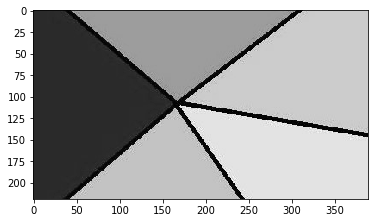

In [70]:
compressed_value = open("compressed_value.txt", "r")
new = compressed_value.read().split("^")
value = []
quantity = []
for i in new:
    newdata = i.split("~")
    value.append(newdata[0].split("\n"))
    quantity.append(newdata[1].split("\n"))
for i in value:
    for j in i:
        j = int(j)
for i in quantity:
    for j in i:
        j = int(j)    
        
# print("\nvalue",value)
# print("\nquanti",quantity)
compressed_value.close()

img_size_f = open("img_size.txt", "r")
data_size = img_size_f.read().split(" ")
row = int(data_size[0])
column = int(data_size[1])
img_size_f.close()

img_decode = np.zeros([row,column], dtype = int)
# print(img_decode)

dem = 0
for row in range(img_decode.shape[0]):
#     print(value[0])
#     print(quantity[0])
    temp_line = np.zeros([1,img_decode.shape[1]], dtype = int)
    print("len temp line", len(temp_line))
    print("ROW ", dem)
    i = 0
    num = 0
    while i < (temp_line.shape[1]):
        temp_value = value[row][num]
        print("tempvalue",temp_value)
        temp_line[0][i] = temp_value
        repeat = int(quantity[row][num])
        print("repeat",repeat)
        for j in range(i, i + repeat):
            temp_line[0][j] = temp_value
#             print(temp_value)
        i = i + repeat
        num = num + 1
#         print("i",i)

    dem = dem + 1
#     print(temp_line)
    img_decode[row][:] = temp_line
plt.imshow(img_decode, cmap= "gray")


## 4.2 Create a Zero Image to prepare for storing decode image:

In [73]:
img_size_f = open("img_size.txt", "r")
data_size = img_size_f.read().split(" ")
row = int(data_size[0])
column = int(data_size[1])
img_size_f.close()

img_decode_RGB = np.zeros([row,column,3], dtype = int)
print(img_decode_RGB.shape)

(219, 389, 3)


##  4.3 Decode Red Filter:

len temp line 1
ROW  0
tempvalue 135
repeat 16
tempvalue 137
repeat 2
tempvalue 136
repeat 1
tempvalue 135
repeat 3
tempvalue 133
repeat 2
tempvalue 134
repeat 2
tempvalue 135
repeat 2
tempvalue 136
repeat 2
tempvalue 135
repeat 1
tempvalue 128
repeat 1
tempvalue 123
repeat 1
tempvalue 113
repeat 1
tempvalue 116
repeat 1
tempvalue 100
repeat 1
tempvalue 85
repeat 1
tempvalue 60
repeat 1
tempvalue 23
repeat 1
tempvalue 13
repeat 1
tempvalue 0
repeat 1
tempvalue 19
repeat 1
tempvalue 18
repeat 1
tempvalue 41
repeat 1
tempvalue 232
repeat 1
tempvalue 222
repeat 1
tempvalue 223
repeat 1
tempvalue 226
repeat 1
tempvalue 246
repeat 1
tempvalue 255
repeat 1
tempvalue 249
repeat 1
tempvalue 228
repeat 1
tempvalue 255
repeat 1
tempvalue 235
repeat 1
tempvalue 255
repeat 1
tempvalue 250
repeat 2
tempvalue 249
repeat 1
tempvalue 247
repeat 1
tempvalue 246
repeat 2
tempvalue 244
repeat 1
tempvalue 248
repeat 1
tempvalue 250
repeat 1
tempvalue 251
repeat 1
tempvalue 252
repeat 1
tempvalue 251
repea

tempvalue 251
repeat 1
tempvalue 242
repeat 1
tempvalue 219
repeat 1
tempvalue 207
repeat 1
tempvalue 62
repeat 1
tempvalue 31
repeat 1
tempvalue 23
repeat 1
tempvalue 21
repeat 1
tempvalue 9
repeat 1
tempvalue 0
repeat 1
tempvalue 4
repeat 1
tempvalue 26
repeat 1
tempvalue 207
repeat 1
tempvalue 212
repeat 1
tempvalue 255
repeat 1
tempvalue 225
repeat 1
tempvalue 247
repeat 1
tempvalue 255
repeat 1
tempvalue 246
repeat 1
tempvalue 249
repeat 1
tempvalue 235
repeat 1
tempvalue 254
repeat 1
tempvalue 255
repeat 1
tempvalue 236
repeat 1
tempvalue 254
repeat 1
tempvalue 255
repeat 3
tempvalue 252
repeat 7
tempvalue 253
repeat 61
len temp line 1
ROW  7
tempvalue 135
repeat 16
tempvalue 134
repeat 2
tempvalue 133
repeat 1
tempvalue 132
repeat 6
tempvalue 133
repeat 1
tempvalue 136
repeat 2
tempvalue 138
repeat 2
tempvalue 137
repeat 2
tempvalue 140
repeat 1
tempvalue 136
repeat 1
tempvalue 131
repeat 1
tempvalue 137
repeat 1
tempvalue 129
repeat 1
tempvalue 118
repeat 1
tempvalue 128
repeat

repeat 1
tempvalue 206
repeat 1
tempvalue 207
repeat 1
tempvalue 59
repeat 1
tempvalue 53
repeat 1
tempvalue 25
repeat 1
tempvalue 27
repeat 1
tempvalue 8
repeat 1
tempvalue 7
repeat 1
tempvalue 16
repeat 1
tempvalue 24
repeat 1
tempvalue 43
repeat 1
tempvalue 224
repeat 1
tempvalue 255
repeat 1
tempvalue 248
repeat 1
tempvalue 247
repeat 1
tempvalue 255
repeat 2
tempvalue 233
repeat 1
tempvalue 237
repeat 1
tempvalue 255
repeat 1
tempvalue 254
repeat 1
tempvalue 248
repeat 1
tempvalue 255
repeat 4
tempvalue 252
repeat 1
tempvalue 250
repeat 2
tempvalue 249
repeat 3
tempvalue 250
repeat 1
tempvalue 253
repeat 69
len temp line 1
ROW  13
tempvalue 135
repeat 16
tempvalue 137
repeat 2
tempvalue 135
repeat 2
tempvalue 133
repeat 2
tempvalue 131
repeat 2
tempvalue 132
repeat 4
tempvalue 131
repeat 4
tempvalue 132
repeat 1
tempvalue 133
repeat 1
tempvalue 135
repeat 2
tempvalue 136
repeat 1
tempvalue 137
repeat 2
tempvalue 134
repeat 1
tempvalue 127
repeat 2
tempvalue 126
repeat 1
tempvalue 

repeat 2
tempvalue 255
repeat 1
tempvalue 241
repeat 1
tempvalue 234
repeat 1
tempvalue 244
repeat 1
tempvalue 252
repeat 1
tempvalue 244
repeat 1
tempvalue 229
repeat 1
tempvalue 252
repeat 1
tempvalue 202
repeat 1
tempvalue 56
repeat 1
tempvalue 37
repeat 1
tempvalue 16
repeat 1
tempvalue 11
repeat 1
tempvalue 12
repeat 1
tempvalue 1
repeat 1
tempvalue 7
repeat 1
tempvalue 29
repeat 1
tempvalue 32
repeat 1
tempvalue 243
repeat 1
tempvalue 240
repeat 2
tempvalue 243
repeat 1
tempvalue 247
repeat 2
tempvalue 253
repeat 3
tempvalue 251
repeat 3
tempvalue 253
repeat 87
len temp line 1
ROW  19
tempvalue 135
repeat 48
tempvalue 133
repeat 1
tempvalue 132
repeat 1
tempvalue 133
repeat 1
tempvalue 134
repeat 1
tempvalue 130
repeat 1
tempvalue 124
repeat 1
tempvalue 121
repeat 1
tempvalue 118
repeat 1
tempvalue 119
repeat 1
tempvalue 106
repeat 1
tempvalue 75
repeat 1
tempvalue 52
repeat 1
tempvalue 43
repeat 1
tempvalue 20
repeat 1
tempvalue 15
repeat 1
tempvalue 11
repeat 1
tempvalue 43
rep

tempvalue 223
repeat 1
tempvalue 42
repeat 1
tempvalue 25
repeat 1
tempvalue 19
repeat 1
tempvalue 7
repeat 1
tempvalue 13
repeat 1
tempvalue 20
repeat 2
tempvalue 37
repeat 1
tempvalue 231
repeat 1
tempvalue 238
repeat 1
tempvalue 255
repeat 1
tempvalue 253
repeat 1
tempvalue 255
repeat 1
tempvalue 254
repeat 2
tempvalue 253
repeat 2
tempvalue 252
repeat 1
tempvalue 251
repeat 1
tempvalue 249
repeat 1
tempvalue 253
repeat 1
tempvalue 254
repeat 1
tempvalue 253
repeat 2
tempvalue 251
repeat 6
tempvalue 253
repeat 85
len temp line 1
ROW  25
tempvalue 135
repeat 48
tempvalue 133
repeat 3
tempvalue 136
repeat 4
tempvalue 137
repeat 2
tempvalue 136
repeat 1
tempvalue 133
repeat 1
tempvalue 131
repeat 1
tempvalue 128
repeat 1
tempvalue 127
repeat 1
tempvalue 126
repeat 1
tempvalue 118
repeat 1
tempvalue 111
repeat 1
tempvalue 71
repeat 1
tempvalue 44
repeat 1
tempvalue 22
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 13
repeat 1
tempvalue 16
repeat 1
tempvalue 26
repeat 1
tem

tempvalue 255
repeat 1
tempvalue 251
repeat 1
tempvalue 255
repeat 1
tempvalue 243
repeat 1
tempvalue 255
repeat 1
tempvalue 252
repeat 1
tempvalue 254
repeat 1
tempvalue 255
repeat 1
tempvalue 253
repeat 1
tempvalue 252
repeat 1
tempvalue 250
repeat 1
tempvalue 249
repeat 1
tempvalue 246
repeat 1
tempvalue 243
repeat 1
tempvalue 245
repeat 1
tempvalue 246
repeat 1
tempvalue 250
repeat 1
tempvalue 251
repeat 1
tempvalue 254
repeat 3
tempvalue 253
repeat 2
tempvalue 251
repeat 1
tempvalue 253
repeat 85
len temp line 1
ROW  31
tempvalue 135
repeat 48
tempvalue 134
repeat 1
tempvalue 133
repeat 8
tempvalue 132
repeat 1
tempvalue 133
repeat 4
tempvalue 132
repeat 2
tempvalue 133
repeat 1
tempvalue 134
repeat 1
tempvalue 136
repeat 1
tempvalue 134
repeat 1
tempvalue 133
repeat 2
tempvalue 127
repeat 1
tempvalue 107
repeat 1
tempvalue 84
repeat 1
tempvalue 48
repeat 1
tempvalue 17
repeat 1
tempvalue 10
repeat 1
tempvalue 8
repeat 1
tempvalue 20
repeat 1
tempvalue 30
repeat 1
tempvalue 48
rep

repeat 1
tempvalue 7
repeat 1
tempvalue 10
repeat 2
tempvalue 21
repeat 1
tempvalue 242
repeat 1
tempvalue 241
repeat 1
tempvalue 230
repeat 1
tempvalue 249
repeat 1
tempvalue 255
repeat 1
tempvalue 250
repeat 1
tempvalue 240
repeat 1
tempvalue 234
repeat 1
tempvalue 252
repeat 1
tempvalue 242
repeat 1
tempvalue 233
repeat 1
tempvalue 255
repeat 2
tempvalue 252
repeat 1
tempvalue 253
repeat 4
tempvalue 251
repeat 4
tempvalue 253
repeat 101
len temp line 1
ROW  37
tempvalue 135
repeat 63
tempvalue 136
repeat 1
tempvalue 139
repeat 1
tempvalue 137
repeat 1
tempvalue 135
repeat 1
tempvalue 130
repeat 1
tempvalue 126
repeat 1
tempvalue 124
repeat 2
tempvalue 126
repeat 1
tempvalue 128
repeat 1
tempvalue 136
repeat 2
tempvalue 129
repeat 1
tempvalue 123
repeat 1
tempvalue 119
repeat 1
tempvalue 106
repeat 1
tempvalue 81
repeat 1
tempvalue 33
repeat 1
tempvalue 16
repeat 1
tempvalue 19
repeat 1
tempvalue 13
repeat 1
tempvalue 27
repeat 1
tempvalue 24
repeat 1
tempvalue 44
repeat 1
tempvalue 

repeat 1
tempvalue 251
repeat 1
tempvalue 237
repeat 1
tempvalue 239
repeat 1
tempvalue 224
repeat 1
tempvalue 217
repeat 1
tempvalue 42
repeat 1
tempvalue 15
repeat 1
tempvalue 23
repeat 1
tempvalue 9
repeat 1
tempvalue 3
repeat 1
tempvalue 9
repeat 1
tempvalue 19
repeat 1
tempvalue 31
repeat 1
tempvalue 240
repeat 1
tempvalue 236
repeat 1
tempvalue 238
repeat 1
tempvalue 254
repeat 1
tempvalue 250
repeat 1
tempvalue 248
repeat 1
tempvalue 252
repeat 2
tempvalue 250
repeat 1
tempvalue 249
repeat 1
tempvalue 247
repeat 1
tempvalue 244
repeat 1
tempvalue 243
repeat 1
tempvalue 244
repeat 1
tempvalue 246
repeat 1
tempvalue 249
repeat 3
tempvalue 250
repeat 4
tempvalue 253
repeat 109
len temp line 1
ROW  43
tempvalue 135
repeat 64
tempvalue 134
repeat 1
tempvalue 136
repeat 1
tempvalue 137
repeat 1
tempvalue 139
repeat 2
tempvalue 138
repeat 1
tempvalue 134
repeat 1
tempvalue 132
repeat 1
tempvalue 129
repeat 2
tempvalue 134
repeat 1
tempvalue 135
repeat 1
tempvalue 137
repeat 1
tempvalue

tempvalue 47
repeat 1
tempvalue 22
repeat 1
tempvalue 7
repeat 1
tempvalue 3
repeat 1
tempvalue 21
repeat 1
tempvalue 15
repeat 1
tempvalue 42
repeat 1
tempvalue 63
repeat 1
tempvalue 226
repeat 1
tempvalue 233
repeat 1
tempvalue 242
repeat 1
tempvalue 234
repeat 1
tempvalue 238
repeat 1
tempvalue 249
repeat 1
tempvalue 246
repeat 1
tempvalue 255
repeat 1
tempvalue 251
repeat 1
tempvalue 253
repeat 1
tempvalue 248
repeat 1
tempvalue 247
repeat 1
tempvalue 249
repeat 1
tempvalue 255
repeat 2
tempvalue 254
repeat 2
tempvalue 248
repeat 2
tempvalue 250
repeat 1
tempvalue 253
repeat 1
tempvalue 255
repeat 4
tempvalue 253
repeat 1
tempvalue 252
repeat 1
tempvalue 253
repeat 80
tempvalue 255
repeat 4
tempvalue 254
repeat 2
tempvalue 252
repeat 2
tempvalue 253
repeat 1
tempvalue 250
repeat 2
tempvalue 253
repeat 1
tempvalue 255
repeat 5
tempvalue 253
repeat 1
tempvalue 254
repeat 1
tempvalue 255
repeat 1
tempvalue 245
repeat 1
tempvalue 251
repeat 1
tempvalue 219
repeat 1
tempvalue 255
repeat

tempvalue 132
repeat 1
tempvalue 129
repeat 1
tempvalue 130
repeat 1
tempvalue 135
repeat 1
tempvalue 141
repeat 1
tempvalue 145
repeat 1
tempvalue 147
repeat 1
tempvalue 146
repeat 1
tempvalue 133
repeat 1
tempvalue 117
repeat 1
tempvalue 107
repeat 1
tempvalue 83
repeat 1
tempvalue 21
repeat 1
tempvalue 16
repeat 1
tempvalue 5
repeat 1
tempvalue 10
repeat 1
tempvalue 15
repeat 1
tempvalue 19
repeat 1
tempvalue 32
repeat 1
tempvalue 49
repeat 1
tempvalue 197
repeat 1
tempvalue 239
repeat 1
tempvalue 242
repeat 1
tempvalue 255
repeat 3
tempvalue 243
repeat 1
tempvalue 247
repeat 1
tempvalue 245
repeat 1
tempvalue 238
repeat 1
tempvalue 249
repeat 2
tempvalue 253
repeat 1
tempvalue 255
repeat 2
tempvalue 253
repeat 3
tempvalue 255
repeat 2
tempvalue 253
repeat 84
tempvalue 254
repeat 2
tempvalue 255
repeat 2
tempvalue 254
repeat 1
tempvalue 255
repeat 2
tempvalue 254
repeat 1
tempvalue 253
repeat 1
tempvalue 251
repeat 1
tempvalue 248
repeat 1
tempvalue 245
repeat 1
tempvalue 248
repeat

repeat 1
tempvalue 12
repeat 1
tempvalue 6
repeat 1
tempvalue 13
repeat 1
tempvalue 19
repeat 1
tempvalue 224
repeat 1
tempvalue 235
repeat 1
tempvalue 251
repeat 2
tempvalue 248
repeat 1
tempvalue 247
repeat 1
tempvalue 248
repeat 1
tempvalue 234
repeat 1
tempvalue 221
repeat 1
tempvalue 250
repeat 1
tempvalue 237
repeat 1
tempvalue 251
repeat 1
tempvalue 246
repeat 1
tempvalue 248
repeat 1
tempvalue 250
repeat 1
tempvalue 252
repeat 3
tempvalue 250
repeat 10
tempvalue 251
repeat 2
tempvalue 253
repeat 123
len temp line 1
ROW  60
tempvalue 135
repeat 80
tempvalue 136
repeat 3
tempvalue 135
repeat 3
tempvalue 133
repeat 1
tempvalue 132
repeat 1
tempvalue 131
repeat 1
tempvalue 129
repeat 5
tempvalue 128
repeat 1
tempvalue 130
repeat 1
tempvalue 135
repeat 1
tempvalue 138
repeat 1
tempvalue 139
repeat 1
tempvalue 138
repeat 1
tempvalue 135
repeat 1
tempvalue 134
repeat 1
tempvalue 138
repeat 2
tempvalue 120
repeat 1
tempvalue 128
repeat 1
tempvalue 92
repeat 1
tempvalue 43
repeat 1
temp

repeat 132
len temp line 1
ROW  65
tempvalue 135
repeat 96
tempvalue 134
repeat 3
tempvalue 133
repeat 1
tempvalue 135
repeat 2
tempvalue 136
repeat 2
tempvalue 137
repeat 1
tempvalue 136
repeat 1
tempvalue 132
repeat 1
tempvalue 129
repeat 1
tempvalue 122
repeat 1
tempvalue 120
repeat 1
tempvalue 116
repeat 1
tempvalue 105
repeat 1
tempvalue 79
repeat 1
tempvalue 43
repeat 1
tempvalue 34
repeat 1
tempvalue 28
repeat 1
tempvalue 23
repeat 1
tempvalue 21
repeat 1
tempvalue 22
repeat 1
tempvalue 41
repeat 1
tempvalue 60
repeat 1
tempvalue 217
repeat 1
tempvalue 241
repeat 1
tempvalue 227
repeat 1
tempvalue 255
repeat 1
tempvalue 240
repeat 1
tempvalue 252
repeat 1
tempvalue 244
repeat 1
tempvalue 252
repeat 1
tempvalue 250
repeat 1
tempvalue 248
repeat 1
tempvalue 247
repeat 2
tempvalue 248
repeat 1
tempvalue 250
repeat 1
tempvalue 252
repeat 2
tempvalue 249
repeat 1
tempvalue 245
repeat 2
tempvalue 248
repeat 1
tempvalue 252
repeat 1
tempvalue 255
repeat 3
tempvalue 252
repeat 3
tempval

tempvalue 13
repeat 1
tempvalue 11
repeat 1
tempvalue 18
repeat 1
tempvalue 28
repeat 1
tempvalue 236
repeat 1
tempvalue 230
repeat 1
tempvalue 251
repeat 1
tempvalue 237
repeat 1
tempvalue 242
repeat 1
tempvalue 251
repeat 1
tempvalue 248
repeat 1
tempvalue 245
repeat 1
tempvalue 255
repeat 2
tempvalue 252
repeat 1
tempvalue 253
repeat 2
tempvalue 251
repeat 6
tempvalue 253
repeat 149
len temp line 1
ROW  71
tempvalue 135
repeat 96
tempvalue 137
repeat 2
tempvalue 136
repeat 1
tempvalue 132
repeat 2
tempvalue 130
repeat 3
tempvalue 131
repeat 1
tempvalue 133
repeat 1
tempvalue 138
repeat 2
tempvalue 137
repeat 1
tempvalue 136
repeat 1
tempvalue 137
repeat 1
tempvalue 138
repeat 1
tempvalue 134
repeat 1
tempvalue 141
repeat 1
tempvalue 131
repeat 1
tempvalue 125
repeat 1
tempvalue 126
repeat 1
tempvalue 117
repeat 1
tempvalue 120
repeat 1
tempvalue 87
repeat 1
tempvalue 53
repeat 1
tempvalue 20
repeat 1
tempvalue 0
repeat 2
tempvalue 3
repeat 1
tempvalue 17
repeat 1
tempvalue 24
repeat

tempvalue 251
repeat 1
tempvalue 252
repeat 1
tempvalue 253
repeat 4
tempvalue 252
repeat 1
tempvalue 253
repeat 4
tempvalue 255
repeat 4
tempvalue 253
repeat 24
tempvalue 251
repeat 1
tempvalue 253
repeat 1
tempvalue 254
repeat 1
tempvalue 252
repeat 2
tempvalue 253
repeat 2
tempvalue 252
repeat 1
tempvalue 251
repeat 1
tempvalue 255
repeat 2
tempvalue 254
repeat 1
tempvalue 255
repeat 1
tempvalue 248
repeat 1
tempvalue 243
repeat 1
tempvalue 248
repeat 1
tempvalue 227
repeat 1
tempvalue 229
repeat 1
tempvalue 249
repeat 1
tempvalue 239
repeat 1
tempvalue 189
repeat 1
tempvalue 65
repeat 1
tempvalue 44
repeat 1
tempvalue 13
repeat 1
tempvalue 4
repeat 1
tempvalue 10
repeat 1
tempvalue 18
repeat 1
tempvalue 22
repeat 1
tempvalue 27
repeat 1
tempvalue 240
repeat 1
tempvalue 243
repeat 1
tempvalue 255
repeat 1
tempvalue 251
repeat 1
tempvalue 234
repeat 1
tempvalue 249
repeat 1
tempvalue 214
repeat 1
tempvalue 255
repeat 1
tempvalue 248
repeat 1
tempvalue 242
repeat 1
tempvalue 254
repea

repeat 1
tempvalue 253
repeat 2
tempvalue 252
repeat 1
tempvalue 253
repeat 1
tempvalue 254
repeat 1
tempvalue 252
repeat 1
tempvalue 255
repeat 1
tempvalue 246
repeat 1
tempvalue 251
repeat 1
tempvalue 250
repeat 1
tempvalue 238
repeat 1
tempvalue 253
repeat 1
tempvalue 255
repeat 1
tempvalue 227
repeat 1
tempvalue 254
repeat 1
tempvalue 255
repeat 1
tempvalue 224
repeat 1
tempvalue 231
repeat 1
tempvalue 213
repeat 1
tempvalue 203
repeat 1
tempvalue 56
repeat 1
tempvalue 28
repeat 1
tempvalue 26
repeat 1
tempvalue 14
repeat 1
tempvalue 21
repeat 1
tempvalue 8
repeat 1
tempvalue 31
repeat 1
tempvalue 23
repeat 1
tempvalue 250
repeat 1
tempvalue 223
repeat 1
tempvalue 235
repeat 1
tempvalue 255
repeat 1
tempvalue 232
repeat 1
tempvalue 235
repeat 1
tempvalue 250
repeat 1
tempvalue 248
repeat 1
tempvalue 255
repeat 1
tempvalue 251
repeat 4
tempvalue 253
repeat 2
tempvalue 254
repeat 2
tempvalue 253
repeat 165
len temp line 1
ROW  82
tempvalue 135
repeat 112
tempvalue 137
repeat 2
tempva

repeat 1
tempvalue 131
repeat 1
tempvalue 134
repeat 1
tempvalue 141
repeat 1
tempvalue 146
repeat 1
tempvalue 143
repeat 1
tempvalue 136
repeat 1
tempvalue 127
repeat 1
tempvalue 117
repeat 1
tempvalue 98
repeat 1
tempvalue 74
repeat 1
tempvalue 50
repeat 1
tempvalue 15
repeat 1
tempvalue 7
repeat 1
tempvalue 16
repeat 1
tempvalue 1
repeat 1
tempvalue 16
repeat 1
tempvalue 30
repeat 1
tempvalue 211
repeat 1
tempvalue 194
repeat 1
tempvalue 245
repeat 1
tempvalue 243
repeat 1
tempvalue 248
repeat 1
tempvalue 255
repeat 1
tempvalue 250
repeat 1
tempvalue 241
repeat 1
tempvalue 254
repeat 1
tempvalue 235
repeat 1
tempvalue 255
repeat 1
tempvalue 242
repeat 1
tempvalue 255
repeat 1
tempvalue 250
repeat 1
tempvalue 255
repeat 2
tempvalue 253
repeat 1
tempvalue 252
repeat 2
tempvalue 250
repeat 1
tempvalue 252
repeat 2
tempvalue 255
repeat 5
tempvalue 253
repeat 1
tempvalue 252
repeat 4
tempvalue 250
repeat 1
tempvalue 247
repeat 1
tempvalue 245
repeat 1
tempvalue 249
repeat 1
tempvalue 251

tempvalue 255
repeat 1
tempvalue 252
repeat 1
tempvalue 253
repeat 1
tempvalue 252
repeat 1
tempvalue 249
repeat 1
tempvalue 253
repeat 1
tempvalue 249
repeat 1
tempvalue 252
repeat 2
tempvalue 253
repeat 1
tempvalue 255
repeat 2
tempvalue 251
repeat 1
tempvalue 255
repeat 1
tempvalue 253
repeat 1
tempvalue 254
repeat 1
tempvalue 243
repeat 1
tempvalue 247
repeat 1
tempvalue 250
repeat 1
tempvalue 248
repeat 1
tempvalue 249
repeat 1
tempvalue 255
repeat 1
tempvalue 249
repeat 1
tempvalue 238
repeat 1
tempvalue 218
repeat 1
tempvalue 57
repeat 1
tempvalue 37
repeat 1
tempvalue 17
repeat 1
tempvalue 28
repeat 1
tempvalue 7
repeat 1
tempvalue 10
repeat 1
tempvalue 19
repeat 1
tempvalue 23
repeat 1
tempvalue 214
repeat 1
tempvalue 239
repeat 1
tempvalue 251
repeat 1
tempvalue 211
repeat 1
tempvalue 247
repeat 1
tempvalue 245
repeat 1
tempvalue 255
repeat 1
tempvalue 231
repeat 1
tempvalue 241
repeat 1
tempvalue 247
repeat 1
tempvalue 249
repeat 1
tempvalue 255
repeat 2
tempvalue 254
repeat

tempvalue 250
repeat 1
tempvalue 252
repeat 7
tempvalue 253
repeat 4
tempvalue 254
repeat 4
tempvalue 255
repeat 6
tempvalue 253
repeat 1
tempvalue 252
repeat 1
tempvalue 253
repeat 2
tempvalue 251
repeat 2
tempvalue 250
repeat 4
tempvalue 251
repeat 1
tempvalue 253
repeat 31
tempvalue 251
repeat 16
tempvalue 253
repeat 117
len temp line 1
ROW  98
tempvalue 135
repeat 128
tempvalue 136
repeat 2
tempvalue 135
repeat 1
tempvalue 133
repeat 1
tempvalue 132
repeat 2
tempvalue 129
repeat 2
tempvalue 130
repeat 2
tempvalue 132
repeat 1
tempvalue 133
repeat 1
tempvalue 135
repeat 2
tempvalue 136
repeat 1
tempvalue 135
repeat 1
tempvalue 127
repeat 1
tempvalue 128
repeat 1
tempvalue 121
repeat 1
tempvalue 116
repeat 1
tempvalue 124
repeat 1
tempvalue 111
repeat 1
tempvalue 96
repeat 1
tempvalue 105
repeat 1
tempvalue 53
repeat 1
tempvalue 30
repeat 1
tempvalue 23
repeat 1
tempvalue 3
repeat 1
tempvalue 13
repeat 1
tempvalue 28
repeat 1
tempvalue 51
repeat 1
tempvalue 223
repeat 1
tempvalue 230

repeat 1
tempvalue 253
repeat 2
tempvalue 252
repeat 2
tempvalue 253
repeat 2
tempvalue 254
repeat 1
tempvalue 253
repeat 3
tempvalue 252
repeat 2
tempvalue 253
repeat 3
tempvalue 251
repeat 1
tempvalue 253
repeat 1
tempvalue 249
repeat 1
tempvalue 254
repeat 1
tempvalue 248
repeat 1
tempvalue 252
repeat 1
tempvalue 248
repeat 1
tempvalue 250
repeat 1
tempvalue 251
repeat 2
tempvalue 249
repeat 1
tempvalue 251
repeat 1
tempvalue 252
repeat 1
tempvalue 250
repeat 1
tempvalue 252
repeat 1
tempvalue 249
repeat 1
tempvalue 253
repeat 133
len temp line 1
ROW  105
tempvalue 135
repeat 128
tempvalue 134
repeat 4
tempvalue 132
repeat 6
tempvalue 133
repeat 2
tempvalue 135
repeat 1
tempvalue 136
repeat 2
tempvalue 137
repeat 1
tempvalue 138
repeat 1
tempvalue 140
repeat 2
tempvalue 138
repeat 1
tempvalue 136
repeat 1
tempvalue 131
repeat 1
tempvalue 126
repeat 1
tempvalue 127
repeat 1
tempvalue 131
repeat 1
tempvalue 140
repeat 1
tempvalue 143
repeat 1
tempvalue 139
repeat 1
tempvalue 128
repea

repeat 1
tempvalue 253
repeat 3
tempvalue 252
repeat 2
tempvalue 253
repeat 3
tempvalue 248
repeat 1
tempvalue 252
repeat 1
tempvalue 250
repeat 1
tempvalue 252
repeat 1
tempvalue 248
repeat 1
tempvalue 254
repeat 1
tempvalue 251
repeat 1
tempvalue 250
repeat 1
tempvalue 252
repeat 1
tempvalue 247
repeat 1
tempvalue 253
repeat 1
tempvalue 249
repeat 1
tempvalue 250
repeat 1
tempvalue 254
repeat 1
tempvalue 248
repeat 1
tempvalue 251
repeat 1
tempvalue 250
repeat 16
tempvalue 253
repeat 117
len temp line 1
ROW  110
tempvalue 135
repeat 128
tempvalue 136
repeat 8
tempvalue 134
repeat 2
tempvalue 133
repeat 1
tempvalue 132
repeat 1
tempvalue 130
repeat 3
tempvalue 129
repeat 3
tempvalue 130
repeat 5
tempvalue 132
repeat 1
tempvalue 133
repeat 1
tempvalue 139
repeat 1
tempvalue 144
repeat 1
tempvalue 147
repeat 1
tempvalue 139
repeat 1
tempvalue 125
repeat 1
tempvalue 117
repeat 1
tempvalue 95
repeat 1
tempvalue 79
repeat 1
tempvalue 47
repeat 1
tempvalue 27
repeat 1
tempvalue 18
repeat 1


tempvalue 254
repeat 1
tempvalue 245
repeat 1
tempvalue 235
repeat 1
tempvalue 243
repeat 1
tempvalue 238
repeat 1
tempvalue 255
repeat 2
tempvalue 241
repeat 1
tempvalue 255
repeat 1
tempvalue 224
repeat 1
tempvalue 253
repeat 1
tempvalue 238
repeat 1
tempvalue 255
repeat 3
tempvalue 245
repeat 1
tempvalue 246
repeat 1
tempvalue 244
repeat 1
tempvalue 255
repeat 1
tempvalue 248
repeat 1
tempvalue 253
repeat 1
tempvalue 236
repeat 1
tempvalue 246
repeat 1
tempvalue 255
repeat 1
tempvalue 250
repeat 1
tempvalue 255
repeat 1
tempvalue 241
repeat 1
tempvalue 255
repeat 1
tempvalue 250
repeat 1
tempvalue 247
repeat 1
tempvalue 252
repeat 1
tempvalue 251
repeat 1
tempvalue 250
repeat 1
tempvalue 251
repeat 1
tempvalue 252
repeat 4
tempvalue 253
repeat 2
tempvalue 254
repeat 1
tempvalue 253
repeat 1
tempvalue 254
repeat 1
tempvalue 253
repeat 1
tempvalue 248
repeat 1
tempvalue 246
repeat 1
tempvalue 249
repeat 1
tempvalue 250
repeat 1
tempvalue 251
repeat 2
tempvalue 253
repeat 4
tempvalue 2

repeat 8
tempvalue 251
repeat 6
tempvalue 253
repeat 10
tempvalue 251
repeat 16
tempvalue 253
repeat 4
tempvalue 251
repeat 12
tempvalue 253
repeat 21
len temp line 1
ROW  116
tempvalue 135
repeat 128
tempvalue 136
repeat 1
tempvalue 134
repeat 2
tempvalue 132
repeat 2
tempvalue 130
repeat 1
tempvalue 129
repeat 1
tempvalue 128
repeat 1
tempvalue 127
repeat 2
tempvalue 128
repeat 2
tempvalue 129
repeat 1
tempvalue 130
repeat 2
tempvalue 132
repeat 1
tempvalue 133
repeat 1
tempvalue 132
repeat 2
tempvalue 135
repeat 1
tempvalue 133
repeat 1
tempvalue 126
repeat 1
tempvalue 124
repeat 1
tempvalue 123
repeat 1
tempvalue 115
repeat 1
tempvalue 84
repeat 1
tempvalue 61
repeat 1
tempvalue 37
repeat 1
tempvalue 23
repeat 1
tempvalue 11
repeat 1
tempvalue 5
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 1
tempvalue 5
repeat 1
tempvalue 174
repeat 1
tempvalue 202
repeat 1
tempvalue 178
repeat 1
tempvalue 202
repeat 1
tempvalue 198
repeat 1
tempvalue 212
repeat 1
tempvalue 2
repeat 1
tempvalue

tempvalue 2
repeat 1
tempvalue 17
repeat 1
tempvalue 3
repeat 1
tempvalue 16
repeat 1
tempvalue 226
repeat 1
tempvalue 236
repeat 2
tempvalue 232
repeat 2
tempvalue 242
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 240
repeat 1
tempvalue 235
repeat 1
tempvalue 240
repeat 1
tempvalue 238
repeat 1
tempvalue 239
repeat 1
tempvalue 227
repeat 1
tempvalue 243
repeat 1
tempvalue 233
repeat 1
tempvalue 238
repeat 1
tempvalue 242
repeat 1
tempvalue 237
repeat 1
tempvalue 232
repeat 1
tempvalue 235
repeat 1
tempvalue 239
repeat 1
tempvalue 231
repeat 1
tempvalue 229
repeat 1
tempvalue 230
repeat 1
tempvalue 236
repeat 1
tempvalue 233
repeat 2
tempvalue 232
repeat 1
tempvalue 231
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 227
repeat 1
tempvalue 231
repeat 1
tempvalue 232
repeat 1
tempvalue 231
repeat 1
tempvalue 230
repeat 1
tempvalue 232
repeat 2
tempvalue 231
repeat 1
tempvalue 230
repeat 1
tempvalue 231
repeat 1
tempvalue 235
repeat 1
tempvalue 224
rep

repeat 21
len temp line 1
ROW  122
tempvalue 135
repeat 125
tempvalue 136
repeat 3
tempvalue 137
repeat 1
tempvalue 136
repeat 1
tempvalue 135
repeat 1
tempvalue 133
repeat 1
tempvalue 132
repeat 1
tempvalue 133
repeat 1
tempvalue 134
repeat 1
tempvalue 135
repeat 1
tempvalue 138
repeat 1
tempvalue 144
repeat 1
tempvalue 142
repeat 1
tempvalue 135
repeat 1
tempvalue 136
repeat 1
tempvalue 133
repeat 1
tempvalue 129
repeat 1
tempvalue 121
repeat 1
tempvalue 104
repeat 1
tempvalue 111
repeat 1
tempvalue 84
repeat 1
tempvalue 51
repeat 1
tempvalue 49
repeat 1
tempvalue 27
repeat 1
tempvalue 16
repeat 1
tempvalue 21
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 166
repeat 1
tempvalue 190
repeat 1
tempvalue 185
repeat 1
tempvalue 168
repeat 1
tempvalue 185
repeat 1
tempvalue 189
repeat 1
tempvalue 188
repeat 1
tempvalue 169
repeat 1
tempvalue 177
repeat 1
tempvalue 181
repeat 1
tempvalue 177
repeat 1
tempvalue 191
repeat 1
tempvalue 148
repeat 1
tempvalue

repeat 1
tempvalue 233
repeat 1
tempvalue 234
repeat 1
tempvalue 236
repeat 1
tempvalue 238
repeat 1
tempvalue 242
repeat 1
tempvalue 245
repeat 1
tempvalue 235
repeat 1
tempvalue 234
repeat 1
tempvalue 244
repeat 1
tempvalue 220
repeat 1
tempvalue 241
repeat 1
tempvalue 245
repeat 1
tempvalue 255
repeat 1
tempvalue 223
repeat 1
tempvalue 241
repeat 1
tempvalue 242
repeat 1
tempvalue 252
repeat 1
tempvalue 240
repeat 1
tempvalue 227
repeat 1
tempvalue 255
repeat 1
tempvalue 231
repeat 1
tempvalue 240
repeat 1
tempvalue 223
repeat 1
tempvalue 222
repeat 1
tempvalue 241
repeat 1
tempvalue 250
repeat 1
tempvalue 240
repeat 1
tempvalue 244
repeat 1
tempvalue 241
repeat 1
tempvalue 240
repeat 1
tempvalue 244
repeat 1
tempvalue 231
repeat 1
tempvalue 233
repeat 1
tempvalue 231
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 222
repeat 1
tempvalue 234
repeat 1
tempvalue 232
repeat 1
tempvalue 230
repeat 1
tempvalue 232
repeat 1
tempvalue 221
repeat 1
tempvalue 4
repeat 1
temp

tempvalue 0
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 1
tempvalue 3
repeat 2
tempvalue 229
repeat 1
tempvalue 231
repeat 1
tempvalue 236
repeat 1
tempvalue 233
repeat 1
tempvalue 229
repeat 1
tempvalue 231
repeat 1
tempvalue 235
repeat 1
tempvalue 239
repeat 1
tempvalue 237
repeat 1
tempvalue 235
repeat 1
tempvalue 238
repeat 3
tempvalue 237
repeat 3
tempvalue 235
repeat 6
tempvalue 237
repeat 11
tempvalue 235
repeat 1
tempvalue 236
repeat 1
tempvalue 233
repeat 1
tempvalue 231
repeat 1
tempvalue 232
repeat 1
tempvalue 234
repeat 1
tempvalue 233
repeat 2
tempvalue 235
repeat 3
tempvalue 237
repeat 1
tempvalue 231
repeat 2
tempvalue 235
repeat 1
tempvalue 234
repeat 1
tempvalue 235
repeat 1
tempvalue 236
repeat 1
tempvalue 234
repeat 1
tempvalue 233
repeat 1
tempvalue 234
repeat 1
tempvalue 232
repeat 1
tempvalue 230
repeat 1
tempvalue 231
repeat 1
tempvalue 229
repeat 1
tempvalue 232
repeat 3
tempvalue 230
repeat 1
tempvalue 242
repeat 1
tempvalue 237
repeat 1
tempvalue 229
rep

tempvalue 245
repeat 1
tempvalue 247
repeat 2
tempvalue 255
repeat 1
tempvalue 252
repeat 1
tempvalue 248
repeat 1
tempvalue 246
repeat 1
tempvalue 255
repeat 1
tempvalue 251
repeat 1
tempvalue 249
repeat 1
tempvalue 253
repeat 1
tempvalue 248
repeat 1
tempvalue 252
repeat 1
tempvalue 249
repeat 1
tempvalue 252
repeat 1
tempvalue 251
repeat 1
tempvalue 249
repeat 1
tempvalue 251
repeat 3
tempvalue 250
repeat 1
tempvalue 251
repeat 2
tempvalue 250
repeat 1
tempvalue 251
repeat 1
tempvalue 249
repeat 1
tempvalue 250
repeat 1
tempvalue 251
repeat 1
tempvalue 254
repeat 1
tempvalue 252
repeat 2
tempvalue 253
repeat 1
tempvalue 252
repeat 2
tempvalue 253
repeat 1
tempvalue 251
repeat 1
tempvalue 254
repeat 1
tempvalue 248
repeat 1
tempvalue 251
repeat 1
tempvalue 250
repeat 1
tempvalue 252
repeat 2
tempvalue 253
repeat 1
tempvalue 252
repeat 1
tempvalue 253
repeat 1
len temp line 1
ROW  130
tempvalue 135
repeat 112
tempvalue 137
repeat 1
tempvalue 136
repeat 1
tempvalue 135
repeat 1
tempval

repeat 1
tempvalue 238
repeat 1
tempvalue 234
repeat 1
tempvalue 240
repeat 1
tempvalue 238
repeat 1
tempvalue 236
repeat 2
tempvalue 252
repeat 1
tempvalue 212
repeat 1
tempvalue 235
repeat 1
tempvalue 225
repeat 1
tempvalue 238
repeat 1
tempvalue 235
repeat 1
tempvalue 216
repeat 1
tempvalue 249
repeat 1
tempvalue 232
repeat 1
tempvalue 229
repeat 1
tempvalue 234
repeat 2
tempvalue 238
repeat 1
tempvalue 13
repeat 1
tempvalue 14
repeat 1
tempvalue 15
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 8
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 22
repeat 1
tempvalue 5
repeat 1
tempvalue 2
repeat 1
tempvalue 1
repeat 1
tempvalue 16
repeat 1
tempvalue 7
repeat 1
tempvalue 5
repeat 1
tempvalue 16
repeat 1
tempvalue 7
repeat 1
tempvalue 15
repeat 1
tempvalue 17
repeat 1
tempvalue 21
repeat 1
tempvalue 44
repeat 1
tempvalue 29
repeat 1
tempvalue 24
repeat 1
tempvalue 53
repeat 1
tempvalue 199
repeat 1
tempvalue 254
repeat 1
tempvalue 245
repeat 1
tempvalue 233
repeat 1
tempvalue 23

repeat 1
tempvalue 178
repeat 1
tempvalue 174
repeat 1
tempvalue 177
repeat 1
tempvalue 179
repeat 2
tempvalue 181
repeat 1
tempvalue 179
repeat 2
tempvalue 181
repeat 8
tempvalue 179
repeat 2
tempvalue 178
repeat 4
tempvalue 175
repeat 1
tempvalue 177
repeat 1
tempvalue 180
repeat 1
tempvalue 179
repeat 1
tempvalue 181
repeat 1
tempvalue 182
repeat 1
tempvalue 181
repeat 1
tempvalue 178
repeat 1
tempvalue 167
repeat 1
tempvalue 175
repeat 1
tempvalue 171
repeat 1
tempvalue 202
repeat 1
tempvalue 167
repeat 1
tempvalue 9
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 6
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 246
repeat 1
tempvalue 218
repeat 1
tempvalue 245
repeat 1
tempvalue 229
repeat 1
tempvalue 254
repeat 1
tempvalue 220
repeat 1
tempvalue 236
repeat 1
tempvalue 245
repeat 1
tempvalue 239
repeat 1
tempvalue 236
repeat 1
tempvalue 241
repeat 2
tempvalue 234
repeat 1
tempvalue 237
repeat 4
tempvalue 238
repeat 60
tempvalue 237
repeat 1
tempvalue 23

tempvalue 201
repeat 1
tempvalue 188
repeat 1
tempvalue 173
repeat 1
tempvalue 179
repeat 1
tempvalue 184
repeat 1
tempvalue 185
repeat 2
tempvalue 186
repeat 1
tempvalue 185
repeat 2
tempvalue 184
repeat 2
tempvalue 182
repeat 2
tempvalue 181
repeat 2
tempvalue 179
repeat 3
tempvalue 178
repeat 1
tempvalue 179
repeat 1
tempvalue 181
repeat 2
tempvalue 179
repeat 6
tempvalue 180
repeat 1
tempvalue 176
repeat 2
tempvalue 180
repeat 1
tempvalue 179
repeat 1
tempvalue 176
repeat 1
tempvalue 179
repeat 1
tempvalue 187
repeat 1
tempvalue 179
repeat 1
tempvalue 171
repeat 1
tempvalue 175
repeat 1
tempvalue 188
repeat 1
tempvalue 169
repeat 1
tempvalue 164
repeat 1
tempvalue 194
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 1
tempvalue 8
repeat 1
tempvalue 18
repeat 1
tempvalue 5
repeat 1
tempvalue 12
repeat 1
tempvalue 214
repeat 1
tempvalue 230
repeat 1
tempvalue 234
repeat 1
tempvalue 246
repeat 1
tempvalue 214
repeat 1
tempvalue 234
repeat 1
tempvalue 253
repeat 1
tempvalue 228
repeat 

tempvalue 226
repeat 1
tempvalue 235
repeat 1
tempvalue 227
repeat 1
tempvalue 240
repeat 1
tempvalue 239
repeat 1
tempvalue 232
repeat 1
tempvalue 238
repeat 4
tempvalue 237
repeat 4
tempvalue 238
repeat 64
tempvalue 237
repeat 32
tempvalue 235
repeat 1
tempvalue 234
repeat 4
tempvalue 235
repeat 3
tempvalue 234
repeat 2
tempvalue 235
repeat 2
tempvalue 234
repeat 1
tempvalue 233
repeat 1
tempvalue 234
repeat 1
tempvalue 237
repeat 1
tempvalue 242
repeat 1
tempvalue 239
repeat 1
tempvalue 230
repeat 1
tempvalue 245
repeat 1
tempvalue 242
repeat 1
tempvalue 232
repeat 1
tempvalue 229
repeat 1
tempvalue 236
repeat 1
tempvalue 231
repeat 1
tempvalue 237
repeat 1
tempvalue 248
repeat 1
tempvalue 255
repeat 1
tempvalue 234
repeat 1
tempvalue 248
repeat 1
tempvalue 235
repeat 1
tempvalue 240
repeat 1
tempvalue 234
repeat 1
tempvalue 237
repeat 1
tempvalue 229
repeat 1
tempvalue 225
repeat 1
tempvalue 239
repeat 1
tempvalue 251
repeat 1
tempvalue 218
repeat 1
tempvalue 240
repeat 1
tempvalue

repeat 17
tempvalue 237
repeat 12
tempvalue 238
repeat 6
tempvalue 237
repeat 1
tempvalue 238
repeat 1
tempvalue 237
repeat 6
tempvalue 235
repeat 7
tempvalue 237
repeat 8
tempvalue 238
repeat 7
tempvalue 237
repeat 2
tempvalue 235
repeat 2
tempvalue 234
repeat 5
tempvalue 233
repeat 1
tempvalue 232
repeat 1
tempvalue 234
repeat 1
tempvalue 233
repeat 1
tempvalue 228
repeat 1
tempvalue 232
repeat 1
tempvalue 229
repeat 1
tempvalue 206
repeat 1
tempvalue 225
repeat 1
tempvalue 255
repeat 1
tempvalue 209
repeat 1
tempvalue 33
repeat 1
tempvalue 7
repeat 1
tempvalue 9
repeat 1
tempvalue 17
repeat 1
tempvalue 3
repeat 1
tempvalue 7
repeat 1
tempvalue 4
repeat 1
tempvalue 8
repeat 1
tempvalue 3
repeat 1
tempvalue 4
repeat 1
tempvalue 9
repeat 1
tempvalue 3
repeat 1
tempvalue 18
repeat 1
tempvalue 7
repeat 1
tempvalue 6
repeat 1
tempvalue 22
repeat 1
tempvalue 6
repeat 1
tempvalue 9
repeat 1
len temp line 1
ROW  145
tempvalue 135
repeat 96
tempvalue 136
repeat 2
tempvalue 134
repeat 1
tempva

repeat 1
tempvalue 0
repeat 4
tempvalue 179
repeat 1
tempvalue 185
repeat 1
tempvalue 195
repeat 1
tempvalue 174
repeat 1
tempvalue 162
repeat 1
tempvalue 179
repeat 1
tempvalue 198
repeat 1
tempvalue 165
repeat 1
tempvalue 171
repeat 1
tempvalue 179
repeat 1
tempvalue 176
repeat 1
tempvalue 181
repeat 4
tempvalue 179
repeat 4
tempvalue 181
repeat 32
tempvalue 184
repeat 1
tempvalue 175
repeat 1
tempvalue 180
repeat 1
tempvalue 182
repeat 1
tempvalue 176
repeat 1
tempvalue 181
repeat 1
tempvalue 190
repeat 1
tempvalue 187
repeat 1
tempvalue 177
repeat 1
tempvalue 164
repeat 1
tempvalue 175
repeat 1
tempvalue 206
repeat 1
tempvalue 183
repeat 1
tempvalue 173
repeat 1
tempvalue 9
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 3
repeat 1
tempvalue 1
repeat 1
tempvalue 12
repeat 1
tempvalue 229
repeat 1
tempvalue 241
repeat 1
tempvalue 229
repeat 1
tempvalue 236
repeat 3
tempvalue 237
repeat 1
tempvalue 239
repeat 1
tempvalue 236
repeat 1
tempvalue 235
repeat 2
tempvalue 234


repeat 1
tempvalue 180
repeat 1
tempvalue 170
repeat 1
tempvalue 203
repeat 1
tempvalue 188
repeat 1
tempvalue 193
repeat 1
tempvalue 0
repeat 1
tempvalue 7
repeat 1
tempvalue 11
repeat 1
tempvalue 3
repeat 1
tempvalue 6
repeat 1
tempvalue 18
repeat 1
tempvalue 216
repeat 1
tempvalue 227
repeat 1
tempvalue 236
repeat 1
tempvalue 206
repeat 1
tempvalue 242
repeat 1
tempvalue 216
repeat 1
tempvalue 239
repeat 1
tempvalue 228
repeat 1
tempvalue 236
repeat 1
tempvalue 235
repeat 2
tempvalue 237
repeat 2
tempvalue 236
repeat 2
tempvalue 237
repeat 9
tempvalue 238
repeat 128
tempvalue 237
repeat 10
tempvalue 238
repeat 6
tempvalue 239
repeat 2
tempvalue 238
repeat 4
tempvalue 237
repeat 4
tempvalue 238
repeat 4
tempvalue 239
repeat 2
tempvalue 238
repeat 5
len temp line 1
ROW  154
tempvalue 135
repeat 80
tempvalue 136
repeat 8
tempvalue 135
repeat 7
tempvalue 136
repeat 1
tempvalue 139
repeat 1
tempvalue 140
repeat 1
tempvalue 137
repeat 1
tempvalue 133
repeat 1
tempvalue 130
repeat 2
tempva

tempvalue 11
repeat 1
tempvalue 13
repeat 1
tempvalue 10
repeat 1
tempvalue 221
repeat 1
tempvalue 236
repeat 1
tempvalue 223
repeat 1
tempvalue 227
repeat 1
tempvalue 253
repeat 1
tempvalue 229
repeat 1
tempvalue 233
repeat 1
tempvalue 247
repeat 1
tempvalue 237
repeat 1
tempvalue 233
repeat 1
tempvalue 240
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 8
tempvalue 238
repeat 128
tempvalue 237
repeat 6
tempvalue 238
repeat 6
tempvalue 239
repeat 6
tempvalue 238
repeat 2
tempvalue 237
repeat 3
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 235
repeat 6
len temp line 1
ROW  160
tempvalue 135
repeat 80
tempvalue 136
repeat 3
tempvalue 135
repeat 2
tempvalue 136
repeat 1
tempvalue 134
repeat 1
tempvalue 135
repeat 1
tempvalue 136
repeat 1
tempvalue 131
repeat 1
tempvalue 132
repeat 1
tempvalue 134
repeat 1
tempvalue 132
repeat 1
tempvalue

tempvalue 186
repeat 1
tempvalue 175
repeat 1
tempvalue 159
repeat 1
tempvalue 204
repeat 1
tempvalue 2
repeat 1
tempvalue 8
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 13
repeat 1
tempvalue 7
repeat 1
tempvalue 221
repeat 1
tempvalue 248
repeat 1
tempvalue 217
repeat 1
tempvalue 229
repeat 1
tempvalue 242
repeat 1
tempvalue 236
repeat 1
tempvalue 233
repeat 1
tempvalue 243
repeat 1
tempvalue 236
repeat 1
tempvalue 234
repeat 1
tempvalue 238
repeat 1
tempvalue 239
repeat 1
tempvalue 235
repeat 1
tempvalue 234
repeat 1
tempvalue 238
repeat 166
len temp line 1
ROW  167
tempvalue 135
repeat 79
tempvalue 133
repeat 3
tempvalue 136
repeat 1
tempvalue 138
repeat 1
tempvalue 141
repeat 1
tempvalue 144
repeat 1
tempvalue 146
repeat 1
tempvalue 145
repeat 1
tempvalue 139
repeat 1
tempvalue 129
repeat 1
tempvalue 128
repeat 1
tempvalue 116
repeat 1
tempvalue 102
repeat 1
tempvalue 111
repeat 1
tempvalue 102
repeat 1
tempvalue 57
repeat 1
tempvalue 37
repeat 1
tempvalue 16
repeat

repeat 1
tempvalue 172
repeat 1
tempvalue 185
repeat 1
tempvalue 164
repeat 1
tempvalue 188
repeat 1
tempvalue 180
repeat 1
tempvalue 203
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 6
repeat 1
tempvalue 208
repeat 1
tempvalue 255
repeat 1
tempvalue 241
repeat 1
tempvalue 229
repeat 1
tempvalue 247
repeat 1
tempvalue 239
repeat 1
tempvalue 238
repeat 1
tempvalue 237
repeat 1
tempvalue 236
repeat 1
tempvalue 235
repeat 1
tempvalue 238
repeat 165
len temp line 1
ROW  174
tempvalue 135
repeat 72
tempvalue 134
repeat 2
tempvalue 135
repeat 1
tempvalue 136
repeat 1
tempvalue 137
repeat 1
tempvalue 136
repeat 1
tempvalue 135
repeat 1
tempvalue 132
repeat 1
tempvalue 131
repeat 1
tempvalue 134
repeat 1
tempvalue 124
repeat 1
tempvalue 114
repeat 1
tempvalue 105
repeat 1
tempvalue 102
repeat 1
tempvalue 78
repeat 1
tempvalue 49
repeat 1
tempvalue 37
repeat 1
tempvalue 20
repeat 1
tempvalue 8
repeat 1
tempvalue 10
re

repeat 1
tempvalue 180
repeat 1
tempvalue 178
repeat 1
tempvalue 176
repeat 1
tempvalue 183
repeat 1
tempvalue 180
repeat 1
tempvalue 175
repeat 1
tempvalue 177
repeat 1
tempvalue 181
repeat 1
tempvalue 184
repeat 1
tempvalue 209
repeat 1
tempvalue 180
repeat 1
tempvalue 179
repeat 1
tempvalue 18
repeat 1
tempvalue 0
repeat 2
tempvalue 6
repeat 1
tempvalue 1
repeat 1
tempvalue 4
repeat 1
tempvalue 249
repeat 1
tempvalue 218
repeat 1
tempvalue 248
repeat 1
tempvalue 234
repeat 1
tempvalue 239
repeat 1
tempvalue 236
repeat 2
tempvalue 237
repeat 1
tempvalue 236
repeat 4
tempvalue 237
repeat 5
tempvalue 238
repeat 153
len temp line 1
ROW  181
tempvalue 135
repeat 48
tempvalue 134
repeat 3
tempvalue 133
repeat 9
tempvalue 136
repeat 4
tempvalue 133
repeat 4
tempvalue 136
repeat 1
tempvalue 137
repeat 1
tempvalue 139
repeat 1
tempvalue 140
repeat 1
tempvalue 135
repeat 1
tempvalue 128
repeat 1
tempvalue 137
repeat 1
tempvalue 122
repeat 1
tempvalue 103
repeat 1
tempvalue 88
repeat 1
tempval

tempvalue 129
repeat 2
tempvalue 130
repeat 1
tempvalue 132
repeat 1
tempvalue 134
repeat 1
tempvalue 136
repeat 3
tempvalue 133
repeat 1
tempvalue 132
repeat 1
tempvalue 119
repeat 1
tempvalue 121
repeat 1
tempvalue 112
repeat 1
tempvalue 99
repeat 1
tempvalue 85
repeat 1
tempvalue 57
repeat 1
tempvalue 34
repeat 1
tempvalue 22
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 17
repeat 1
tempvalue 190
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 177
repeat 1
tempvalue 189
repeat 1
tempvalue 195
repeat 1
tempvalue 188
repeat 1
tempvalue 196
repeat 1
tempvalue 173
repeat 1
tempvalue 181
repeat 1
tempvalue 179
repeat 4
tempvalue 178
repeat 2
tempvalue 177
repeat 2
tempvalue 178
repeat 6
tempvalue 179
repeat 8
tempvalue 181
repeat 86
tempvalue 179
repeat 6
tempvalue 178
repeat 6
tempvalue 183
repeat 1
tempvalue 174
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 182
repeat 1
tempvalue 181
repeat 1
t

tempvalue 124
repeat 1
tempvalue 130
repeat 1
tempvalue 136
repeat 1
tempvalue 143
repeat 1
tempvalue 131
repeat 1
tempvalue 140
repeat 1
tempvalue 125
repeat 1
tempvalue 107
repeat 1
tempvalue 84
repeat 1
tempvalue 47
repeat 1
tempvalue 51
repeat 1
tempvalue 22
repeat 1
tempvalue 10
repeat 1
tempvalue 26
repeat 1
tempvalue 10
repeat 1
tempvalue 15
repeat 1
tempvalue 0
repeat 1
tempvalue 166
repeat 1
tempvalue 169
repeat 1
tempvalue 198
repeat 1
tempvalue 176
repeat 1
tempvalue 195
repeat 1
tempvalue 183
repeat 2
tempvalue 186
repeat 1
tempvalue 180
repeat 1
tempvalue 179
repeat 2
tempvalue 181
repeat 129
tempvalue 180
repeat 1
tempvalue 178
repeat 1
tempvalue 179
repeat 1
tempvalue 180
repeat 1
tempvalue 179
repeat 1
tempvalue 175
repeat 1
tempvalue 192
repeat 1
tempvalue 187
repeat 1
tempvalue 186
repeat 1
tempvalue 183
repeat 1
tempvalue 160
repeat 1
tempvalue 182
repeat 1
tempvalue 184
repeat 1
tempvalue 10
repeat 1
tempvalue 0
repeat 1
tempvalue 8
repeat 1
tempvalue 7
repeat 1
tem

repeat 3
tempvalue 128
repeat 1
tempvalue 131
repeat 1
tempvalue 135
repeat 1
tempvalue 139
repeat 1
tempvalue 142
repeat 1
tempvalue 144
repeat 1
tempvalue 146
repeat 1
tempvalue 143
repeat 1
tempvalue 136
repeat 1
tempvalue 132
repeat 1
tempvalue 127
repeat 1
tempvalue 118
repeat 1
tempvalue 105
repeat 1
tempvalue 84
repeat 1
tempvalue 54
repeat 1
tempvalue 28
repeat 1
tempvalue 13
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 10
repeat 1
tempvalue 1
repeat 1
tempvalue 13
repeat 1
tempvalue 174
repeat 1
tempvalue 181
repeat 1
tempvalue 198
repeat 1
tempvalue 180
repeat 1
tempvalue 166
repeat 1
tempvalue 209
repeat 1
tempvalue 188
repeat 1
tempvalue 166
repeat 1
tempvalue 182
repeat 1
tempvalue 181
repeat 1
tempvalue 179
repeat 3
tempvalue 181
repeat 1
tempvalue 182
repeat 1
tempvalue 185
repeat 1
tempvalue 186
repeat 1
tempvalue 185
repeat 1
tempvalue 182
repeat 1
tempvalue 181
repeat 127
tempvalue 179
repeat 8
tempvalue 176
repeat 1
tempvalue 181
repeat 1
tempvalue 17

repeat 1
tempvalue 181
repeat 1
tempvalue 179
repeat 1
tempvalue 181
repeat 137
tempvalue 179
repeat 1
tempvalue 181
repeat 1
tempvalue 179
repeat 1
tempvalue 181
repeat 1
tempvalue 179
repeat 5
tempvalue 182
repeat 1
tempvalue 179
repeat 1
tempvalue 184
repeat 1
tempvalue 179
repeat 2
tempvalue 182
repeat 1
tempvalue 174
repeat 1
tempvalue 172
repeat 1
tempvalue 199
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 10
repeat 1
tempvalue 0
repeat 1
tempvalue 14
repeat 1
tempvalue 5
repeat 1
tempvalue 243
repeat 1
tempvalue 228
repeat 1
tempvalue 246
repeat 1
tempvalue 234
repeat 1
tempvalue 247
repeat 1
tempvalue 224
repeat 1
tempvalue 226
repeat 1
tempvalue 241
repeat 1
tempvalue 239
repeat 1
tempvalue 240
repeat 1
tempvalue 237
repeat 1
tempvalue 234
repeat 1
tempvalue 238
repeat 1
tempvalue 236
repeat 1
tempvalue 233
repeat 1
tempvalue 241
repeat 1
tempvalue 236
repeat 1
tempvalue 238
repeat 133
len temp line 1
ROW  209
tempvalue 135
repeat 16
tempvalue 137
repeat 1
tempv

tempvalue 176
repeat 1
tempvalue 174
repeat 1
tempvalue 179
repeat 1
tempvalue 181
repeat 160
tempvalue 178
repeat 1
tempvalue 181
repeat 1
tempvalue 175
repeat 1
tempvalue 180
repeat 2
tempvalue 175
repeat 1
tempvalue 181
repeat 1
tempvalue 179
repeat 1
tempvalue 176
repeat 1
tempvalue 177
repeat 1
tempvalue 185
repeat 1
tempvalue 179
repeat 1
tempvalue 183
repeat 1
tempvalue 188
repeat 1
tempvalue 0
repeat 1
tempvalue 19
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 35
repeat 1
tempvalue 4
repeat 1
tempvalue 235
repeat 1
tempvalue 247
repeat 1
tempvalue 217
repeat 1
tempvalue 246
repeat 1
tempvalue 228
repeat 1
tempvalue 255
repeat 1
tempvalue 225
repeat 1
tempvalue 226
repeat 1
tempvalue 245
repeat 1
tempvalue 231
repeat 1
tempvalue 236
repeat 1
tempvalue 241
repeat 1
tempvalue 238
repeat 133
len temp line 1
ROW  216
tempvalue 135
repeat 15
tempvalue 133
repeat 1
tempvalue 134
repeat 1
tempvalue 133
repeat 3
tempvalue 134
repeat 1
tempvalue 133
repeat 2
tempvalue 132


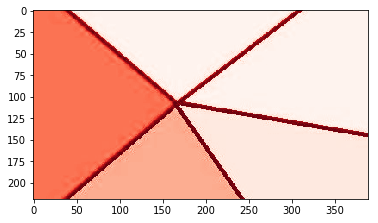

In [92]:
compressed_value_red = open("compressed_value_red.txt", "r")
new = compressed_value_red.read().split("^")
value = []
quantity = []
for i in new:
    newdata = i.split("~")
    value.append(newdata[0].split("\n"))
    quantity.append(newdata[1].split("\n"))
for i in value:
    for j in i:
        j = int(j)
for i in quantity:
    for j in i:
        j = int(j)    
        
# print("\nvalue",value)
# print("\nquanti",quantity)
compressed_value_red.close()

img_size_f = open("img_size.txt", "r")
data_size = img_size_f.read().split(" ")
row = int(data_size[0])
column = int(data_size[1])
img_size_f.close()

img_decode_red = np.zeros([row,column], dtype = int)
# print(img_decode_red)

dem = 0
for row in range(img_decode_red.shape[0]):
#     print(value[0])
#     print(quantity[0])
    temp_line = np.zeros([1,img_decode_red.shape[1]], dtype = int)
    print("len temp line", len(temp_line))
    print("ROW ", dem)
    i = 0
    num = 0
    while i < (temp_line.shape[1]):
        temp_value = value[row][num]
        print("tempvalue",temp_value)
        temp_line[0][i] = temp_value
        repeat = int(quantity[row][num])
        print("repeat",repeat)
        for j in range(i, i + repeat):
            temp_line[0][j] = temp_value
#             print(temp_value)
        i = i + repeat
        num = num + 1
#         print("i",i)

    dem = dem + 1
#     print(temp_line)
    img_decode_red[row][:] = temp_line
plt.imshow(img_decode_red, cmap= "Reds_r")

img_decode_RGB[:,:,0] = img_decode_red

## 4.4 Decode Green Filter:

len temp line 1
ROW  0
tempvalue 0
repeat 24
tempvalue 1
repeat 2
tempvalue 2
repeat 2
tempvalue 0
repeat 3
tempvalue 2
repeat 1
tempvalue 17
repeat 1
tempvalue 13
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 4
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 19
repeat 1
tempvalue 1
repeat 1
tempvalue 3
repeat 1
tempvalue 167
repeat 1
tempvalue 140
repeat 1
tempvalue 127
repeat 1
tempvalue 120
repeat 1
tempvalue 127
repeat 1
tempvalue 140
repeat 1
tempvalue 119
repeat 1
tempvalue 98
repeat 1
tempvalue 130
repeat 1
tempvalue 105
repeat 1
tempvalue 131
repeat 1
tempvalue 126
repeat 1
tempvalue 131
repeat 1
tempvalue 134
repeat 1
tempvalue 133
repeat 2
tempvalue 131
repeat 1
tempvalue 129
repeat 3
tempvalue 128
repeat 1
tempvalue 127
repeat 1
tempvalue 126
repeat 8
tempvalue 127
repeat 6
tempvalue 128
repeat 194
tempvalue 127
repeat 1
tempvalue 128
repeat 1
tempvalue 126
repeat 1
tempvalue 127
repeat 2
tempvalue 128
repeat 1
tempvalue 126
repeat 1
tempvalue 127
repeat 1
tempvalue 1

repeat 1
tempvalue 168
repeat 1
tempvalue 208
repeat 1
tempvalue 157
repeat 1
tempvalue 172
repeat 1
tempvalue 177
repeat 1
tempvalue 168
repeat 1
tempvalue 175
repeat 1
tempvalue 166
repeat 1
tempvalue 185
repeat 1
tempvalue 184
repeat 1
tempvalue 161
repeat 1
tempvalue 171
repeat 1
tempvalue 172
repeat 1
tempvalue 169
repeat 1
tempvalue 172
repeat 1
tempvalue 174
repeat 7
tempvalue 175
repeat 61
len temp line 1
ROW  7
tempvalue 0
repeat 16
tempvalue 1
repeat 2
tempvalue 2
repeat 1
tempvalue 1
repeat 5
tempvalue 0
repeat 4
tempvalue 1
repeat 2
tempvalue 0
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 11
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 5
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 2
tempvalue 7
repeat 1
tempvalue 6
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 1
tempvalue 4
repeat 1
tempvalue 1
repeat 1
tempvalue 11
repeat 1
tempvalue 16
repeat 1
tempvalue 0
repeat 1
tempvalue 19
repeat 1
tempvalue 121
repeat 1
tempvalue 142
repeat 1

repeat 1
tempvalue 136
repeat 1
tempvalue 140
repeat 1
tempvalue 125
repeat 1
tempvalue 128
repeat 4
tempvalue 127
repeat 3
tempvalue 129
repeat 2
tempvalue 128
repeat 2
tempvalue 129
repeat 1
tempvalue 128
repeat 2
tempvalue 127
repeat 1
tempvalue 128
repeat 193
tempvalue 126
repeat 3
tempvalue 127
repeat 1
tempvalue 128
repeat 1
tempvalue 129
repeat 1
tempvalue 128
repeat 2
tempvalue 125
repeat 1
tempvalue 129
repeat 1
tempvalue 131
repeat 1
tempvalue 127
repeat 1
tempvalue 129
repeat 1
tempvalue 131
repeat 1
tempvalue 137
repeat 1
tempvalue 133
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 12
repeat 1
tempvalue 0
repeat 1
tempvalue 3
repeat 2
tempvalue 0
repeat 1
tempvalue 172
repeat 1
tempvalue 189
repeat 1
tempvalue 190
repeat 1
tempvalue 149
repeat 1
tempvalue 176
repeat 1
tempvalue 167
repeat 1
tempvalue 176
repeat 1
tempvalue 169
repeat 1
tempvalue 189
repeat 1
tempvalue 175
repeat 1
tempvalue 168
repeat 1
tempvalue 183
repeat 1
tempvalue 175

tempvalue 190
repeat 1
tempvalue 157
repeat 1
tempvalue 172
repeat 1
tempvalue 177
repeat 1
tempvalue 174
repeat 1
tempvalue 176
repeat 5
tempvalue 175
repeat 1
tempvalue 174
repeat 2
tempvalue 175
repeat 85
len temp line 1
ROW  20
tempvalue 0
repeat 48
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 5
repeat 2
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 5
repeat 1
tempvalue 8
repeat 1
tempvalue 12
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 3
tempvalue 1
repeat 1
tempvalue 6
repeat 1
tempvalue 11
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 1
tempvalue 146
repeat 1
tempvalue 123
repeat 1
tempvalue 133
repeat 1
tempvalue 124
repeat 4
tempvalue 125
repeat 1
tempvalue 124
repeat 1
tempvalue 126
repeat 1
tempvalue 128
repeat 1
tempvalue 130
repeat 2
tempvalue 132
repeat 1
tempvalue 130
repeat 1
tempvalue 127
repeat 1
tempvalue 126
repeat 1
tempvalue 128
repeat 2
tempvalue 127
repeat 1
tempvalue 129
repeat 3
tempvalue 130
repe

tempvalue 128
repeat 159
tempvalue 127
repeat 1
tempvalue 119
repeat 1
tempvalue 123
repeat 1
tempvalue 129
repeat 1
tempvalue 123
repeat 1
tempvalue 125
repeat 1
tempvalue 141
repeat 1
tempvalue 145
repeat 1
tempvalue 126
repeat 1
tempvalue 146
repeat 1
tempvalue 127
repeat 1
tempvalue 143
repeat 1
tempvalue 102
repeat 1
tempvalue 134
repeat 2
tempvalue 147
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 2
tempvalue 5
repeat 1
tempvalue 0
repeat 2
tempvalue 9
repeat 1
tempvalue 2
repeat 1
tempvalue 197
repeat 1
tempvalue 180
repeat 1
tempvalue 189
repeat 1
tempvalue 175
repeat 1
tempvalue 172
repeat 1
tempvalue 159
repeat 1
tempvalue 184
repeat 1
tempvalue 182
repeat 1
tempvalue 175
repeat 1
tempvalue 181
repeat 1
tempvalue 179
repeat 1
tempvalue 177
repeat 1
tempvalue 175
repeat 1
tempvalue 173
repeat 3
tempvalue 174
repeat 1
tempvalue 173
repeat 3
tempvalue 174
repeat 2
tempvalue 176
repeat 3
tempvalue 175
repeat 85
len temp line 1
ROW  27
tempvalue 0
repeat 54
tempvalue 1
repeat 1

repeat 1
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 176
repeat 1
tempvalue 180
repeat 1
tempvalue 191
repeat 1
tempvalue 175
repeat 1
tempvalue 190
repeat 1
tempvalue 178
repeat 1
tempvalue 163
repeat 1
tempvalue 181
repeat 1
tempvalue 173
repeat 1
tempvalue 175
repeat 1
tempvalue 174
repeat 2
tempvalue 175
repeat 1
tempvalue 174
repeat 7
tempvalue 175
repeat 2
tempvalue 176
repeat 1
tempvalue 175
repeat 95
len temp line 1
ROW  33
tempvalue 0
repeat 64
tempvalue 1
repeat 1
tempvalue 0
repeat 6
tempvalue 1
repeat 1
tempvalue 11
repeat 2
tempvalue 9
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 3
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 18
repeat 1
tempvalue 0
repeat 1
tempvalue 142
repeat 1
tempvalue 141
repeat 1
tempvalue 121
repeat 1
tempvalue 149
repeat 1
tempvalue 124
repeat 1
tempvalue 125
repeat 1
tempvalue 113
repeat 1
tempvalue 135
repeat 1
tempvalue 126
repeat 1
tempvalue 124
repeat 2
tempvalue 126
repeat 1
tempvalue 128
repeat 1
tempvalue 131
repeat 1
te

repeat 101
len temp line 1
ROW  39
tempvalue 0
repeat 66
tempvalue 1
repeat 1
tempvalue 2
repeat 3
tempvalue 1
repeat 2
tempvalue 0
repeat 2
tempvalue 1
repeat 1
tempvalue 5
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 2
tempvalue 10
repeat 1
tempvalue 15
repeat 1
tempvalue 0
repeat 4
tempvalue 1
repeat 1
tempvalue 9
repeat 2
tempvalue 0
repeat 2
tempvalue 135
repeat 1
tempvalue 139
repeat 1
tempvalue 133
repeat 1
tempvalue 114
repeat 1
tempvalue 130
repeat 1
tempvalue 120
repeat 1
tempvalue 122
repeat 1
tempvalue 125
repeat 1
tempvalue 134
repeat 1
tempvalue 128
repeat 1
tempvalue 126
repeat 1
tempvalue 130
repeat 1
tempvalue 126
repeat 1
tempvalue 130
repeat 1
tempvalue 127
repeat 1
tempvalue 125
repeat 1
tempvalue 124
repeat 3
tempvalue 126
repeat 1
tempvalue 127
repeat 2
tempvalue 128
repeat 128
tempvalue 125
repeat 1
tempvalue 127
repeat 1
tempvalue 129
repeat 1
tempvalue 132
repeat 2
tempvalue 133
repeat 3
tempvalue 125
repeat 2
tempvalue 137
repeat 1
tempvalue 115
repeat 1
t

tempvalue 128
repeat 4
tempvalue 127
repeat 1
tempvalue 129
repeat 1
tempvalue 125
repeat 1
tempvalue 130
repeat 1
tempvalue 125
repeat 1
tempvalue 129
repeat 1
tempvalue 125
repeat 1
tempvalue 133
repeat 1
tempvalue 118
repeat 1
tempvalue 131
repeat 1
tempvalue 126
repeat 1
tempvalue 106
repeat 1
tempvalue 139
repeat 1
tempvalue 149
repeat 1
tempvalue 98
repeat 1
tempvalue 0
repeat 3
tempvalue 4
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 3
tempvalue 191
repeat 1
tempvalue 183
repeat 1
tempvalue 165
repeat 1
tempvalue 195
repeat 1
tempvalue 155
repeat 1
tempvalue 167
repeat 1
tempvalue 173
repeat 1
tempvalue 170
repeat 1
tempvalue 183
repeat 1
tempvalue 175
repeat 1
tempvalue 177
repeat 1
tempvalue 178
repeat 1
tempvalue 177
repeat 2
tempvalue 175
repeat 1
tempvalue 173
repeat 1
tempvalue 172
repeat 2
tempvalue 174
repeat 1
tempvalue 175
repeat 7
tempvalue 176
repeat 2
tempvalue 175
repeat 107
len temp line 1
ROW  46
tempvalue 0
repeat 64
tempvalue 1
repeat 3
tempvalue 0
repeat 1

tempvalue 118
repeat 1
tempvalue 134
repeat 2
tempvalue 128
repeat 1
tempvalue 5
repeat 1
tempvalue 8
repeat 1
tempvalue 2
repeat 1
tempvalue 9
repeat 1
tempvalue 3
repeat 1
tempvalue 1
repeat 1
tempvalue 21
repeat 1
tempvalue 3
repeat 1
tempvalue 183
repeat 1
tempvalue 200
repeat 1
tempvalue 195
repeat 1
tempvalue 161
repeat 1
tempvalue 158
repeat 1
tempvalue 163
repeat 1
tempvalue 171
repeat 1
tempvalue 174
repeat 1
tempvalue 176
repeat 1
tempvalue 169
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 7
tempvalue 175
repeat 125
len temp line 1
ROW  52
tempvalue 0
repeat 83
tempvalue 2
repeat 3
tempvalue 0
repeat 2
tempvalue 3
repeat 1
tempvalue 2
repeat 2
tempvalue 4
repeat 2
tempvalue 3
repeat 1
tempvalue 5
repeat 1
tempvalue 11
repeat 2
tempvalue 3
repeat 1
tempvalue 13
repeat 1
tempvalue 4
repeat 1
tempvalue 5
repeat 1
tempvalue 7
repeat 1
tempvalue 15
repeat 1
tempvalue 0
repeat 2
tempvalue 165
repeat 1
tempvalue 133
repeat 1
tempvalue 137
repeat 1
tempvalue 138
repeat 1
tempv

repeat 2
tempvalue 175
repeat 6
tempvalue 174
repeat 2
tempvalue 175
repeat 125
len temp line 1
ROW  58
tempvalue 0
repeat 87
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 5
repeat 1
tempvalue 6
repeat 4
tempvalue 4
repeat 1
tempvalue 0
repeat 4
tempvalue 6
repeat 1
tempvalue 14
repeat 1
tempvalue 10
repeat 1
tempvalue 2
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 2
tempvalue 2
repeat 1
tempvalue 27
repeat 1
tempvalue 0
repeat 3
tempvalue 143
repeat 1
tempvalue 130
repeat 1
tempvalue 135
repeat 1
tempvalue 118
repeat 1
tempvalue 115
repeat 1
tempvalue 128
repeat 1
tempvalue 120
repeat 1
tempvalue 129
repeat 2
tempvalue 131
repeat 1
tempvalue 133
repeat 1
tempvalue 134
repeat 1
tempvalue 130
repeat 1
tempvalue 126
repeat 1
tempvalue 124
repeat 1
tempvalue 125
repeat 1
tempvalue 127
repeat 1
tempvalue 128
repeat 72
tempvalue 127
repeat 2
tempvalue 128
repeat 2
tempvalue 127
repeat 2
tempvalue 128
repeat 1
tempvalue 127
repeat 1
tempvalue 126
repeat 1
tempv

repeat 1
tempvalue 128
repeat 1
tempvalue 133
repeat 1
tempvalue 130
repeat 1
tempvalue 127
repeat 1
tempvalue 129
repeat 1
tempvalue 128
repeat 1
tempvalue 130
repeat 1
tempvalue 129
repeat 1
tempvalue 125
repeat 1
tempvalue 130
repeat 1
tempvalue 128
repeat 1
tempvalue 129
repeat 3
tempvalue 127
repeat 1
tempvalue 126
repeat 1
tempvalue 125
repeat 1
tempvalue 126
repeat 1
tempvalue 128
repeat 1
tempvalue 129
repeat 3
tempvalue 128
repeat 8
tempvalue 127
repeat 4
tempvalue 128
repeat 34
tempvalue 127
repeat 1
tempvalue 128
repeat 1
tempvalue 127
repeat 5
tempvalue 126
repeat 1
tempvalue 130
repeat 1
tempvalue 127
repeat 1
tempvalue 130
repeat 1
tempvalue 131
repeat 1
tempvalue 119
repeat 1
tempvalue 130
repeat 1
tempvalue 135
repeat 1
tempvalue 140
repeat 1
tempvalue 128
repeat 1
tempvalue 127
repeat 1
tempvalue 115
repeat 1
tempvalue 123
repeat 1
tempvalue 122
repeat 1
tempvalue 117
repeat 1
tempvalue 124
repeat 1
tempvalue 114
repeat 1
tempvalue 125
repeat 1
tempvalue 148
repeat 1
t

tempvalue 128
repeat 1
tempvalue 129
repeat 4
tempvalue 128
repeat 42
tempvalue 129
repeat 1
tempvalue 128
repeat 1
tempvalue 126
repeat 1
tempvalue 127
repeat 1
tempvalue 130
repeat 2
tempvalue 129
repeat 1
tempvalue 126
repeat 1
tempvalue 125
repeat 1
tempvalue 124
repeat 1
tempvalue 121
repeat 1
tempvalue 129
repeat 1
tempvalue 136
repeat 1
tempvalue 131
repeat 2
tempvalue 132
repeat 1
tempvalue 122
repeat 1
tempvalue 117
repeat 1
tempvalue 120
repeat 1
tempvalue 133
repeat 1
tempvalue 122
repeat 1
tempvalue 156
repeat 1
tempvalue 123
repeat 1
tempvalue 15
repeat 1
tempvalue 5
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 3
tempvalue 192
repeat 1
tempvalue 179
repeat 1
tempvalue 193
repeat 1
tempvalue 172
repeat 1
tempvalue 173
repeat 1
tempvalue 179
repeat 1
tempvalue 174
repeat 1
tempvalue 170
repeat 1
tempvalue 180
repeat 1
tempvalue 181
repeat 1
tempvalue 174
repeat 1
tempvalue 175
repeat 157
len temp line 1
ROW  71
tempvalue 0
repeat

tempvalue 178
repeat 1
tempvalue 177
repeat 1
tempvalue 176
repeat 1
tempvalue 174
repeat 1
tempvalue 173
repeat 3
tempvalue 174
repeat 1
tempvalue 175
repeat 1
tempvalue 176
repeat 2
tempvalue 175
repeat 149
len temp line 1
ROW  77
tempvalue 0
repeat 101
tempvalue 1
repeat 1
tempvalue 0
repeat 2
tempvalue 1
repeat 1
tempvalue 0
repeat 4
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 1
repeat 3
tempvalue 3
repeat 3
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 9
repeat 1
tempvalue 21
repeat 1
tempvalue 16
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 1
tempvalue 18
repeat 1
tempvalue 0
repeat 2
tempvalue 35
repeat 1
tempvalue 99
repeat 1
tempvalue 154
repeat 1
tempvalue 128
repeat 1
tempvalue 121
repeat 1
tempvalue 136
repeat 1
tempvalue 134
repeat 1
tempvalue 119
repeat 1
tempvalue 128
repeat 2
tempvalue 127
repeat 1
tempvalue 130
repeat 1
tempva

repeat 1
tempvalue 128
repeat 1
tempvalue 127
repeat 1
tempvalue 128
repeat 5
tempvalue 129
repeat 1
tempvalue 128
repeat 3
tempvalue 127
repeat 1
tempvalue 126
repeat 2
tempvalue 128
repeat 1
tempvalue 131
repeat 1
tempvalue 127
repeat 1
tempvalue 134
repeat 1
tempvalue 135
repeat 1
tempvalue 127
repeat 1
tempvalue 135
repeat 1
tempvalue 136
repeat 1
tempvalue 118
repeat 1
tempvalue 111
repeat 1
tempvalue 138
repeat 1
tempvalue 97
repeat 1
tempvalue 132
repeat 1
tempvalue 152
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 2
tempvalue 15
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 4
tempvalue 182
repeat 1
tempvalue 178
repeat 1
tempvalue 174
repeat 1
tempvalue 180
repeat 1
tempvalue 147
repeat 1
tempvalue 193
repeat 1
tempvalue 168
repeat 1
tempvalue 167
repeat 1
tempvalue 176
repeat 1
tempvalue 173
repeat 1
tempvalue 175
repeat 2
tempvalue 176
repeat 2
tempvalue 175
repeat 169
len temp line 1
ROW  83
tempvalue 0
repeat 118
tempvalue 1
repeat 2
tempvalue 0
repeat 1
tempvalue 1
r

repeat 1
tempvalue 112
repeat 1
tempvalue 120
repeat 1
tempvalue 145
repeat 1
tempvalue 121
repeat 1
tempvalue 8
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 2
tempvalue 14
repeat 1
tempvalue 0
repeat 2
tempvalue 7
repeat 1
tempvalue 0
repeat 1
tempvalue 167
repeat 1
tempvalue 193
repeat 1
tempvalue 172
repeat 1
tempvalue 158
repeat 1
tempvalue 182
repeat 1
tempvalue 169
repeat 1
tempvalue 166
repeat 1
tempvalue 176
repeat 1
tempvalue 178
repeat 1
tempvalue 180
repeat 1
tempvalue 177
repeat 1
tempvalue 176
repeat 3
tempvalue 174
repeat 1
tempvalue 173
repeat 2
tempvalue 174
repeat 2
tempvalue 175
repeat 3
tempvalue 174
repeat 4
tempvalue 175
repeat 165
len temp line 1
ROW  89
tempvalue 0
repeat 112
tempvalue 1
repeat 1
tempvalue 0
repeat 5
tempvalue 1
repeat 4
tempvalue 0
repeat 4
tempvalue 1
repeat 2
tempvalue 0
repeat 2
tempvalue 1
repeat 1
tempvalue 2
repeat 2
tempvalue 3
repeat 1
tempvalue 2
repeat 2
tempvalue 0
repeat 1
tempvalue 4
repeat 1
tempvalue 9
repeat 1
tempvalue 12
re

tempvalue 130
repeat 1
tempvalue 121
repeat 1
tempvalue 133
repeat 1
tempvalue 136
repeat 1
tempvalue 126
repeat 1
tempvalue 147
repeat 1
tempvalue 115
repeat 1
tempvalue 10
repeat 1
tempvalue 0
repeat 2
tempvalue 1
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 182
repeat 1
tempvalue 177
repeat 1
tempvalue 193
repeat 1
tempvalue 162
repeat 1
tempvalue 177
repeat 1
tempvalue 168
repeat 1
tempvalue 166
repeat 1
tempvalue 179
repeat 1
tempvalue 180
repeat 1
tempvalue 175
repeat 1
tempvalue 186
repeat 1
tempvalue 167
repeat 1
tempvalue 166
repeat 1
tempvalue 170
repeat 1
tempvalue 155
repeat 1
tempvalue 168
repeat 1
tempvalue 176
repeat 1
tempvalue 175
repeat 3
tempvalue 174
repeat 2
tempvalue 172
repeat 3
tempvalue 173
repeat 1
tempvalue 175
repeat 1
tempvalue 176
repeat 6
tempvalue 175
repeat 166
len temp line 1
ROW  95
tempvalue 0
repeat 114
tempvalue 1
repeat 2
tempvalue 0
repeat 4
tempvalue 1
repeat 3
tempva

tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 10
repeat 1
tempvalue 19
repeat 1
tempvalue 0
repeat 1
tempvalue 14
repeat 1
tempvalue 15
repeat 1
tempvalue 2
repeat 1
tempvalue 17
repeat 1
tempvalue 0
repeat 3
tempvalue 2
repeat 1
tempvalue 12
repeat 1
tempvalue 4
repeat 2
tempvalue 0
repeat 1
tempvalue 137
repeat 1
tempvalue 134
repeat 1
tempvalue 124
repeat 1
tempvalue 134
repeat 1
tempvalue 142
repeat 1
tempvalue 135
repeat 1
tempvalue 122
repeat 1
tempvalue 22
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 2
tempvalue 16
repeat 1
tempvalue 0
repeat 1
tempvalue 15
repeat 1
tempvalue 1
repeat 1
tempvalue 185
repeat 1
tempvalue 184
repeat 1
tempvalue 183
repeat 1
tempvalue 174
repeat 1
tempvalue 172
repeat 1
tempvalue 178
repeat 1
tempvalue 160
repeat 1
tempvalue 176
repeat 1
tempvalue 166
repeat 1
tempvalue 163
repeat 1
tempvalue 179
repeat 1
tempvalue 171
repeat 1
tempvalue 167
repeat 1
tempvalue 172
repeat 1
tempvalue 173
repeat 2
tempvalue 174
repeat 3
tempvalue 175
repeat 

repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 14
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 10
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 20
repeat 1
tempvalue 0
repeat 2
tempvalue 5
repeat 1
tempvalue 0
repeat 6
tempvalue 3
repeat 1
tempvalue 0
repeat 2
tempvalue 6
repeat 1
tempvalue 0
repeat 1
tempvalue 179
repeat 1
tempvalue 190
repeat 1
tempvalue 171
repeat 1
tempvalue 203
repeat 1
tempvalue 182
repeat 1
tempvalue 175
repeat 1
tempvalue 202
repeat 1
tempvalue 169
repeat 1
tempvalue 179
repeat 1
tempvalue 195
repeat 1
tempvalue 182
repeat 1
tempvalue 187
repeat 1
tempvalue 170
repeat 1
tempvalue 174
repeat 1
tempvalue 169
repeat 2
tempvalue 170
repeat 1
tempvalue 176
repeat 1
tempvalue 177
repeat 2
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 172
repeat 1
tempvalue 177
repeat 1
tempvalue 175
repeat 1
tempvalue 177
repeat 1
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 173
repeat 1
tempvalue 

repeat 1
tempvalue 174
repeat 1
tempvalue 169
repeat 1
tempvalue 174
repeat 1
tempvalue 172
repeat 1
tempvalue 176
repeat 1
tempvalue 171
repeat 1
tempvalue 175
repeat 2
tempvalue 174
repeat 3
tempvalue 175
repeat 1
tempvalue 176
repeat 1
tempvalue 175
repeat 2
tempvalue 174
repeat 3
tempvalue 175
repeat 1
tempvalue 174
repeat 3
tempvalue 175
repeat 2
tempvalue 176
repeat 1
tempvalue 175
repeat 28
tempvalue 174
repeat 1
tempvalue 175
repeat 54
len temp line 1
ROW  113
tempvalue 0
repeat 128
tempvalue 1
repeat 3
tempvalue 0
repeat 2
tempvalue 1
repeat 2
tempvalue 2
repeat 2
tempvalue 3
repeat 1
tempvalue 2
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 9
tempvalue 1
repeat 1
tempvalue 3
repeat 2
tempvalue 0
repeat 2
tempvalue 14
repeat 1
tempvalue 10
repeat 1
tempvalue 24
repeat 1
tempvalue 20
repeat 1
tempvalue 0
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 5
repeat 1
tempvalue 23
repeat 1
tempvalue 7
repeat 1
tempvalue 17
repeat 1
tempvalue 12
repeat 1
tempvalue 9
r

tempvalue 3
repeat 1
tempvalue 4
repeat 2
tempvalue 8
repeat 1
tempvalue 0
repeat 3
tempvalue 4
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 12
repeat 1
tempvalue 0
repeat 2
tempvalue 8
repeat 1
tempvalue 5
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 7
tempvalue 6
repeat 1
tempvalue 0
repeat 1
tempvalue 8
repeat 1
tempvalue 191
repeat 1
tempvalue 198
repeat 1
tempvalue 196
repeat 1
tempvalue 171
repeat 1
tempvalue 186
repeat 1
tempvalue 177
repeat 1
tempvalue 186
repeat 1
tempvalue 177
repeat 1
tempvalue 191
repeat 1
tempvalue 203
repeat 1
tempvalue 198
repeat 1
tempvalue 197
repeat 1
tempvalue 166
repeat 1
tempvalue 180
repeat 1
tempvalue 166
repeat 1
tempvalue 185
repeat 1
tempvalue 175
repeat 1
tempvalue 170
repeat 1
tempvalue 171
repeat 2
tempvalue 177
repeat 1
tempvalue 168
repeat 1
tempvalue 170
repeat 1
tempvalue 175
repeat 1
tempvalue 168
repeat 1
tempvalue 169
repeat 2
tempvalue 171
repeat 1
tempvalue 166
repeat 1
tempvalue 172
repeat 1
tempvalue 167
repea

tempvalue 171
repeat 1
tempvalue 172
repeat 1
tempvalue 174
repeat 2
tempvalue 172
repeat 1
tempvalue 169
repeat 1
tempvalue 180
repeat 1
tempvalue 178
repeat 1
tempvalue 175
repeat 1
tempvalue 172
repeat 1
tempvalue 171
repeat 1
tempvalue 172
repeat 1
tempvalue 174
repeat 1
tempvalue 175
repeat 2
tempvalue 174
repeat 5
tempvalue 175
repeat 42
tempvalue 174
repeat 2
tempvalue 175
repeat 10
tempvalue 176
repeat 4
tempvalue 175
repeat 21
len temp line 1
ROW  120
tempvalue 0
repeat 129
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 3
tempvalue 0
repeat 3
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 9
repeat 1
tempvalue 6
repeat 1
tempvalue 8
repeat 1
tempvalue 5
repeat 1
tempvalue 18
repeat 1
tempvalue 20
repeat 1
tempvalue 17
repeat 1
tempvalue 0
repeat 3
tempvalue 5
repeat 2
tempvalue 14
repeat 1
tempvalue 20
repeat 1
tempvalue 228
repeat 1
tempvalue 180
repeat 1
tempvalue 230
repeat 1
tempvalue 215
repe

repeat 1
tempvalue 173
repeat 1
tempvalue 183
repeat 1
tempvalue 180
repeat 1
tempvalue 177
repeat 1
tempvalue 166
repeat 1
tempvalue 190
repeat 1
tempvalue 179
repeat 1
tempvalue 184
repeat 1
tempvalue 175
repeat 1
tempvalue 180
repeat 1
tempvalue 194
repeat 1
tempvalue 171
repeat 1
tempvalue 185
repeat 1
tempvalue 151
repeat 1
tempvalue 163
repeat 1
tempvalue 168
repeat 1
tempvalue 182
repeat 1
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 174
repeat 1
tempvalue 172
repeat 1
tempvalue 176
repeat 2
tempvalue 175
repeat 2
tempvalue 172
repeat 1
tempvalue 175
repeat 1
tempvalue 176
repeat 1
tempvalue 174
repeat 3
tempvalue 175
repeat 4
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 175
repeat 1
tempvalue 174
repeat 1
tempvalue 177
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 2
tempvalue 175
repeat 6
tempvalue 174
repeat 1
tempvalue 175
repeat 1
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 174
repeat 1
te

repeat 1
tempvalue 0
repeat 2
tempvalue 3
repeat 1
tempvalue 9
repeat 1
tempvalue 12
repeat 1
tempvalue 0
repeat 3
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 4
repeat 2
tempvalue 8
repeat 1
tempvalue 5
repeat 1
tempvalue 8
repeat 1
tempvalue 0
repeat 2
tempvalue 12
repeat 1
tempvalue 147
repeat 1
tempvalue 179
repeat 1
tempvalue 188
repeat 1
tempvalue 177
repeat 1
tempvalue 195
repeat 1
tempvalue 145
repeat 1
tempvalue 203
repeat 1
tempvalue 183
repeat 1
tempvalue 160
repeat 1
tempvalue 181
repeat 1
tempvalue 186
repeat 1
tempvalue 166
repeat 1
tempvalue 171
repeat 1
tempvalue 176
repeat 1
tempvalue 175
repeat 1
tempvalue 178
repeat 1
tempvalue 174
repeat 1
tempvalue 176
repeat 1
tempvalue 177
repeat 1
tempvalue 176
repeat 1
tempvalue 179
repeat 1
tempvalue 174
repeat 4
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 175
repeat 2
tempvalue 174
repeat 1
tempvalue 176
repeat 1
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 174
repeat 2
tempv

tempvalue 228
repeat 2
tempvalue 227
repeat 2
tempvalue 226
repeat 2
tempvalue 227
repeat 9
tempvalue 228
repeat 1
tempvalue 227
repeat 8
tempvalue 228
repeat 2
tempvalue 227
repeat 1
tempvalue 228
repeat 1
tempvalue 227
repeat 1
tempvalue 228
repeat 13
tempvalue 227
repeat 10
tempvalue 228
repeat 3
tempvalue 227
repeat 1
tempvalue 226
repeat 3
tempvalue 227
repeat 5
tempvalue 226
repeat 2
tempvalue 230
repeat 1
tempvalue 227
repeat 1
tempvalue 224
repeat 1
tempvalue 225
repeat 1
tempvalue 213
repeat 1
tempvalue 254
repeat 1
tempvalue 201
repeat 1
tempvalue 225
repeat 1
tempvalue 230
repeat 1
tempvalue 217
repeat 1
tempvalue 222
repeat 1
tempvalue 229
repeat 1
tempvalue 1
repeat 1
tempvalue 12
repeat 1
tempvalue 21
repeat 1
tempvalue 0
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 1
tempvalue 7
repeat 1
tempvalue 1
repeat 2
tempvalue 0
repeat 2
tempvalue 3
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 2
tempvalue 13
repeat 1
tempvalue 0
repeat 1
tempvalue 7
repeat 1
tempvalue 0
r

tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 25
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 3
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 21
repeat 1
tempvalue 19
repeat 1
tempvalue 30
repeat 1
tempvalue 218
repeat 1
tempvalue 247
repeat 1
tempvalue 215
repeat 1
tempvalue 233
repeat 1
tempvalue 210
repeat 1
tempvalue 230
repeat 1
tempvalue 223
repeat 1
tempvalue 230
repeat 2
tempvalue 229
repeat 3
tempvalue 230
repeat 1
tempvalue 231
repeat 3
tempvalue 230
repeat 3
tempvalue 231
repeat 1
tempvalue 232
repeat 1
tempvalue 233
repeat 3
tempvalue 231
repeat 1
tempvalue 230
repeat 1
tempvalue 228
repeat 2
tempvalue 227
repeat 1
tempvalue 222
repeat 1
tempvalue 215
repeat 1
tempvalue 241
repeat 1
tempvalue 189
repeat 1
tempvalue 28
repeat 1
tempvalue 30
repeat 1
tempvalue 7
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 2
tempvalue 227
repeat 1
tempvalue 237
repeat 1
tempvalue 222
repeat 1
tempvalue 212
repeat 1
tempvalue 222
repeat 1
tempvalue 235
repeat 1
tempvalue 22

repeat 1
tempvalue 171
repeat 1
tempvalue 178
repeat 1
tempvalue 174
repeat 1
tempvalue 175
repeat 1
tempvalue 174
repeat 1
tempvalue 173
repeat 2
tempvalue 174
repeat 2
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 171
repeat 1
tempvalue 175
repeat 1
tempvalue 172
repeat 1
tempvalue 175
repeat 1
tempvalue 172
repeat 1
tempvalue 174
repeat 1
tempvalue 167
repeat 1
tempvalue 176
repeat 1
tempvalue 173
repeat 1
tempvalue 169
repeat 1
tempvalue 175
repeat 1
tempvalue 172
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 3
tempvalue 175
repeat 2
len temp line 1
ROW  134
tempvalue 0
repeat 112
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 4
tempvalue 1
repeat 2
tempvalue 0
repeat 3
tempvalue 1
repeat 3
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 14
repeat 1
tempvalue 15
repeat 1
tempvalue 10
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 3
tempvalue 10
repeat 1
tempvalue 2
repeat 1
tempv

repeat 1
tempvalue 226
repeat 1
tempvalue 225
repeat 1
tempvalue 224
repeat 1
tempvalue 223
repeat 1
tempvalue 222
repeat 1
tempvalue 223
repeat 2
tempvalue 224
repeat 3
tempvalue 226
repeat 1
tempvalue 223
repeat 1
tempvalue 224
repeat 1
tempvalue 228
repeat 2
tempvalue 226
repeat 1
tempvalue 225
repeat 1
tempvalue 226
repeat 1
tempvalue 227
repeat 1
tempvalue 218
repeat 1
tempvalue 251
repeat 1
tempvalue 180
repeat 1
tempvalue 21
repeat 1
tempvalue 18
repeat 1
tempvalue 4
repeat 2
tempvalue 3
repeat 1
tempvalue 22
repeat 1
tempvalue 3
repeat 2
tempvalue 17
repeat 1
tempvalue 4
repeat 1
tempvalue 6
repeat 1
tempvalue 11
repeat 1
tempvalue 4
repeat 1
tempvalue 9
repeat 1
tempvalue 6
repeat 2
tempvalue 5
repeat 1
tempvalue 7
repeat 1
tempvalue 8
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 2
tempvalue 7
repeat 1
tempvalue 13
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 5
tempvalue 203
repeat 1
tempvalue 201
repeat 1
tempvalue 183
repeat 1
tempvalue 189
repeat 1
tempvalue 203
rep

tempvalue 247
repeat 1
tempvalue 208
repeat 1
tempvalue 227
repeat 1
tempvalue 219
repeat 1
tempvalue 220
repeat 2
tempvalue 237
repeat 1
tempvalue 1
repeat 1
tempvalue 9
repeat 2
tempvalue 14
repeat 1
tempvalue 3
repeat 1
tempvalue 9
repeat 1
tempvalue 10
repeat 1
tempvalue 4
repeat 2
tempvalue 9
repeat 1
tempvalue 4
repeat 1
tempvalue 3
repeat 1
tempvalue 12
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 8
tempvalue 2
repeat 1
tempvalue 0
repeat 5
tempvalue 3
repeat 1
tempvalue 155
repeat 1
tempvalue 208
repeat 1
tempvalue 171
repeat 1
tempvalue 190
repeat 1
tempvalue 199
repeat 1
tempvalue 173
repeat 1
tempvalue 200
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 185
repeat 1
tempvalue 180
repeat 1
tempvalue 183
repeat 1
tempvalue 167
repeat 1
tempvalue 172
repeat 1
tempvalue 186
repeat 1
tempvalue 184
repeat 1
tempvalue 166
repeat 1
len temp line 1
ROW  140
tempvalue 0
repeat 105
tempvalue 1
repeat 8
tempvalue 0
repeat 5
tempvalue 1
repeat 1


tempvalue 5
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 3
len temp line 1
ROW  143
tempvalue 0
repeat 104
tempvalue 1
repeat 3
tempvalue 0
repeat 4
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 4
repeat 3
tempvalue 3
repeat 1
tempvalue 2
repeat 1
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 8
repeat 1
tempvalue 21
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 3
tempvalue 5
repeat 1
tempvalue 21
repeat 1
tempvalue 16
repeat 1
tempvalue 29
repeat 1
tempvalue 26
repeat 1
tempvalue 216
repeat 1
tempvalue 234
repeat 1
tempvalue 209
repeat 1
tempvalue 226
repeat 1
tempvalue 229
repeat 1
tempvalue 230
repeat 1
tempvalue 227
repeat 2
tempvalue 225
repeat 1
tempvalue 228
repeat 1
tempvalue 231
repeat 1
tempvalue 234
repeat 1
tempvalue 232
repeat 1
tempvalue 230
repeat 2
tempvalue 231
repeat 1
tempvalue 232
repeat 4
tempvalue 231
repeat 2
tempvalue 230
repeat 1
tempvalue 229
repeat 3
tempvalue 230
repeat 3
tempvalue 231
repeat 1
tempvalue 230
repeat 1
tempvalue 229
repeat 2


repeat 1
tempvalue 5
repeat 1
tempvalue 3
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 5
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 8
repeat 1
tempvalue 13
repeat 1
tempvalue 16
repeat 1
tempvalue 9
repeat 1
tempvalue 0
repeat 1
tempvalue 12
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 17
repeat 1
tempvalue 15
repeat 1
tempvalue 26
repeat 2
tempvalue 199
repeat 1
tempvalue 212
repeat 1
tempvalue 243
repeat 1
tempvalue 218
repeat 1
tempvalue 241
repeat 1
tempvalue 230
repeat 1
tempvalue 228
repeat 1
tempvalue 237
repeat 2
tempvalue 227
repeat 1
tempvalue 229
repeat 1
tempvalue 228
repeat 1
tempvalue 229
repeat 2
tempvalue 230
repeat 2
tempvalue 231
repeat 2
tempvalue 230
repeat 32
tempvalue 226
repeat 1
tempvalue 233
repeat 1
tempvalue 229
repeat 1
tempvalue 228
repeat 1
tempvalue 234
repeat 1
tempvalue 228
repeat 1
tempvalue 218
repeat 1
tempvalue 225
repeat 1
tempvalue 229
repeat 1
tempvalue 236
repeat 1
tempvalue 251
repeat 1
tempvalue 208
repeat 2
tempva

repeat 1
tempvalue 226
repeat 2
tempvalue 228
repeat 2
tempvalue 227
repeat 2
tempvalue 228
repeat 1
tempvalue 227
repeat 146
tempvalue 226
repeat 2
tempvalue 227
repeat 4
tempvalue 226
repeat 2
tempvalue 227
repeat 4
tempvalue 228
repeat 4
tempvalue 226
repeat 4
tempvalue 225
repeat 2
tempvalue 226
repeat 1
tempvalue 227
repeat 1
tempvalue 226
repeat 1
tempvalue 227
repeat 1
tempvalue 226
repeat 1
len temp line 1
ROW  154
tempvalue 0
repeat 98
tempvalue 1
repeat 6
tempvalue 0
repeat 2
tempvalue 1
repeat 1
tempvalue 7
repeat 1
tempvalue 14
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 3
repeat 1
tempvalue 8
repeat 1
tempvalue 29
repeat 1
tempvalue 20
repeat 1
tempvalue 32
repeat 1
tempvalue 198
repeat 1
tempvalue 211
repeat 1
tempvalue 227
repeat 1
tempvalue 208
repeat 1
tempvalue 201
repeat 1
tempvalue 250
repeat 1
tempvalue 232
repeat 1
tempvalue 214
repeat 1
tempvalue 236
repeat 2
tempvalue 232
repeat 1
tempvalue 231
repeat 1
tempvalue 229
repeat 5
tempvalue 230
repea

tempvalue 226
repeat 1
tempvalue 228
repeat 2
tempvalue 227
repeat 3
tempvalue 228
repeat 3
tempvalue 227
repeat 128
tempvalue 228
repeat 6
tempvalue 226
repeat 6
tempvalue 225
repeat 1
tempvalue 226
repeat 3
tempvalue 225
repeat 2
tempvalue 226
repeat 2
tempvalue 227
repeat 2
tempvalue 228
repeat 3
tempvalue 229
repeat 1
tempvalue 228
repeat 1
tempvalue 229
repeat 1
tempvalue 228
repeat 1
tempvalue 229
repeat 1
tempvalue 228
repeat 1
tempvalue 229
repeat 6
len temp line 1
ROW  160
tempvalue 0
repeat 80
tempvalue 2
repeat 2
tempvalue 1
repeat 1
tempvalue 0
repeat 3
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 3
tempvalue 2
repeat 3
tempvalue 0
repeat 1
tempvalue 3
repeat 1
tempvalue 14
repeat 1
tempvalue 18
repeat 1
tempvalue 34
repeat 1
tempvalue 0
repeat 2
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 32
repeat 1
tempvalue 23
repeat 1
tempvalue 21
repeat 1
tempvalue 28
repeat 1
tempvalue 214
repeat 1

tempvalue 230
repeat 1
tempvalue 224
repeat 1
tempvalue 223
repeat 1
tempvalue 228
repeat 1
tempvalue 231
repeat 1
tempvalue 226
repeat 1
tempvalue 224
repeat 1
tempvalue 228
repeat 1
tempvalue 226
repeat 1
tempvalue 227
repeat 164
len temp line 1
ROW  167
tempvalue 0
repeat 80
tempvalue 1
repeat 3
tempvalue 0
repeat 2
tempvalue 1
repeat 4
tempvalue 0
repeat 1
tempvalue 9
repeat 1
tempvalue 8
repeat 1
tempvalue 6
repeat 1
tempvalue 25
repeat 1
tempvalue 23
repeat 1
tempvalue 0
repeat 3
tempvalue 9
repeat 1
tempvalue 10
repeat 1
tempvalue 13
repeat 1
tempvalue 28
repeat 1
tempvalue 36
repeat 1
tempvalue 197
repeat 1
tempvalue 239
repeat 1
tempvalue 217
repeat 1
tempvalue 230
repeat 1
tempvalue 229
repeat 1
tempvalue 237
repeat 1
tempvalue 238
repeat 1
tempvalue 232
repeat 1
tempvalue 233
repeat 1
tempvalue 227
repeat 1
tempvalue 233
repeat 1
tempvalue 226
repeat 1
tempvalue 224
repeat 1
tempvalue 237
repeat 1
tempvalue 227
repeat 1
tempvalue 226
repeat 1
tempvalue 229
repeat 1
tempvalue

repeat 1
tempvalue 228
repeat 1
tempvalue 224
repeat 1
tempvalue 226
repeat 1
tempvalue 227
repeat 2
tempvalue 228
repeat 2
tempvalue 227
repeat 2
tempvalue 226
repeat 4
tempvalue 227
repeat 154
len temp line 1
ROW  176
tempvalue 0
repeat 48
tempvalue 1
repeat 3
tempvalue 0
repeat 15
tempvalue 1
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 6
repeat 1
tempvalue 3
repeat 1
tempvalue 5
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 2
tempvalue 6
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 36
repeat 1
tempvalue 20
repeat 1
tempvalue 0
repeat 4
tempvalue 3
repeat 1
tempvalue 13
repeat 1
tempvalue 14
repeat 1
tempvalue 23
repeat 1
tempvalue 230
repeat 1
tempvalue 203
repeat 1
tempvalue 226
repeat 2
tempvalue 229
repeat 1
tempvalue 230
repeat 2
tempvalue 232
repeat 3
tempvalue 231
repeat 1
tempvalue 230
repeat 1
tempvalue 229
repeat 1
tempvalue 228
repeat 1
tempvalue 229
repeat 2
tempvalue 230
repeat 2
tempvalue 231


repeat 149
len temp line 1
ROW  181
tempvalue 0
repeat 48
tempvalue 1
repeat 3
tempvalue 0
repeat 9
tempvalue 1
repeat 4
tempvalue 0
repeat 7
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 19
repeat 1
tempvalue 18
repeat 1
tempvalue 13
repeat 1
tempvalue 11
repeat 1
tempvalue 16
repeat 1
tempvalue 0
repeat 4
tempvalue 14
repeat 1
tempvalue 10
repeat 1
tempvalue 40
repeat 1
tempvalue 239
repeat 1
tempvalue 206
repeat 1
tempvalue 222
repeat 1
tempvalue 236
repeat 1
tempvalue 219
repeat 1
tempvalue 212
repeat 1
tempvalue 237
repeat 1
tempvalue 231
repeat 1
tempvalue 233
repeat 1
tempvalue 232
repeat 1
tempvalue 233
repeat 5
tempvalue 232
repeat 1
tempvalue 231
repeat 2
tempvalue 230
repeat 5
tempvalue 231
repeat 1
tempvalue 230
repeat 86
tempvalue 231
repeat 2
tempvalue 232
repeat 2
tempvalue 233
repeat 1
tempvalue 230
repeat 1
tempvalue 229
repeat 1
tempvalue 234
repeat 1
tempvalue 231
repeat 1
tempvalue 223
repeat 1
tempvalue 227
repeat 1
tempvalue 241
repeat 1
tempvalue 230
repeat

repeat 2
tempvalue 0
repeat 3
tempvalue 1
repeat 4
tempvalue 0
repeat 3
tempvalue 1
repeat 1
tempvalue 5
repeat 2
tempvalue 2
repeat 1
tempvalue 8
repeat 1
tempvalue 12
repeat 2
tempvalue 21
repeat 1
tempvalue 12
repeat 1
tempvalue 0
repeat 3
tempvalue 10
repeat 1
tempvalue 19
repeat 1
tempvalue 15
repeat 1
tempvalue 27
repeat 1
tempvalue 219
repeat 1
tempvalue 210
repeat 1
tempvalue 215
repeat 1
tempvalue 241
repeat 1
tempvalue 236
repeat 1
tempvalue 222
repeat 1
tempvalue 226
repeat 1
tempvalue 229
repeat 1
tempvalue 228
repeat 2
tempvalue 229
repeat 1
tempvalue 230
repeat 2
tempvalue 231
repeat 3
tempvalue 230
repeat 2
tempvalue 229
repeat 1
tempvalue 230
repeat 8
tempvalue 231
repeat 4
tempvalue 230
repeat 82
tempvalue 231
repeat 3
tempvalue 230
repeat 4
tempvalue 229
repeat 7
tempvalue 228
repeat 1
tempvalue 230
repeat 1
tempvalue 222
repeat 1
tempvalue 234
repeat 1
tempvalue 230
repeat 1
tempvalue 241
repeat 1
tempvalue 228
repeat 1
tempvalue 195
repeat 1
tempvalue 235
repeat 1
t

tempvalue 5
repeat 1
tempvalue 217
repeat 1
tempvalue 230
repeat 1
tempvalue 239
repeat 1
tempvalue 221
repeat 1
tempvalue 239
repeat 1
tempvalue 252
repeat 1
tempvalue 211
repeat 1
tempvalue 229
repeat 1
tempvalue 238
repeat 1
tempvalue 217
repeat 1
tempvalue 224
repeat 1
tempvalue 228
repeat 1
tempvalue 226
repeat 1
tempvalue 227
repeat 10
tempvalue 226
repeat 6
tempvalue 227
repeat 133
len temp line 1
ROW  193
tempvalue 0
repeat 35
tempvalue 2
repeat 1
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 4
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 3
repeat 2
tempvalue 2
repeat 2
tempvalue 3
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 1
tempvalue 5
repeat 1
tempvalue 3
repeat 1
tempvalue 8
repeat 1
tempvalue 9
repeat 1
tempvalue 0
repeat 1
tempvalue 27
repeat 1
tempvalue 37
repeat 1
tempvalue 0
repeat 2
tempvalue 9
r

tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 4
repeat 1
tempvalue 5
repeat 1
tempvalue 3
repeat 2
tempvalue 4
repeat 1
tempvalue 2
repeat 1
tempvalue 1
repeat 2
tempvalue 0
repeat 2
tempvalue 8
repeat 1
tempvalue 9
repeat 1
tempvalue 7
repeat 2
tempvalue 0
repeat 2
tempvalue 8
repeat 1
tempvalue 15
repeat 1
tempvalue 17
repeat 1
tempvalue 25
repeat 1
tempvalue 224
repeat 1
tempvalue 204
repeat 1
tempvalue 215
repeat 1
tempvalue 221
repeat 1
tempvalue 228
repeat 1
tempvalue 239
repeat 1
tempvalue 228
repeat 1
tempvalue 217
repeat 1
tempvalue 243
repeat 1
tempvalue 240
repeat 1
tempvalue 215
repeat 1
tempvalue 235
repeat 1
tempvalue 237
repeat 1
tempvalue 232
repeat 1
tempvalue 230
repeat 1
tempvalue 229
repeat 2
tempvalue 230
repeat 125
tempvalue 229
repeat 4
tempvalue 230
repeat 2
tempvalue 229
repeat 1
tempvalue 228
repeat 1
tempvalue 214
repeat 1
tempvalue 250
repeat 1
tempvalue 217
repeat 1
tempvalue 226
repeat 1
tempvalue 229
repeat 1
tempvalue 238
repeat 1
tempvalue 231
rep

tempvalue 215
repeat 1
tempvalue 240
repeat 1
tempvalue 228
repeat 1
tempvalue 227
repeat 1
tempvalue 230
repeat 1
tempvalue 229
repeat 1
tempvalue 228
repeat 2
tempvalue 226
repeat 2
tempvalue 225
repeat 1
tempvalue 227
repeat 1
tempvalue 229
repeat 1
tempvalue 230
repeat 126
tempvalue 229
repeat 1
tempvalue 230
repeat 2
tempvalue 231
repeat 3
tempvalue 230
repeat 1
tempvalue 229
repeat 1
tempvalue 230
repeat 1
tempvalue 231
repeat 1
tempvalue 232
repeat 1
tempvalue 231
repeat 2
tempvalue 232
repeat 1
tempvalue 228
repeat 1
tempvalue 230
repeat 1
tempvalue 238
repeat 1
tempvalue 226
repeat 1
tempvalue 222
repeat 1
tempvalue 212
repeat 1
tempvalue 225
repeat 1
tempvalue 203
repeat 1
tempvalue 23
repeat 1
tempvalue 18
repeat 1
tempvalue 15
repeat 1
tempvalue 6
repeat 1
tempvalue 20
repeat 1
tempvalue 4
repeat 1
tempvalue 222
repeat 1
tempvalue 244
repeat 1
tempvalue 228
repeat 1
tempvalue 220
repeat 1
tempvalue 229
repeat 1
tempvalue 224
repeat 1
tempvalue 225
repeat 1
tempvalue 226
rep

tempvalue 229
repeat 3
tempvalue 230
repeat 3
tempvalue 231
repeat 3
tempvalue 228
repeat 1
tempvalue 232
repeat 1
tempvalue 228
repeat 1
tempvalue 226
repeat 1
tempvalue 228
repeat 1
tempvalue 215
repeat 1
tempvalue 207
repeat 1
tempvalue 224
repeat 1
tempvalue 18
repeat 1
tempvalue 9
repeat 1
tempvalue 15
repeat 1
tempvalue 2
repeat 1
tempvalue 16
repeat 1
tempvalue 7
repeat 1
tempvalue 242
repeat 1
tempvalue 222
repeat 1
tempvalue 238
repeat 1
tempvalue 225
repeat 1
tempvalue 238
repeat 1
tempvalue 213
repeat 1
tempvalue 215
repeat 1
tempvalue 226
repeat 2
tempvalue 227
repeat 1
tempvalue 224
repeat 1
tempvalue 222
repeat 1
tempvalue 230
repeat 1
tempvalue 226
repeat 1
tempvalue 224
repeat 1
tempvalue 232
repeat 1
tempvalue 228
repeat 1
tempvalue 227
repeat 6
tempvalue 226
repeat 8
tempvalue 227
repeat 119
len temp line 1
ROW  209
tempvalue 0
repeat 17
tempvalue 1
repeat 2
tempvalue 2
repeat 1
tempvalue 1
repeat 2
tempvalue 2
repeat 4
tempvalue 1
repeat 3
tempvalue 0
repeat 8
tempva

repeat 1
tempvalue 240
repeat 1
tempvalue 210
repeat 1
tempvalue 238
repeat 1
tempvalue 220
repeat 1
tempvalue 248
repeat 1
tempvalue 220
repeat 1
tempvalue 221
repeat 1
tempvalue 237
repeat 1
tempvalue 223
repeat 1
tempvalue 226
repeat 1
tempvalue 230
repeat 1
tempvalue 227
repeat 6
tempvalue 226
repeat 8
tempvalue 227
repeat 119
len temp line 1
ROW  216
tempvalue 0
repeat 16
tempvalue 1
repeat 2
tempvalue 2
repeat 2
tempvalue 1
repeat 1
tempvalue 0
repeat 3
tempvalue 1
repeat 2
tempvalue 2
repeat 4
tempvalue 4
repeat 1
tempvalue 7
repeat 2
tempvalue 1
repeat 1
tempvalue 7
repeat 1
tempvalue 21
repeat 1
tempvalue 16
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 4
tempvalue 4
repeat 1
tempvalue 12
repeat 1
tempvalue 22
repeat 1
tempvalue 217
repeat 1
tempvalue 192
repeat 1
tempvalue 230
repeat 1
tempvalue 217
repeat 1
tempvalue 218
repeat 1
tempvalue 243
repeat 1
tempvalue 226
repeat 1
tempvalue 216
repeat 1
tempvalue 227
repeat 1
tempvalue 228
repeat 1
tempvalue 229
repeat 1
tempv

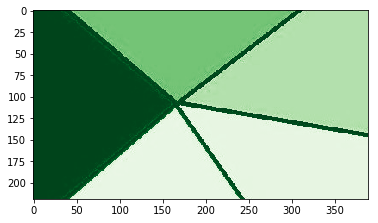

In [93]:
compressed_value_green = open("compressed_value_green.txt", "r")
new = compressed_value_green.read().split("^")
value = []
quantity = []
for i in new:
    newdata = i.split("~")
    value.append(newdata[0].split("\n"))
    quantity.append(newdata[1].split("\n"))
for i in value:
    for j in i:
        j = int(j)
for i in quantity:
    for j in i:
        j = int(j)    
        
# print("\nvalue",value)
# print("\nquanti",quantity)
compressed_value_green.close()

img_size_f = open("img_size.txt", "r")
data_size = img_size_f.read().split(" ")
row = int(data_size[0])
column = int(data_size[1])
img_size_f.close()

img_decode_green = np.zeros([row,column], dtype = int)
# print(img_decode_green)

dem = 0
for row in range(img_decode_green.shape[0]):
#     print(value[0])
#     print(quantity[0])
    temp_line = np.zeros([1,img_decode_green.shape[1]], dtype = int)
    print("len temp line", len(temp_line))
    print("ROW ", dem)
    i = 0
    num = 0
    while i < (temp_line.shape[1]):
        temp_value = value[row][num]
        print("tempvalue",temp_value)
        temp_line[0][i] = temp_value
        repeat = int(quantity[row][num])
        print("repeat",repeat)
        for j in range(i, i + repeat):
            temp_line[0][j] = temp_value
#             print(temp_value)
        i = i + repeat
        num = num + 1
#         print("i",i)

    dem = dem + 1
#     print(temp_line)
    img_decode_green[row][:] = temp_line
plt.imshow(img_decode_green, cmap= "Greens_r")

img_decode_RGB[:,:,1] = img_decode_green

## 4.5 Decode Blue Filter:

len temp line 1
ROW  0
tempvalue 17
repeat 16
tempvalue 20
repeat 3
tempvalue 19
repeat 5
tempvalue 20
repeat 2
tempvalue 21
repeat 2
tempvalue 20
repeat 2
tempvalue 19
repeat 1
tempvalue 16
repeat 1
tempvalue 21
repeat 1
tempvalue 15
repeat 2
tempvalue 9
repeat 1
tempvalue 11
repeat 1
tempvalue 10
repeat 1
tempvalue 3
repeat 1
tempvalue 11
repeat 1
tempvalue 5
repeat 1
tempvalue 19
repeat 1
tempvalue 0
repeat 2
tempvalue 135
repeat 1
tempvalue 93
repeat 1
tempvalue 67
repeat 1
tempvalue 46
repeat 1
tempvalue 35
repeat 1
tempvalue 44
repeat 1
tempvalue 31
repeat 1
tempvalue 14
repeat 1
tempvalue 48
repeat 1
tempvalue 19
repeat 1
tempvalue 39
repeat 1
tempvalue 26
repeat 1
tempvalue 27
repeat 1
tempvalue 28
repeat 1
tempvalue 34
repeat 1
tempvalue 37
repeat 1
tempvalue 38
repeat 1
tempvalue 36
repeat 1
tempvalue 37
repeat 1
tempvalue 36
repeat 1
tempvalue 34
repeat 2
tempvalue 33
repeat 4
tempvalue 34
repeat 2
tempvalue 36
repeat 24
tempvalue 35
repeat 175
tempvalue 36
repeat 1
tempvalu

tempvalue 14
repeat 1
tempvalue 9
repeat 1
tempvalue 16
repeat 1
tempvalue 20
repeat 1
tempvalue 0
repeat 1
tempvalue 31
repeat 1
tempvalue 23
repeat 1
tempvalue 32
repeat 1
tempvalue 13
repeat 1
tempvalue 12
repeat 2
tempvalue 6
repeat 2
tempvalue 0
repeat 3
tempvalue 84
repeat 1
tempvalue 82
repeat 1
tempvalue 56
repeat 1
tempvalue 48
repeat 1
tempvalue 37
repeat 1
tempvalue 31
repeat 1
tempvalue 33
repeat 1
tempvalue 38
repeat 1
tempvalue 37
repeat 1
tempvalue 34
repeat 2
tempvalue 30
repeat 2
tempvalue 38
repeat 1
tempvalue 42
repeat 2
tempvalue 41
repeat 2
tempvalue 39
repeat 2
tempvalue 38
repeat 3
tempvalue 36
repeat 2
tempvalue 35
repeat 4
tempvalue 36
repeat 16
tempvalue 35
repeat 176
tempvalue 34
repeat 2
tempvalue 35
repeat 1
tempvalue 37
repeat 1
tempvalue 40
repeat 1
tempvalue 42
repeat 1
tempvalue 43
repeat 2
tempvalue 41
repeat 1
tempvalue 39
repeat 1
tempvalue 37
repeat 1
tempvalue 34
repeat 1
tempvalue 31
repeat 1
tempvalue 29
repeat 2
tempvalue 31
repeat 1
tempvalue 3

tempvalue 35
repeat 1
tempvalue 36
repeat 1
tempvalue 35
repeat 5
tempvalue 33
repeat 1
tempvalue 35
repeat 2
tempvalue 36
repeat 16
tempvalue 35
repeat 177
tempvalue 36
repeat 2
tempvalue 38
repeat 1
tempvalue 36
repeat 1
tempvalue 35
repeat 1
tempvalue 33
repeat 1
tempvalue 31
repeat 1
tempvalue 24
repeat 1
tempvalue 33
repeat 1
tempvalue 30
repeat 1
tempvalue 44
repeat 1
tempvalue 54
repeat 1
tempvalue 59
repeat 1
tempvalue 79
repeat 1
tempvalue 67
repeat 1
tempvalue 104
repeat 1
tempvalue 0
repeat 6
tempvalue 8
repeat 1
tempvalue 7
repeat 1
tempvalue 14
repeat 1
tempvalue 183
repeat 1
tempvalue 208
repeat 1
tempvalue 193
repeat 2
tempvalue 203
repeat 1
tempvalue 212
repeat 1
tempvalue 187
repeat 1
tempvalue 189
repeat 1
tempvalue 212
repeat 1
tempvalue 200
repeat 1
tempvalue 193
repeat 1
tempvalue 202
repeat 1
tempvalue 198
repeat 1
tempvalue 205
repeat 1
tempvalue 200
repeat 8
tempvalue 201
repeat 69
len temp line 1
ROW  13
tempvalue 17
repeat 16
tempvalue 20
repeat 2
tempvalue 19

repeat 1
tempvalue 40
repeat 1
tempvalue 38
repeat 1
tempvalue 39
repeat 1
tempvalue 36
repeat 1
tempvalue 35
repeat 1
tempvalue 31
repeat 1
tempvalue 30
repeat 1
tempvalue 32
repeat 1
tempvalue 34
repeat 1
tempvalue 36
repeat 2
tempvalue 35
repeat 1
tempvalue 31
repeat 1
tempvalue 29
repeat 1
tempvalue 31
repeat 1
tempvalue 35
repeat 1
tempvalue 38
repeat 2
tempvalue 36
repeat 1
tempvalue 35
repeat 143
tempvalue 36
repeat 15
tempvalue 38
repeat 1
tempvalue 39
repeat 2
tempvalue 36
repeat 2
tempvalue 33
repeat 2
tempvalue 36
repeat 3
tempvalue 34
repeat 1
tempvalue 29
repeat 1
tempvalue 28
repeat 1
tempvalue 32
repeat 1
tempvalue 36
repeat 1
tempvalue 46
repeat 1
tempvalue 52
repeat 1
tempvalue 64
repeat 1
tempvalue 40
repeat 1
tempvalue 20
repeat 1
tempvalue 22
repeat 1
tempvalue 30
repeat 1
tempvalue 33
repeat 1
tempvalue 40
repeat 1
tempvalue 95
repeat 1
tempvalue 85
repeat 1
tempvalue 0
repeat 4
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 18
repeat 1
tempvalue 16
repeat 1
t

repeat 1
tempvalue 14
repeat 1
tempvalue 19
repeat 1
tempvalue 16
repeat 1
tempvalue 35
repeat 1
tempvalue 43
repeat 1
tempvalue 53
repeat 1
tempvalue 44
repeat 1
tempvalue 34
repeat 1
tempvalue 47
repeat 1
tempvalue 31
repeat 1
tempvalue 29
repeat 2
tempvalue 35
repeat 2
tempvalue 37
repeat 3
tempvalue 35
repeat 145
tempvalue 36
repeat 15
tempvalue 35
repeat 1
tempvalue 32
repeat 1
tempvalue 33
repeat 1
tempvalue 28
repeat 1
tempvalue 36
repeat 1
tempvalue 33
repeat 1
tempvalue 37
repeat 1
tempvalue 41
repeat 1
tempvalue 56
repeat 1
tempvalue 44
repeat 1
tempvalue 18
repeat 1
tempvalue 20
repeat 1
tempvalue 39
repeat 1
tempvalue 34
repeat 1
tempvalue 26
repeat 1
tempvalue 36
repeat 1
tempvalue 48
repeat 1
tempvalue 94
repeat 1
tempvalue 120
repeat 1
tempvalue 0
repeat 2
tempvalue 1
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 12
repeat 1
tempvalue 1
repeat 1
tempvalue 6
repeat 1
tempvalue 194
repeat 2
tempvalue 215
repeat 1
tempvalue 203
repeat 1
tempvalue 201
repeat 

tempvalue 5
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 182
repeat 1
tempvalue 195
repeat 1
tempvalue 190
repeat 1
tempvalue 203
repeat 1
tempvalue 198
repeat 1
tempvalue 180
repeat 1
tempvalue 218
repeat 1
tempvalue 197
repeat 1
tempvalue 200
repeat 1
tempvalue 188
repeat 1
tempvalue 201
repeat 1
tempvalue 194
repeat 1
tempvalue 197
repeat 1
tempvalue 201
repeat 1
tempvalue 199
repeat 1
tempvalue 203
repeat 1
tempvalue 204
repeat 1
tempvalue 206
repeat 2
tempvalue 205
repeat 1
tempvalue 204
repeat 2
tempvalue 205
repeat 1
tempvalue 203
repeat 2
tempvalue 201
repeat 2
tempvalue 199
repeat 3
tempvalue 201
repeat 85
len temp line 1
ROW  31
tempvalue 17
repeat 48
tempvalue 16
repeat 1
tempvalue 14
repeat 1
tempvalue 15
repeat 6
tempvalue 17
repeat 2
tempvalue 19
repeat 1
tempvalue 20
repeat 3
tempvalue 21
repeat 1
tempvalue 19
repeat 2
tempvalue 20
repeat 1
tempvalue 18
repeat 1
tempvalue 16
repeat 1
tempvalue 15
repeat 1
tempvalue 20
repeat 1
tempvalue 25
repeat 1
tempva

tempvalue 213
repeat 1
tempvalue 209
repeat 1
tempvalue 198
repeat 1
tempvalue 199
repeat 8
tempvalue 201
repeat 101
len temp line 1
ROW  37
tempvalue 17
repeat 64
tempvalue 15
repeat 2
tempvalue 17
repeat 1
tempvalue 19
repeat 1
tempvalue 21
repeat 1
tempvalue 20
repeat 1
tempvalue 18
repeat 1
tempvalue 17
repeat 1
tempvalue 14
repeat 1
tempvalue 19
repeat 2
tempvalue 18
repeat 1
tempvalue 21
repeat 1
tempvalue 30
repeat 1
tempvalue 31
repeat 1
tempvalue 27
repeat 1
tempvalue 9
repeat 1
tempvalue 5
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 5
tempvalue 63
repeat 1
tempvalue 100
repeat 1
tempvalue 61
repeat 1
tempvalue 25
repeat 1
tempvalue 36
repeat 1
tempvalue 29
repeat 1
tempvalue 21
repeat 1
tempvalue 22
repeat 1
tempvalue 28
repeat 1
tempvalue 31
repeat 1
tempvalue 37
repeat 1
tempvalue 36
repeat 1
tempvalue 38
repeat 1
tempvalue 43
repeat 1
tempvalue 40
repeat 1
tempvalue 42
repeat 1
tempvalue 40
repeat 1
tempvalue 38
repeat 2
tempvalue 36
repeat 3
tempvalue 38
repeat 1
tem

repeat 1
tempvalue 0
repeat 7
tempvalue 122
repeat 1
tempvalue 63
repeat 1
tempvalue 60
repeat 1
tempvalue 42
repeat 1
tempvalue 43
repeat 1
tempvalue 29
repeat 1
tempvalue 48
repeat 1
tempvalue 28
repeat 1
tempvalue 23
repeat 1
tempvalue 30
repeat 1
tempvalue 35
repeat 1
tempvalue 38
repeat 1
tempvalue 40
repeat 1
tempvalue 38
repeat 1
tempvalue 36
repeat 1
tempvalue 33
repeat 1
tempvalue 32
repeat 1
tempvalue 35
repeat 113
tempvalue 34
repeat 4
tempvalue 35
repeat 4
tempvalue 33
repeat 1
tempvalue 38
repeat 1
tempvalue 34
repeat 1
tempvalue 36
repeat 1
tempvalue 35
repeat 1
tempvalue 36
repeat 1
tempvalue 35
repeat 1
tempvalue 34
repeat 1
tempvalue 36
repeat 1
tempvalue 45
repeat 1
tempvalue 38
repeat 1
tempvalue 23
repeat 1
tempvalue 46
repeat 1
tempvalue 64
repeat 1
tempvalue 77
repeat 1
tempvalue 103
repeat 1
tempvalue 0
repeat 2
tempvalue 8
repeat 1
tempvalue 0
repeat 2
tempvalue 15
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 189
repeat 1
tempvalue 187
repeat 1


repeat 1
tempvalue 14
repeat 1
tempvalue 20
repeat 1
tempvalue 27
repeat 1
tempvalue 28
repeat 1
tempvalue 29
repeat 1
tempvalue 20
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 2
tempvalue 7
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 98
repeat 1
tempvalue 51
repeat 1
tempvalue 65
repeat 2
tempvalue 21
repeat 1
tempvalue 33
repeat 1
tempvalue 29
repeat 1
tempvalue 33
repeat 1
tempvalue 15
repeat 1
tempvalue 26
repeat 1
tempvalue 27
repeat 2
tempvalue 34
repeat 1
tempvalue 38
repeat 1
tempvalue 42
repeat 2
tempvalue 41
repeat 1
tempvalue 42
repeat 1
tempvalue 40
repeat 2
tempvalue 38
repeat 1
tempvalue 36
repeat 2
tempvalue 35
repeat 1
tempvalue 33
repeat 2
tempvalue 35
repeat 1
tempvalue 36
repeat 15
tempvalue 35
repeat 70
tempvalue 37
repeat 2
tempvalue 40
repeat 1
tempvalue 39
repeat 1
tempvalue 36
repeat 2
tempvalue 33
repeat 1
tempvalue 28
repeat 1
tempvalue 25
repeat 1
tempvalue 26
repeat 1
tempvalue 33
repeat 1
tempvalue 34
repeat 1
tempv

tempvalue 32
repeat 1
tempvalue 26
repeat 1
tempvalue 5
repeat 1
tempvalue 2
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 3
tempvalue 86
repeat 1
tempvalue 80
repeat 1
tempvalue 49
repeat 1
tempvalue 55
repeat 1
tempvalue 41
repeat 1
tempvalue 24
repeat 1
tempvalue 35
repeat 1
tempvalue 39
repeat 1
tempvalue 27
repeat 1
tempvalue 37
repeat 2
tempvalue 38
repeat 2
tempvalue 35
repeat 1
tempvalue 33
repeat 1
tempvalue 31
repeat 1
tempvalue 33
repeat 1
tempvalue 35
repeat 1
tempvalue 36
repeat 17
tempvalue 35
repeat 64
tempvalue 33
repeat 1
tempvalue 35
repeat 2
tempvalue 36
repeat 1
tempvalue 37
repeat 2
tempvalue 35
repeat 2
tempvalue 33
repeat 2
tempvalue 35
repeat 1
tempvalue 34
repeat 1
tempvalue 35
repeat 1
tempvalue 37
repeat 2
tempvalue 31
repeat 1
tempvalue 41
repeat 1
tempvalue 21
repeat 1
tempvalue 38
repeat 1
tempvalue 48
repeat 1
tempvalue 24
repeat 1
tempvalue 55
repeat 1
tempvalue 50
repeat 1
tempvalue 79
repeat 1
tempvalue 92
r

tempvalue 209
repeat 1
tempvalue 193
repeat 1
tempvalue 206
repeat 1
tempvalue 179
repeat 1
tempvalue 207
repeat 1
tempvalue 223
repeat 1
tempvalue 189
repeat 1
tempvalue 208
repeat 1
tempvalue 198
repeat 1
tempvalue 197
repeat 1
tempvalue 200
repeat 2
tempvalue 202
repeat 3
tempvalue 200
repeat 11
tempvalue 201
repeat 125
len temp line 1
ROW  61
tempvalue 17
repeat 80
tempvalue 19
repeat 6
tempvalue 17
repeat 3
tempvalue 18
repeat 2
tempvalue 20
repeat 1
tempvalue 21
repeat 2
tempvalue 20
repeat 1
tempvalue 18
repeat 2
tempvalue 14
repeat 2
tempvalue 18
repeat 1
tempvalue 19
repeat 1
tempvalue 17
repeat 1
tempvalue 20
repeat 1
tempvalue 24
repeat 1
tempvalue 16
repeat 1
tempvalue 20
repeat 1
tempvalue 21
repeat 1
tempvalue 20
repeat 1
tempvalue 12
repeat 1
tempvalue 0
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 2
tempvalue 10
repeat 1
tempvalue 0
repeat 2
tempvalue 71
repeat 1
tempvalue 93
repeat 1
tempvalue 55
repeat 1
tempvalue 52
repeat 1
tempvalue 41
repeat 1
tempvalue 40
rep

repeat 1
tempvalue 45
repeat 1
tempvalue 26
repeat 1
tempvalue 17
repeat 1
tempvalue 43
repeat 1
tempvalue 35
repeat 1
tempvalue 26
repeat 1
tempvalue 51
repeat 2
tempvalue 59
repeat 1
tempvalue 61
repeat 1
tempvalue 86
repeat 1
tempvalue 0
repeat 5
tempvalue 1
repeat 1
tempvalue 9
repeat 1
tempvalue 5
repeat 1
tempvalue 10
repeat 1
tempvalue 207
repeat 1
tempvalue 196
repeat 1
tempvalue 207
repeat 1
tempvalue 199
repeat 1
tempvalue 207
repeat 1
tempvalue 201
repeat 3
tempvalue 199
repeat 1
tempvalue 201
repeat 1
tempvalue 199
repeat 1
tempvalue 201
repeat 151
len temp line 1
ROW  67
tempvalue 17
repeat 96
tempvalue 22
repeat 2
tempvalue 20
repeat 1
tempvalue 19
repeat 1
tempvalue 17
repeat 2
tempvalue 15
repeat 2
tempvalue 14
repeat 1
tempvalue 15
repeat 1
tempvalue 19
repeat 3
tempvalue 20
repeat 1
tempvalue 19
repeat 2
tempvalue 25
repeat 1
tempvalue 24
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 2
tempvalue 2
repeat 1
tempvalue 29
rep

repeat 1
tempvalue 44
repeat 1
tempvalue 45
repeat 1
tempvalue 29
repeat 1
tempvalue 46
repeat 1
tempvalue 26
repeat 1
tempvalue 23
repeat 1
tempvalue 43
repeat 1
tempvalue 17
repeat 1
tempvalue 46
repeat 1
tempvalue 39
repeat 1
tempvalue 38
repeat 1
tempvalue 82
repeat 1
tempvalue 90
repeat 1
tempvalue 0
repeat 3
tempvalue 4
repeat 1
tempvalue 11
repeat 1
tempvalue 7
repeat 1
tempvalue 5
repeat 1
tempvalue 13
repeat 1
tempvalue 16
repeat 1
tempvalue 212
repeat 1
tempvalue 195
repeat 1
tempvalue 205
repeat 1
tempvalue 204
repeat 1
tempvalue 197
repeat 1
tempvalue 196
repeat 1
tempvalue 195
repeat 3
tempvalue 196
repeat 4
tempvalue 197
repeat 2
tempvalue 199
repeat 4
tempvalue 201
repeat 151
len temp line 1
ROW  73
tempvalue 17
repeat 96
tempvalue 20
repeat 4
tempvalue 17
repeat 2
tempvalue 15
repeat 6
tempvalue 16
repeat 3
tempvalue 18
repeat 1
tempvalue 23
repeat 1
tempvalue 22
repeat 1
tempvalue 17
repeat 1
tempvalue 15
repeat 2
tempvalue 16
repeat 1
tempvalue 20
repeat 1
tempvalue 2

tempvalue 36
repeat 2
tempvalue 34
repeat 1
tempvalue 38
repeat 1
tempvalue 42
repeat 1
tempvalue 40
repeat 1
tempvalue 34
repeat 1
tempvalue 36
repeat 1
tempvalue 31
repeat 1
tempvalue 29
repeat 1
tempvalue 32
repeat 1
tempvalue 31
repeat 1
tempvalue 30
repeat 1
tempvalue 40
repeat 1
tempvalue 60
repeat 1
tempvalue 58
repeat 1
tempvalue 99
repeat 1
tempvalue 72
repeat 1
tempvalue 0
repeat 2
tempvalue 19
repeat 1
tempvalue 10
repeat 1
tempvalue 11
repeat 1
tempvalue 5
repeat 1
tempvalue 25
repeat 1
tempvalue 0
repeat 1
tempvalue 198
repeat 1
tempvalue 184
repeat 1
tempvalue 185
repeat 1
tempvalue 205
repeat 1
tempvalue 198
repeat 1
tempvalue 211
repeat 1
tempvalue 195
repeat 1
tempvalue 186
repeat 1
tempvalue 206
repeat 1
tempvalue 188
repeat 1
tempvalue 196
repeat 2
tempvalue 210
repeat 1
tempvalue 204
repeat 5
tempvalue 203
repeat 1
tempvalue 205
repeat 1
tempvalue 203
repeat 2
tempvalue 201
repeat 1
tempvalue 203
repeat 1
tempvalue 201
repeat 1
tempvalue 203
repeat 1
tempvalue 201
r

tempvalue 5
repeat 1
tempvalue 23
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 4
tempvalue 76
repeat 1
tempvalue 77
repeat 1
tempvalue 50
repeat 1
tempvalue 32
repeat 1
tempvalue 29
repeat 1
tempvalue 56
repeat 1
tempvalue 26
repeat 1
tempvalue 37
repeat 1
tempvalue 44
repeat 1
tempvalue 42
repeat 1
tempvalue 45
repeat 1
tempvalue 42
repeat 1
tempvalue 45
repeat 1
tempvalue 41
repeat 1
tempvalue 44
repeat 1
tempvalue 39
repeat 1
tempvalue 37
repeat 1
tempvalue 35
repeat 3
tempvalue 36
repeat 1
tempvalue 38
repeat 3
tempvalue 36
repeat 1
tempvalue 35
repeat 1
tempvalue 33
repeat 2
tempvalue 31
repeat 1
tempvalue 33
repeat 1
tempvalue 35
repeat 2
tempvalue 36
repeat 1
tempvalue 38
repeat 2
tempvalue 36
repeat 1
tempvalue 35
repeat 2
tempvalue 33
repeat 1
tempvalue 30
repeat 1
tempvalue 28
repeat 1
tempvalue 31
repeat 1
tempvalue 30
repeat 1
tempvalue 21
repeat 1
tempvalue 20
repeat 1
tempvalue 26
repeat 1
tempvalue 29
repeat 1
tempvalue 38
repeat 1
tempvalue 47
repeat 1
tempvalue 57


repeat 1
tempvalue 23
repeat 2
tempvalue 19
repeat 1
tempvalue 16
repeat 2
tempvalue 12
repeat 1
tempvalue 17
repeat 1
tempvalue 16
repeat 1
tempvalue 23
repeat 1
tempvalue 14
repeat 1
tempvalue 0
repeat 1
tempvalue 10
repeat 2
tempvalue 0
repeat 2
tempvalue 11
repeat 1
tempvalue 0
repeat 2
tempvalue 101
repeat 1
tempvalue 63
repeat 1
tempvalue 73
repeat 1
tempvalue 39
repeat 1
tempvalue 23
repeat 1
tempvalue 44
repeat 1
tempvalue 24
repeat 2
tempvalue 32
repeat 1
tempvalue 30
repeat 1
tempvalue 34
repeat 1
tempvalue 31
repeat 1
tempvalue 36
repeat 1
tempvalue 39
repeat 1
tempvalue 38
repeat 1
tempvalue 41
repeat 1
tempvalue 43
repeat 1
tempvalue 38
repeat 1
tempvalue 40
repeat 1
tempvalue 37
repeat 1
tempvalue 34
repeat 1
tempvalue 35
repeat 1
tempvalue 39
repeat 1
tempvalue 36
repeat 1
tempvalue 37
repeat 1
tempvalue 43
repeat 1
tempvalue 24
repeat 1
tempvalue 17
repeat 1
tempvalue 38
repeat 1
tempvalue 25
repeat 1
tempvalue 22
repeat 1
tempvalue 41
repeat 1
tempvalue 44
repeat 1
tem

repeat 2
tempvalue 48
repeat 1
tempvalue 45
repeat 1
tempvalue 87
repeat 1
tempvalue 58
repeat 1
tempvalue 108
repeat 1
tempvalue 0
repeat 4
tempvalue 19
repeat 1
tempvalue 8
repeat 1
tempvalue 13
repeat 1
tempvalue 26
repeat 1
tempvalue 186
repeat 1
tempvalue 210
repeat 1
tempvalue 189
repeat 1
tempvalue 203
repeat 1
tempvalue 200
repeat 1
tempvalue 199
repeat 3
tempvalue 200
repeat 2
tempvalue 199
repeat 2
tempvalue 197
repeat 1
tempvalue 199
repeat 1
tempvalue 201
repeat 1
tempvalue 203
repeat 2
tempvalue 205
repeat 1
tempvalue 203
repeat 2
tempvalue 201
repeat 1
tempvalue 200
repeat 8
tempvalue 201
repeat 173
len temp line 1
ROW  97
tempvalue 17
repeat 128
tempvalue 18
repeat 2
tempvalue 17
repeat 4
tempvalue 16
repeat 2
tempvalue 17
repeat 9
tempvalue 16
repeat 1
tempvalue 22
repeat 1
tempvalue 19
repeat 1
tempvalue 11
repeat 1
tempvalue 23
repeat 1
tempvalue 26
repeat 1
tempvalue 0
repeat 2
tempvalue 2
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 3
tempvalue 90
repeat 1
tempv

len temp line 1
ROW  105
tempvalue 17
repeat 128
tempvalue 18
repeat 4
tempvalue 17
repeat 4
tempvalue 16
repeat 2
tempvalue 17
repeat 3
tempvalue 18
repeat 4
tempvalue 16
repeat 3
tempvalue 20
repeat 1
tempvalue 22
repeat 1
tempvalue 25
repeat 1
tempvalue 27
repeat 1
tempvalue 24
repeat 1
tempvalue 23
repeat 1
tempvalue 14
repeat 1
tempvalue 11
repeat 1
tempvalue 13
repeat 1
tempvalue 22
repeat 1
tempvalue 32
repeat 1
tempvalue 22
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 9
repeat 1
tempvalue 0
repeat 6
tempvalue 4
repeat 1
tempvalue 23
repeat 1
tempvalue 16
repeat 1
tempvalue 23
repeat 1
tempvalue 4
repeat 1
tempvalue 195
repeat 1
tempvalue 192
repeat 1
tempvalue 183
repeat 1
tempvalue 180
repeat 1
tempvalue 209
repeat 1
tempvalue 191
repeat 1
tempvalue 207
repeat 1
tempvalue 212
repeat 1
tempvalue 185
repeat 1
tempvalue 218
repeat 1
tempvalue 199
repeat 1
tempvalue 184
repeat 1
tempvalue 200
repeat 1
tempvalue 195
repeat 1
tempvalue 213
repeat

tempvalue 13
repeat 1
tempvalue 15
repeat 1
tempvalue 17
repeat 1
tempvalue 4
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 196
repeat 1
tempvalue 0
repeat 5
tempvalue 5
repeat 1
tempvalue 0
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 3
tempvalue 9
repeat 1
tempvalue 1
repeat 1
tempvalue 2
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 2
tempvalue 12
repeat 1
tempvalue 3
repeat 1
tempvalue 8
repeat 1
tempvalue 5
repeat 1
tempvalue 13
repeat 1
tempvalue 4
repeat 1
tempvalue 5
repeat 1
tempvalue 30
repeat 1
tempvalue 6
repeat 1
tempvalue 1
repeat 1
tempvalue 13
repeat 1
tempvalue 9
repeat 1
tempvalue 11
repeat 1
tempvalue 199
repeat 1
tempvalue 196
repeat 1
tempvalue 213
repeat 1
tempvalue 195
repeat 1
tempvalue 205
repeat 1
tempvalue 198
repeat 2
tempvalue 196
repeat 1
tempvalue 203
repeat 1
tempvalue 197
repeat 1
tempvalue 204
repeat 1
tempvalue 198
repeat 1
tempvalue 202
repeat 1
tempvalue 199
repeat 1
tempvalue 205
repeat 1
tempvalue 197
repeat 1
tempvalue 201
r

repeat 1
tempvalue 180
repeat 1
tempvalue 185
repeat 1
tempvalue 194
repeat 1
tempvalue 170
repeat 1
tempvalue 179
repeat 1
tempvalue 175
repeat 1
tempvalue 194
repeat 1
tempvalue 170
repeat 1
tempvalue 175
repeat 1
tempvalue 180
repeat 1
tempvalue 182
repeat 1
tempvalue 196
repeat 1
tempvalue 212
repeat 1
tempvalue 224
repeat 1
tempvalue 152
repeat 1
tempvalue 193
repeat 1
tempvalue 209
repeat 1
tempvalue 179
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 1
tempvalue 9
repeat 1
tempvalue 0
repeat 3
tempvalue 10
repeat 1
tempvalue 0
repeat 1
tempvalue 26
repeat 1
tempvalue 0
repeat 1
tempvalue 4
repeat 1
tempvalue 3
repeat 1
tempvalue 7
repeat 1
tempvalue 0
repeat 2
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 7
repeat 1
tempvalue 1
repeat 1
tempvalue 10
repeat 1
tempvalue 7
repeat 1
tempvalue 2
repeat 1
tempvalue 7
repeat 1
tempvalue 32
repeat 1
tempvalue 184
repeat 1
tempvalue 219
repeat 1
t

repeat 1
tempvalue 27
repeat 1
tempvalue 28
repeat 1
tempvalue 11
repeat 1
tempvalue 3
repeat 1
tempvalue 10
repeat 1
tempvalue 8
repeat 1
tempvalue 12
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 3
tempvalue 86
repeat 1
tempvalue 65
repeat 1
tempvalue 64
repeat 1
tempvalue 37
repeat 2
tempvalue 43
repeat 1
tempvalue 36
repeat 1
tempvalue 69
repeat 1
tempvalue 108
repeat 1
tempvalue 0
repeat 2
tempvalue 13
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 3
repeat 1
tempvalue 230
repeat 1
tempvalue 204
repeat 1
tempvalue 184
repeat 1
tempvalue 185
repeat 1
tempvalue 176
repeat 1
tempvalue 157
repeat 1
tempvalue 159
repeat 1
tempvalue 168
repeat 1
tempvalue 157
repeat 1
tempvalue 183
repeat 1
tempvalue 172
repeat 1
tempvalue 170
repeat 1
tempvalue 149
repeat 1
tempvalue 172
repeat 1
tempvalue 168
repeat 1
tempvalue 153
repeat 1
tempvalue 166
repeat 1
tempvalue 171
repeat 1
tempvalue 168
repeat 1
tempvalue 167
repeat 1
tempvalue 173
repeat 1
tempvalue 170
repeat 1
tempvalu

tempvalue 176
repeat 2
tempvalue 173
repeat 1
tempvalue 172
repeat 1
tempvalue 171
repeat 2
tempvalue 173
repeat 1
tempvalue 172
repeat 1
tempvalue 173
repeat 5
tempvalue 171
repeat 2
tempvalue 169
repeat 9
tempvalue 171
repeat 2
tempvalue 173
repeat 4
tempvalue 174
repeat 2
tempvalue 170
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 176
repeat 1
tempvalue 179
repeat 1
tempvalue 178
repeat 1
tempvalue 170
repeat 1
tempvalue 163
repeat 1
tempvalue 172
repeat 1
tempvalue 194
repeat 1
tempvalue 192
repeat 1
tempvalue 191
repeat 1
tempvalue 185
repeat 1
tempvalue 194
repeat 1
tempvalue 187
repeat 1
tempvalue 188
repeat 1
tempvalue 208
repeat 1
tempvalue 177
repeat 1
tempvalue 233
repeat 1
tempvalue 197
repeat 1
tempvalue 0
repeat 14
tempvalue 8
repeat 1
tempvalue 3
repeat 1
tempvalue 2
repeat 1
tempvalue 4
repeat 1
tempvalue 8
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 15
repeat 1
tempvalue 0
repeat 2
tempvalue 3
repeat 1
tempvalue 

tempvalue 19
repeat 1
tempvalue 41
repeat 1
tempvalue 81
repeat 1
tempvalue 74
repeat 1
tempvalue 0
repeat 7
tempvalue 170
repeat 1
tempvalue 204
repeat 1
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 169
repeat 1
tempvalue 171
repeat 1
tempvalue 172
repeat 1
tempvalue 174
repeat 2
tempvalue 175
repeat 2
tempvalue 176
repeat 1
tempvalue 178
repeat 1
tempvalue 180
repeat 1
tempvalue 178
repeat 2
tempvalue 176
repeat 1
tempvalue 174
repeat 1
tempvalue 173
repeat 2
tempvalue 171
repeat 6
tempvalue 173
repeat 1
tempvalue 171
repeat 9
tempvalue 173
repeat 1
tempvalue 170
repeat 1
tempvalue 171
repeat 1
tempvalue 172
repeat 1
tempvalue 175
repeat 1
tempvalue 171
repeat 1
tempvalue 168
repeat 1
tempvalue 164
repeat 1
tempvalue 172
repeat 1
tempvalue 175
repeat 1
tempvalue 190
repeat 1
tempvalue 156
repeat 1
tempvalue 172
repeat 1
tempvalue 170
repeat 1
tempvalue 162
repeat 1
tempvalue 186
repeat 1
tempvalue 179
repeat 1
tempvalue 163
repeat 1
tempvalue 180
repeat 1
tempvalue 184
rep

repeat 1
tempvalue 19
repeat 1
tempvalue 2
repeat 1
tempvalue 39
repeat 1
tempvalue 20
repeat 1
tempvalue 37
repeat 1
tempvalue 11
repeat 1
tempvalue 5
repeat 1
tempvalue 6
repeat 1
tempvalue 1
repeat 1
tempvalue 0
repeat 3
tempvalue 125
repeat 1
tempvalue 87
repeat 1
tempvalue 49
repeat 1
tempvalue 41
repeat 1
tempvalue 27
repeat 1
tempvalue 28
repeat 1
tempvalue 33
repeat 1
tempvalue 31
repeat 1
tempvalue 27
repeat 1
tempvalue 25
repeat 1
tempvalue 22
repeat 1
tempvalue 32
repeat 1
tempvalue 29
repeat 1
tempvalue 30
repeat 1
tempvalue 22
repeat 1
tempvalue 26
repeat 1
tempvalue 23
repeat 1
tempvalue 31
repeat 1
tempvalue 33
repeat 1
tempvalue 28
repeat 1
tempvalue 19
repeat 1
tempvalue 20
repeat 1
tempvalue 15
repeat 1
tempvalue 28
repeat 1
tempvalue 54
repeat 1
tempvalue 86
repeat 1
tempvalue 124
repeat 1
tempvalue 0
repeat 2
tempvalue 8
repeat 1
tempvalue 0
repeat 3
tempvalue 188
repeat 1
tempvalue 174
repeat 1
tempvalue 168
repeat 1
tempvalue 159
repeat 1
tempvalue 160
repeat 1
te

repeat 1
tempvalue 185
repeat 1
tempvalue 203
repeat 1
tempvalue 201
repeat 1
tempvalue 188
repeat 1
tempvalue 196
repeat 1
tempvalue 183
repeat 1
tempvalue 195
repeat 1
tempvalue 216
repeat 1
tempvalue 171
repeat 1
tempvalue 214
repeat 1
tempvalue 178
repeat 1
tempvalue 205
repeat 1
tempvalue 206
repeat 1
tempvalue 186
repeat 1
tempvalue 201
repeat 1
tempvalue 194
repeat 1
tempvalue 203
repeat 1
tempvalue 189
repeat 1
tempvalue 196
repeat 1
tempvalue 203
repeat 1
tempvalue 202
repeat 1
tempvalue 179
repeat 1
tempvalue 193
repeat 1
tempvalue 194
repeat 1
tempvalue 206
repeat 1
tempvalue 198
repeat 1
tempvalue 203
repeat 1
tempvalue 188
repeat 1
tempvalue 191
repeat 1
tempvalue 193
repeat 1
tempvalue 191
repeat 1
tempvalue 205
repeat 1
tempvalue 195
repeat 1
tempvalue 189
repeat 1
tempvalue 187
repeat 1
tempvalue 199
repeat 1
tempvalue 201
repeat 2
tempvalue 207
repeat 1
tempvalue 200
repeat 1
tempvalue 204
repeat 1
tempvalue 201
repeat 1
tempvalue 204
repeat 1
tempvalue 203
repeat 1
te

tempvalue 168
repeat 1
tempvalue 174
repeat 1
tempvalue 168
repeat 1
tempvalue 176
repeat 1
tempvalue 177
repeat 1
tempvalue 186
repeat 1
tempvalue 183
repeat 1
tempvalue 171
repeat 1
tempvalue 165
repeat 1
tempvalue 178
repeat 1
tempvalue 151
repeat 1
tempvalue 189
repeat 1
tempvalue 174
repeat 1
tempvalue 192
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 184
repeat 2
tempvalue 180
repeat 1
tempvalue 186
repeat 2
tempvalue 184
repeat 1
tempvalue 185
repeat 1
tempvalue 201
repeat 1
tempvalue 163
repeat 1
tempvalue 188
repeat 1
tempvalue 178
repeat 1
tempvalue 191
repeat 1
tempvalue 190
repeat 1
tempvalue 173
repeat 1
tempvalue 207
repeat 1
tempvalue 192
repeat 1
tempvalue 191
repeat 1
tempvalue 198
repeat 1
tempvalue 199
repeat 1
tempvalue 205
repeat 1
tempvalue 0
repeat 14
tempvalue 17
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 15
repeat 1
tempvalue 6
repeat 1
tempvalue 4
repeat 1
tempvalue 12
repeat 1
tempvalue 2
repeat 1
tempvalue 9
repeat 1
temp

tempvalue 52
repeat 1
tempvalue 0
repeat 1
tempvalue 1
repeat 1
tempvalue 5
repeat 1
tempvalue 0
repeat 5
tempvalue 93
repeat 1
tempvalue 67
repeat 1
tempvalue 47
repeat 1
tempvalue 31
repeat 1
tempvalue 20
repeat 1
tempvalue 14
repeat 1
tempvalue 17
repeat 1
tempvalue 16
repeat 1
tempvalue 22
repeat 1
tempvalue 25
repeat 1
tempvalue 27
repeat 1
tempvalue 29
repeat 1
tempvalue 27
repeat 1
tempvalue 25
repeat 6
tempvalue 27
repeat 1
tempvalue 29
repeat 1
tempvalue 27
repeat 1
tempvalue 22
repeat 1
tempvalue 20
repeat 1
tempvalue 24
repeat 1
tempvalue 27
repeat 1
tempvalue 29
repeat 1
tempvalue 27
repeat 1
tempvalue 19
repeat 1
tempvalue 21
repeat 1
tempvalue 30
repeat 1
tempvalue 34
repeat 1
tempvalue 40
repeat 1
tempvalue 39
repeat 1
tempvalue 31
repeat 1
tempvalue 19
repeat 1
tempvalue 0
repeat 1
tempvalue 11
repeat 1
tempvalue 28
repeat 1
tempvalue 91
repeat 1
tempvalue 95
repeat 1
tempvalue 0
repeat 3
tempvalue 7
repeat 1
tempvalue 0
repeat 2
tempvalue 222
repeat 1
tempvalue 180
rep

repeat 1
tempvalue 202
repeat 1
tempvalue 197
repeat 1
tempvalue 209
repeat 1
tempvalue 190
repeat 1
tempvalue 183
repeat 1
tempvalue 206
repeat 1
len temp line 1
ROW  138
tempvalue 17
repeat 104
tempvalue 18
repeat 8
tempvalue 20
repeat 2
tempvalue 18
repeat 2
tempvalue 16
repeat 1
tempvalue 15
repeat 1
tempvalue 13
repeat 1
tempvalue 12
repeat 1
tempvalue 16
repeat 1
tempvalue 18
repeat 1
tempvalue 17
repeat 1
tempvalue 14
repeat 1
tempvalue 21
repeat 1
tempvalue 27
repeat 1
tempvalue 24
repeat 1
tempvalue 31
repeat 1
tempvalue 27
repeat 1
tempvalue 2
repeat 1
tempvalue 11
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 4
tempvalue 127
repeat 1
tempvalue 85
repeat 1
tempvalue 58
repeat 1
tempvalue 62
repeat 1
tempvalue 38
repeat 1
tempvalue 19
repeat 1
tempvalue 31
repeat 1
tempvalue 34
repeat 1
tempvalue 29
repeat 1
tempvalue 25
repeat 3
tempvalue 24
repeat 3
tempvalue 22
repeat 2
tempvalue 24
repeat 2
tempvalue 25
repeat 1
tempvalue 29
repeat 1
tempvalue 31
repeat 1
tempvalue 34
r

repeat 1
tempvalue 20
repeat 1
tempvalue 22
repeat 1
tempvalue 24
repeat 1
tempvalue 25
repeat 1
tempvalue 29
repeat 3
tempvalue 27
repeat 1
tempvalue 25
repeat 2
tempvalue 27
repeat 2
tempvalue 29
repeat 1
tempvalue 27
repeat 1
tempvalue 24
repeat 1
tempvalue 22
repeat 2
tempvalue 25
repeat 1
tempvalue 32
repeat 1
tempvalue 35
repeat 2
tempvalue 30
repeat 1
tempvalue 24
repeat 1
tempvalue 21
repeat 1
tempvalue 17
repeat 1
tempvalue 14
repeat 1
tempvalue 33
repeat 1
tempvalue 39
repeat 1
tempvalue 36
repeat 1
tempvalue 45
repeat 1
tempvalue 2
repeat 1
tempvalue 10
repeat 1
tempvalue 50
repeat 1
tempvalue 57
repeat 1
tempvalue 88
repeat 1
tempvalue 0
repeat 7
tempvalue 189
repeat 1
tempvalue 215
repeat 1
tempvalue 173
repeat 1
tempvalue 177
repeat 1
tempvalue 166
repeat 1
tempvalue 176
repeat 1
tempvalue 173
repeat 1
tempvalue 166
repeat 1
tempvalue 173
repeat 2
tempvalue 174
repeat 4
tempvalue 173
repeat 58
tempvalue 174
repeat 7
tempvalue 176
repeat 7
tempvalue 174
repeat 3
tempvalue 

tempvalue 27
repeat 1
tempvalue 31
repeat 2
tempvalue 27
repeat 1
tempvalue 25
repeat 2
tempvalue 27
repeat 1
tempvalue 29
repeat 3
tempvalue 27
repeat 1
tempvalue 25
repeat 4
tempvalue 27
repeat 5
tempvalue 25
repeat 4
tempvalue 27
repeat 3
tempvalue 25
repeat 1
tempvalue 24
repeat 3
tempvalue 29
repeat 1
tempvalue 31
repeat 1
tempvalue 33
repeat 1
tempvalue 31
repeat 1
tempvalue 29
repeat 1
tempvalue 27
repeat 1
tempvalue 25
repeat 2
tempvalue 28
repeat 1
tempvalue 26
repeat 1
tempvalue 28
repeat 2
tempvalue 23
repeat 1
tempvalue 21
repeat 1
tempvalue 27
repeat 1
tempvalue 33
repeat 1
tempvalue 22
repeat 1
tempvalue 42
repeat 1
tempvalue 75
repeat 1
tempvalue 125
repeat 1
tempvalue 0
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 193
repeat 1
tempvalue 186
repeat 1
tempvalue 164
repeat 1
tempvalue 183
repeat 1
tempvalue 171
repeat 1
tempvalue 167
repeat 1
tempvalue 164
repeat 1
tempvalue 172
repeat 1
tempvalue 170
repeat 1
temp

tempvalue 17
repeat 80
tempvalue 19
repeat 16
tempvalue 18
repeat 2
tempvalue 20
repeat 1
tempvalue 21
repeat 3
tempvalue 19
repeat 1
tempvalue 15
repeat 1
tempvalue 14
repeat 1
tempvalue 12
repeat 3
tempvalue 16
repeat 1
tempvalue 19
repeat 1
tempvalue 26
repeat 2
tempvalue 20
repeat 1
tempvalue 23
repeat 1
tempvalue 21
repeat 1
tempvalue 11
repeat 1
tempvalue 4
repeat 1
tempvalue 0
repeat 7
tempvalue 115
repeat 1
tempvalue 74
repeat 1
tempvalue 47
repeat 1
tempvalue 18
repeat 1
tempvalue 10
repeat 1
tempvalue 46
repeat 1
tempvalue 8
repeat 1
tempvalue 14
repeat 1
tempvalue 40
repeat 1
tempvalue 33
repeat 1
tempvalue 34
repeat 1
tempvalue 33
repeat 2
tempvalue 31
repeat 1
tempvalue 29
repeat 1
tempvalue 27
repeat 1
tempvalue 25
repeat 1
tempvalue 24
repeat 3
tempvalue 25
repeat 1
tempvalue 27
repeat 31
tempvalue 23
repeat 1
tempvalue 29
repeat 1
tempvalue 27
repeat 1
tempvalue 23
repeat 1
tempvalue 31
repeat 1
tempvalue 27
repeat 1
tempvalue 23
repeat 1
tempvalue 34
repeat 1
tempvalue

repeat 80
tempvalue 20
repeat 8
tempvalue 19
repeat 8
tempvalue 17
repeat 1
tempvalue 18
repeat 1
tempvalue 21
repeat 1
tempvalue 22
repeat 1
tempvalue 21
repeat 2
tempvalue 20
repeat 1
tempvalue 19
repeat 1
tempvalue 16
repeat 1
tempvalue 15
repeat 2
tempvalue 20
repeat 1
tempvalue 26
repeat 1
tempvalue 24
repeat 1
tempvalue 11
repeat 1
tempvalue 2
repeat 1
tempvalue 11
repeat 1
tempvalue 10
repeat 1
tempvalue 0
repeat 4
tempvalue 90
repeat 1
tempvalue 78
repeat 1
tempvalue 72
repeat 1
tempvalue 33
repeat 1
tempvalue 7
repeat 1
tempvalue 45
repeat 1
tempvalue 23
repeat 1
tempvalue 0
repeat 1
tempvalue 10
repeat 1
tempvalue 14
repeat 1
tempvalue 24
repeat 1
tempvalue 29
repeat 1
tempvalue 33
repeat 1
tempvalue 34
repeat 1
tempvalue 36
repeat 1
tempvalue 34
repeat 1
tempvalue 31
repeat 1
tempvalue 27
repeat 1
tempvalue 22
repeat 1
tempvalue 20
repeat 1
tempvalue 18
repeat 1
tempvalue 20
repeat 1
tempvalue 24
repeat 1
tempvalue 27
repeat 1
tempvalue 33
repeat 2
tempvalue 29
repeat 1
temp

repeat 1
tempvalue 29
repeat 1
tempvalue 25
repeat 1
tempvalue 24
repeat 2
tempvalue 25
repeat 1
tempvalue 27
repeat 31
tempvalue 25
repeat 1
tempvalue 27
repeat 1
tempvalue 34
repeat 2
tempvalue 29
repeat 1
tempvalue 25
repeat 1
tempvalue 27
repeat 4
tempvalue 24
repeat 1
tempvalue 32
repeat 1
tempvalue 33
repeat 1
tempvalue 30
repeat 1
tempvalue 20
repeat 1
tempvalue 27
repeat 1
tempvalue 25
repeat 1
tempvalue 33
repeat 1
tempvalue 27
repeat 1
tempvalue 51
repeat 1
tempvalue 75
repeat 1
tempvalue 111
repeat 1
tempvalue 0
repeat 3
tempvalue 6
repeat 1
tempvalue 0
repeat 2
tempvalue 187
repeat 1
tempvalue 195
repeat 1
tempvalue 174
repeat 1
tempvalue 171
repeat 1
tempvalue 194
repeat 1
tempvalue 170
repeat 1
tempvalue 174
repeat 1
tempvalue 186
repeat 1
tempvalue 176
repeat 1
tempvalue 170
repeat 1
tempvalue 176
repeat 1
tempvalue 171
repeat 2
tempvalue 173
repeat 1
tempvalue 174
repeat 3
tempvalue 173
repeat 1
tempvalue 171
repeat 2
tempvalue 173
repeat 128
tempvalue 171
repeat 4
temp

tempvalue 28
repeat 1
tempvalue 36
repeat 1
tempvalue 16
repeat 1
tempvalue 6
repeat 1
tempvalue 52
repeat 1
tempvalue 59
repeat 1
tempvalue 130
repeat 1
tempvalue 0
repeat 1
tempvalue 12
repeat 1
tempvalue 6
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 163
repeat 1
tempvalue 189
repeat 1
tempvalue 187
repeat 1
tempvalue 168
repeat 1
tempvalue 187
repeat 1
tempvalue 168
repeat 1
tempvalue 189
repeat 1
tempvalue 172
repeat 1
tempvalue 165
repeat 1
tempvalue 170
repeat 1
tempvalue 171
repeat 1
tempvalue 163
repeat 1
tempvalue 166
repeat 1
tempvalue 177
repeat 1
tempvalue 173
repeat 165
len temp line 1
ROW  168
tempvalue 17
repeat 56
tempvalue 18
repeat 8
tempvalue 17
repeat 8
tempvalue 18
repeat 1
tempvalue 17
repeat 2
tempvalue 18
repeat 4
tempvalue 19
repeat 1
tempvalue 22
repeat 1
tempvalue 24
repeat 1
tempvalue 19
repeat 1
tempvalue 20
repeat 1
tempvalue 13
repeat 1
tempvalue 17
repeat 1
tempvalue 16
repeat 1
tempvalue 22
repeat 1
tempvalue 23
repeat 1
tempvalue 21
re

tempvalue 20
repeat 1
tempvalue 23
repeat 1
tempvalue 40
repeat 1
tempvalue 53
repeat 1
tempvalue 15
repeat 1
tempvalue 17
repeat 1
tempvalue 43
repeat 1
tempvalue 19
repeat 1
tempvalue 37
repeat 1
tempvalue 72
repeat 1
tempvalue 129
repeat 1
tempvalue 0
repeat 3
tempvalue 7
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 175
repeat 1
tempvalue 199
repeat 1
tempvalue 149
repeat 1
tempvalue 169
repeat 1
tempvalue 170
repeat 1
tempvalue 176
repeat 1
tempvalue 173
repeat 1
tempvalue 176
repeat 1
tempvalue 180
repeat 1
tempvalue 174
repeat 1
tempvalue 173
repeat 164
len temp line 1
ROW  175
tempvalue 17
repeat 64
tempvalue 19
repeat 2
tempvalue 17
repeat 1
tempvalue 15
repeat 3
tempvalue 17
repeat 1
tempvalue 19
repeat 1
tempvalue 20
repeat 1
tempvalue 18
repeat 1
tempvalue 17
repeat 1
tempvalue 16
repeat 1
tempvalue 17
repeat 1
tempvalue 16
repeat 1
tempvalue 14
repeat 1
tempvalue 13
repeat 1
tempvalue 26
repeat 1
tempvalue 24
repeat 1
tempvalue 2
repeat 1
tempvalue 37
repeat

repeat 1
tempvalue 164
repeat 1
tempvalue 183
repeat 1
tempvalue 170
repeat 1
tempvalue 176
repeat 1
tempvalue 179
repeat 1
tempvalue 181
repeat 1
tempvalue 177
repeat 1
tempvalue 172
repeat 1
tempvalue 166
repeat 1
tempvalue 163
repeat 1
tempvalue 161
repeat 1
tempvalue 162
repeat 1
tempvalue 167
repeat 1
tempvalue 171
repeat 1
tempvalue 176
repeat 3
tempvalue 173
repeat 1
tempvalue 171
repeat 1
tempvalue 169
repeat 1
tempvalue 171
repeat 1
tempvalue 173
repeat 148
len temp line 1
ROW  181
tempvalue 17
repeat 48
tempvalue 18
repeat 3
tempvalue 17
repeat 9
tempvalue 18
repeat 4
tempvalue 17
repeat 1
tempvalue 19
repeat 2
tempvalue 21
repeat 1
tempvalue 24
repeat 1
tempvalue 22
repeat 1
tempvalue 21
repeat 1
tempvalue 15
repeat 1
tempvalue 3
repeat 1
tempvalue 0
repeat 1
tempvalue 9
repeat 1
tempvalue 7
repeat 1
tempvalue 12
repeat 1
tempvalue 19
repeat 1
tempvalue 33
repeat 1
tempvalue 20
repeat 1
tempvalue 19
repeat 1
tempvalue 8
repeat 1
tempvalue 5
repeat 1
tempvalue 1
repeat 1
temp

repeat 1
tempvalue 86
repeat 1
tempvalue 105
repeat 1
tempvalue 0
repeat 6
tempvalue 191
repeat 1
tempvalue 171
repeat 1
tempvalue 166
repeat 1
tempvalue 172
repeat 1
tempvalue 157
repeat 1
tempvalue 192
repeat 1
tempvalue 180
repeat 1
tempvalue 183
repeat 1
tempvalue 182
repeat 1
tempvalue 175
repeat 1
tempvalue 169
repeat 1
tempvalue 174
repeat 2
tempvalue 172
repeat 1
tempvalue 176
repeat 1
tempvalue 180
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 173
repeat 148
len temp line 1
ROW  187
tempvalue 17
repeat 48
tempvalue 18
repeat 2
tempvalue 17
repeat 4
tempvalue 16
repeat 2
tempvalue 15
repeat 2
tempvalue 16
repeat 1
tempvalue 17
repeat 3
tempvalue 16
repeat 1
tempvalue 15
repeat 1
tempvalue 18
repeat 1
tempvalue 14
repeat 1
tempvalue 16
repeat 1
tempvalue 12
repeat 1
tempvalue 20
repeat 1
tempvalue 26
repeat 1
tempvalue 15
repeat 1
tempvalue 19
repeat 1
tempvalue 5
repeat 1
tempvalue 11
repeat 1
tempvalue 0
repeat 5
tempvalue 113
repeat 1
tempvalue 85
repeat 1


repeat 1
tempvalue 34
repeat 2
tempvalue 0
repeat 1
tempvalue 2
repeat 1
tempvalue 26
repeat 1
tempvalue 77
repeat 1
tempvalue 136
repeat 1
tempvalue 0
repeat 1
tempvalue 3
repeat 1
tempvalue 8
repeat 1
tempvalue 9
repeat 1
tempvalue 27
repeat 1
tempvalue 0
repeat 1
tempvalue 197
repeat 1
tempvalue 177
repeat 1
tempvalue 164
repeat 1
tempvalue 158
repeat 1
tempvalue 174
repeat 1
tempvalue 158
repeat 1
tempvalue 182
repeat 1
tempvalue 180
repeat 1
tempvalue 167
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 1
tempvalue 168
repeat 1
tempvalue 170
repeat 1
tempvalue 173
repeat 149
len temp line 1
ROW  192
tempvalue 17
repeat 32
tempvalue 20
repeat 3
tempvalue 19
repeat 3
tempvalue 18
repeat 3
tempvalue 19
repeat 1
tempvalue 18
repeat 2
tempvalue 19
repeat 2
tempvalue 17
repeat 1
tempvalue 16
repeat 2
tempvalue 15
repeat 1
tempvalue 14
repeat 1
tempvalue 16
repeat 2
tempvalue 14
repeat 1
tempvalue 13
repeat 1
tempvalue 17
repeat 1
tempvalue 18
repeat 1
tempvalue 27
repeat 1
tempvalue

tempvalue 25
repeat 2
tempvalue 26
repeat 1
tempvalue 23
repeat 2
tempvalue 26
repeat 1
tempvalue 35
repeat 1
tempvalue 40
repeat 1
tempvalue 27
repeat 1
tempvalue 19
repeat 1
tempvalue 36
repeat 1
tempvalue 37
repeat 1
tempvalue 65
repeat 1
tempvalue 60
repeat 1
tempvalue 108
repeat 1
tempvalue 0
repeat 6
tempvalue 182
repeat 1
tempvalue 213
repeat 1
tempvalue 155
repeat 1
tempvalue 197
repeat 1
tempvalue 178
repeat 1
tempvalue 162
repeat 1
tempvalue 177
repeat 1
tempvalue 160
repeat 1
tempvalue 166
repeat 1
tempvalue 167
repeat 1
tempvalue 173
repeat 1
tempvalue 174
repeat 15
tempvalue 173
repeat 133
len temp line 1
ROW  197
tempvalue 17
repeat 32
tempvalue 19
repeat 2
tempvalue 20
repeat 5
tempvalue 21
repeat 1
tempvalue 18
repeat 2
tempvalue 17
repeat 5
tempvalue 19
repeat 1
tempvalue 18
repeat 1
tempvalue 17
repeat 1
tempvalue 15
repeat 1
tempvalue 12
repeat 1
tempvalue 14
repeat 1
tempvalue 20
repeat 1
tempvalue 29
repeat 1
tempvalue 31
repeat 1
tempvalue 32
repeat 1
tempvalue 28

tempvalue 12
repeat 1
tempvalue 0
repeat 3
tempvalue 2
repeat 1
tempvalue 0
repeat 1
tempvalue 12
repeat 1
tempvalue 0
repeat 2
tempvalue 113
repeat 1
tempvalue 81
repeat 1
tempvalue 35
repeat 1
tempvalue 30
repeat 1
tempvalue 0
repeat 1
tempvalue 40
repeat 1
tempvalue 12
repeat 1
tempvalue 19
repeat 1
tempvalue 45
repeat 1
tempvalue 32
repeat 1
tempvalue 31
repeat 1
tempvalue 33
repeat 1
tempvalue 36
repeat 1
tempvalue 40
repeat 1
tempvalue 41
repeat 2
tempvalue 40
repeat 1
tempvalue 36
repeat 1
tempvalue 31
repeat 1
tempvalue 27
repeat 1
tempvalue 25
repeat 9
tempvalue 27
repeat 117
tempvalue 29
repeat 1
tempvalue 31
repeat 1
tempvalue 29
repeat 1
tempvalue 22
repeat 2
tempvalue 25
repeat 1
tempvalue 29
repeat 1
tempvalue 33
repeat 1
tempvalue 31
repeat 1
tempvalue 25
repeat 2
tempvalue 24
repeat 1
tempvalue 28
repeat 1
tempvalue 33
repeat 1
tempvalue 29
repeat 1
tempvalue 26
repeat 1
tempvalue 29
repeat 1
tempvalue 9
repeat 1
tempvalue 14
repeat 1
tempvalue 27
repeat 1
tempvalue 72


repeat 2
tempvalue 18
repeat 1
tempvalue 24
repeat 1
tempvalue 27
repeat 158
tempvalue 25
repeat 1
tempvalue 24
repeat 1
tempvalue 27
repeat 1
tempvalue 24
repeat 1
tempvalue 20
repeat 1
tempvalue 29
repeat 1
tempvalue 28
repeat 1
tempvalue 34
repeat 1
tempvalue 87
repeat 1
tempvalue 94
repeat 1
tempvalue 0
repeat 3
tempvalue 1
repeat 1
tempvalue 6
repeat 1
tempvalue 0
repeat 1
tempvalue 196
repeat 1
tempvalue 168
repeat 1
tempvalue 182
repeat 1
tempvalue 168
repeat 1
tempvalue 139
repeat 1
tempvalue 163
repeat 1
tempvalue 191
repeat 1
tempvalue 170
repeat 1
tempvalue 173
repeat 1
tempvalue 180
repeat 1
tempvalue 182
repeat 1
tempvalue 181
repeat 2
tempvalue 180
repeat 1
tempvalue 172
repeat 1
tempvalue 166
repeat 1
tempvalue 167
repeat 1
tempvalue 169
repeat 1
tempvalue 171
repeat 3
tempvalue 173
repeat 2
tempvalue 174
repeat 8
tempvalue 173
repeat 119
len temp line 1
ROW  210
tempvalue 17
repeat 16
tempvalue 16
repeat 2
tempvalue 18
repeat 2
tempvalue 20
repeat 4
tempvalue 19
repeat 

repeat 1
tempvalue 22
repeat 1
tempvalue 20
repeat 1
tempvalue 22
repeat 1
tempvalue 33
repeat 1
tempvalue 30
repeat 1
tempvalue 22
repeat 1
tempvalue 38
repeat 1
tempvalue 48
repeat 1
tempvalue 88
repeat 1
tempvalue 0
repeat 2
tempvalue 6
repeat 1
tempvalue 2
repeat 1
tempvalue 0
repeat 2
tempvalue 210
repeat 1
tempvalue 180
repeat 1
tempvalue 198
repeat 1
tempvalue 178
repeat 1
tempvalue 175
repeat 1
tempvalue 134
repeat 1
tempvalue 182
repeat 1
tempvalue 172
repeat 1
tempvalue 160
repeat 1
tempvalue 176
repeat 1
tempvalue 164
repeat 1
tempvalue 172
repeat 1
tempvalue 171
repeat 4
tempvalue 173
repeat 2
tempvalue 174
repeat 8
tempvalue 173
repeat 119
len temp line 1
ROW  217
tempvalue 17
repeat 16
tempvalue 20
repeat 1
tempvalue 22
repeat 1
tempvalue 20
repeat 3
tempvalue 19
repeat 1
tempvalue 17
repeat 1
tempvalue 16
repeat 1
tempvalue 18
repeat 2
tempvalue 19
repeat 2
tempvalue 18
repeat 2
tempvalue 19
repeat 1
tempvalue 23
repeat 1
tempvalue 28
repeat 1
tempvalue 24
repeat 1
tempv

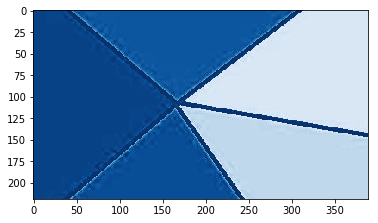

In [94]:
compressed_value_blue = open("compressed_value_blue.txt", "r")
new = compressed_value_blue.read().split("^")
value = []
quantity = []
for i in new:
    newdata = i.split("~")
    value.append(newdata[0].split("\n"))
    quantity.append(newdata[1].split("\n"))
for i in value:
    for j in i:
        j = int(j)
for i in quantity:
    for j in i:
        j = int(j)    
        
# print("\nvalue",value)
# print("\nquanti",quantity)
compressed_value_blue.close()

img_size_f = open("img_size.txt", "r")
data_size = img_size_f.read().split(" ")
row = int(data_size[0])
column = int(data_size[1])
img_size_f.close()

img_decode_blue = np.zeros([row,column], dtype = int)
# print(img_decode_blue)

dem = 0
for row in range(img_decode_blue.shape[0]):
#     print(value[0])
#     print(quantity[0])
    temp_line = np.zeros([1,img_decode_blue.shape[1]], dtype = int)
    print("len temp line", len(temp_line))
    print("ROW ", dem)
    i = 0
    num = 0
    while i < (temp_line.shape[1]):
        temp_value = value[row][num]
        print("tempvalue",temp_value)
        temp_line[0][i] = temp_value
        repeat = int(quantity[row][num])
        print("repeat",repeat)
        for j in range(i, i + repeat):
            temp_line[0][j] = temp_value
#             print(temp_value)
        i = i + repeat
        num = num + 1
#         print("i",i)

    dem = dem + 1
#     print(temp_line)
    img_decode_blue[row][:] = temp_line
plt.imshow(img_decode_blue, cmap= "Blues_r")

img_decode_RGB[:,:,2] = img_decode_blue

## 4.6 Combination 3 filters into RGB image:

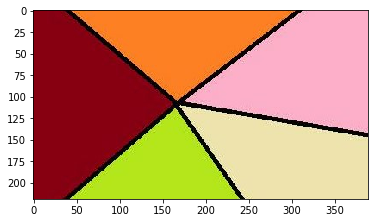

True

In [100]:
plt.imshow(img_decode_RGB)
plt.show()


img_size_f = open("img_size.txt", "r")
data_size = img_size_f.read().split(" ")
row = int(data_size[0])
column = int(data_size[1])
img_size_f.close()

img_decode_BGR = np.zeros([row,column,3], dtype = int)
img_decode_BGR[:,:,0] = img_decode_blue
img_decode_BGR[:,:,1] = img_decode_green
img_decode_BGR[:,:,2] = img_decode_red
# cv2.imwrite("Result\decode_img.bmp",img_decode_BGR)

### Draft: Run Length Encode for text (tutorials):

In [ ]:
# def runLengthEncoding(input): 
#     # Generate ordered dictionary of all lower 
#     # case alphabets, its output will be  
#     # dict = {'w':0, 'a':0, 'd':0, 'e':0, 'x':0} 
#     dict=OrderedDict.fromkeys(input, 0) 
  
#     # Now iterate through input string to calculate  
#     # frequency of each character, its output will be  
#     # dict = {'w':4,'a':3,'d':1,'e':1,'x':6} 
#     for pixel in input:
#         dict[pixel] += 1
  
#     # now iterate through dictionary to make  
#     # output string from (key,value) pairs 
#     output = '' 
#     for key,value in dict.items(): 
#          output = output + str(key) + " " + str(value) + "\n"
#     sum = 0
#     for i in dict.values():
#         sum=sum+i
#     print("SUM",sum)
#     return output 
# # Driver function 
# if __name__ == "__main__": 
#     input=img_GRAY[0][:]
#     print (runLengthEncoding(input))